# **Importing** **Libraries**

In [ ]:
#Importing all required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.dates import DateFormatter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.graphics import tsaplots
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn.preprocessing import OneHotEncoder
print('Libraries imported.')

Libraries imported.


# **Read** **data**

In [ ]:
#Read Traffic Data From Sharston
traffic22 = pd.read_csv('pvr_2016-03-04_1765d(1).csv')
#Rename date column to match the date column of the Pollutants Data from Piccadilly
traffic22 = traffic22.rename(columns = {"Sdate":"date"})
#Rename Cosit to match the same style as well
traffic22['Cosit'].replace('="MAC030001146"', 'MAC030001146', inplace=True)
#Remove Channel 1 as it recorded no Traffic volume
traffic22 = traffic22[traffic22.LaneDescription != 'Channel 2']
traffic22.head()

date         Cosit  LaneNumber LaneDescription  \
0  2016-03-04 00:00:00  MAC030001146           1       Channel 1   
1  2016-03-04 00:00:00  MAC030001146           2       Channel 2   
2  2016-03-04 01:00:00  MAC030001146           1       Channel 1   
3  2016-03-04 01:00:00  MAC030001146           2       Channel 2   
4  2016-03-04 02:00:00  MAC030001146           1       Channel 1   

   LaneDirection DirectionDescription  Volume  Flags Flag Text  AvgSpeed  \
0              2            SouthEast      61      0       NaN       NaN   
1              2            SouthEast       0      0       NaN       NaN   
2              2            SouthEast      65      0       NaN       NaN   
3              2            SouthEast       0      0       NaN       NaN   
4              2            SouthEast      52      0       NaN       NaN   

   PmlHGV  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [ ]:
#Read Pollutants Data for Piccadilly
PollutantsPicc = pd.read_csv('Piccadilly.csv')
PollutantsPicc.head()

date        O3        NO       NO2  NOXasNO2      SO2  \
0  2016-01-01 00:00:00  20.37676  10.05948  41.22075  56.64506  1.44664   
1  2016-01-01 01:00:00  17.88280   9.50068  47.93235  62.49986  1.71717   
2  2016-01-01 02:00:00  16.03096  10.17391  46.82087  62.42065  0.81357   
3  2016-01-01 03:00:00  12.34390  12.80322  48.36665  67.99798  1.49143   
4  2016-01-01 04:00:00   7.85458  24.80630  56.36711  94.40291  2.16863   

   PM2.5  NV2.5  V2.5     wd   ws  temp  AT2.5   AP2.5                   site  \
0   24.0   25.1  -1.1  206.2  2.4   1.2    3.8  1005.0  Manchester Piccadilly   
1   13.3   13.6  -0.3  201.0  2.2   0.4    3.3  1005.0  Manchester Piccadilly   
2    7.6    7.6   0.0  175.3  2.0  -0.3    3.2  1005.0  Manchester Piccadilly   
3    6.3    7.0  -0.7  149.3  2.3  -0.4    3.0  1006.0  Manchester Piccadilly   
4    4.5    5.2  -0.7  138.9  2.3  -0.6    3.1  1006.0  Manchester Piccadilly   

   code  latitude  longitude  AT25  AP25  PM10  RAWPM25        Ox       NOx  
0  MAN3  53.48152  -2.237881   NaN   NaN   NaN      NaN  61.59751  51.28023  
1  MAN3  53.48152  -2.237881   NaN   NaN   NaN      NaN  65.81515  57.43303  
2  MAN3  53.48152  -2.237881   NaN   NaN   NaN      NaN  62.85183  56.99478  
3  MAN3  53.48152  -2.237881   NaN   NaN   NaN      NaN  60.71055  61.16987  
4  MAN3  53.48152  -2.237881   NaN   NaN   NaN      NaN  64.22169  81.17341

In [ ]:
#Read Data from Sharston
PollutantsShar = pd.read_csv('Sharston.csv')
PollutantsShar.head()

date        O3       NO       NO2  NOXasNO2     wd   ws  temp  \
0  21/07/2016 0:00  23.54926  1.05605  23.83039  25.44964  219.3  2.5  12.2   
1  21/07/2016 1:00  21.88618  0.97123  16.47491  17.96411  220.0  2.4  12.3   
2  21/07/2016 2:00  18.31055  1.04555  17.09345  18.69660  225.5  2.9  12.1   
3  21/07/2016 3:00  19.35829  1.39386  17.29187  19.42909  223.2  2.7  11.5   
4  21/07/2016 4:00  12.32345  3.16814  18.67174  23.52949  209.1  2.3  11.2   

                  site  code   latitude  longitude        Ox       NOx  
0  Manchester Sharston  MAHG  53.371306  -2.239218  47.37965  24.88644  
1  Manchester Sharston  MAHG  53.371306  -2.239218  38.36109  17.44614  
2  Manchester Sharston  MAHG  53.371306  -2.239218  35.40400  18.13900  
3  Manchester Sharston  MAHG  53.371306  -2.239218  36.65016  18.68573  
4  Manchester Sharston  MAHG  53.371306  -2.239218  30.99519  21.83988

In [ ]:
#Read traffic data for Sharston 
traffic3 = pd.read_csv('pvr_2015-06-01_2615d.csv')
#Rename date column to match pollutants data
traffic3 = traffic3.rename(columns = {"Sdate":"date"})
#Remove Channel 1 as it recorded no Traffic volume values
traffic3 = traffic3[traffic3.LaneDescription != 'Channel 2']

# **Piccadilly----------------------------**

## **Feature Engineering**

In [ ]:
#merge traffic data and pollutants data on the date column
df = pd.merge(traffic22,PollutantsPicc1[['date','NO2','wd','ws','temp','longitude', 'latitude']],on='date', how='left')
#drop irrelevant variables
df = df.drop(['AvgSpeed', 'PmlHGV', 'Flag Text'], axis = 1)

In [ ]:
#check for null values
df.isnull().mean()

In [ ]:
#drop null values
df = df.dropna()

In [ ]:
#check correlation between variables
df[['NO2','Volume','ws','wd','temp']].corr()

NO2    Volume        ws        wd      temp
NO2     1.000000  0.363051 -0.279455 -0.181262 -0.369336
Volume  0.363051  1.000000  0.149586  0.138541  0.180201
ws     -0.279455  0.149586  1.000000  0.161460  0.210399
wd     -0.181262  0.138541  0.161460  1.000000  0.144181
temp   -0.369336  0.180201  0.210399  0.144181  1.000000

In [ ]:
#summary statistics for some variables
df[['NO2','Volume','ws','wd','temp']].describe()

NO2        Volume            ws            wd          temp
count  37393.000000  42348.000000  37393.000000  37393.000000  37393.000000
mean      34.560784    175.927269      3.302621    194.494494      9.327922
std       18.118721     85.610768      1.799989     82.882990      5.669983
min        2.007220      6.000000      0.000000      0.100000     -6.900000
25%       20.310270    101.000000      1.900000    133.200000      5.300000
50%       32.000640    175.000000      2.900000    203.000000      9.100000
75%       46.125320    241.000000      4.400000    255.400000     13.300000
max      215.982820    551.000000     13.800000    360.000000     29.900000

In [ ]:
#extract seasonality data drom data column
df['date'] =  pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Hour'] = df['date'].dt.hour
df['DayofWeek'] = df['date'].dt.dayofweek
df['dayofyear'] = df['date'].dt.dayofyear
df['weekofyear'] = df['date'].dt.weekofyear
df['quarter'] = df['date'].dt.quarter
df['Day'] = df['date'].dt.day

In [ ]:
#create new variables using rolling means function
df['NO2_moving_avg'] = df['NO2'].rolling(window=25).mean()
df['NO2_moving_avg2'] = df['NO2'].rolling(window=100).mean()
df['NO2_moving_avg3'] = df['NO2'].rolling(window=50).mean()
df['NO2_moving_avg4'] = df['NO2'].rolling(window=3).mean()
df['NO2_moving_avg5'] = df['NO2'].rolling(window=30).mean()

In [ ]:
#drop any new missing values
df = df.dropna()

In [ ]:
#Transform wind direction from degrees to textual direction
df['wd'] = df['wd'].mask(df['wd'] == 0, 0)
df['wd'] = df['wd'].mask((df['wd'] > 0) & (df['wd'] < 90), 0.5)
df['wd'] = df['wd'].mask(df['wd'] == 90, 1)
df['wd'] = df['wd'].mask((df['wd'] > 90) & (df['wd'] < 180), 1.5)
df['wd'] = df['wd'].mask(df['wd'] == 180, 2)
df['wd'] = df['wd'].mask((df['wd'] > 180) & (df['wd'] < 270), 2.5)
df['wd'] = df['wd'].mask(df['wd'] == 270, 3)
df['wd'] = df['wd'].mask((df['wd'] > 270) & (df['wd'] < 360), 3.5)
df['wd'] = df['wd'].mask(df['wd'] == 360, 'North')

df['wd'] = df['wd'].mask(df['wd'] == 0, 'North')
df['wd'] = df['wd'].mask(df['wd'] == 0.5, 'North East')
df['wd'] = df['wd'].mask(df['wd'] == 1, 'East')
df['wd'] = df['wd'].mask(df['wd'] == 1.5, 'South East')
df['wd'] = df['wd'].mask(df['wd'] == 2, 'South')
df['wd'] = df['wd'].mask(df['wd'] == 2.5, 'South West')
df['wd'] = df['wd'].mask(df['wd'] == 3, 'West')
df['wd'] = df['wd'].mask(df['wd'] == 3.5, 'North West')

In [ ]:
#One hot encode Wind direction
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'wd' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['wd']]).toarray())

#merge one-hot encoded columns back with original DataFrame
df = df.join(encoder_df)

In [ ]:

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'Day of week' column 
df[['ohe1','ohe2','ohe3','oh4','o5','o6','o7']] = encoder.fit_transform(df[['DayofWeek']]).toarray()

In [ ]:
#create new dataframes with conditions for EDA
df20 = df.loc[(df['Year'] == 2020)]
df21 = df.loc[(df['Year'] == 2021)]
df19 = df.loc[(df['Year'] == 2019)]
df18 = df.loc[(df['Year'] == 2018)]
df17 = df.loc[(df['Year'] == 2017)]
df16 = df.loc[(df['Year'] == 2016)]
df20mn6 = df.loc[(df['Year'] == 2020) & (df['Month'] == 6)]
df20mn6dy4 = df.loc[(df['Year'] == 2020) & (df['Month'] == 6) & (df['Day'] == 4)]
df20mn6dy4.shape
df20mn6w23 = df.loc[(df['Year'] == 2020) & (df['Month'] == 6) & 
                                                 (df['weekofyear'] == 23 )]


In [ ]:
#set date as the index
df20.set_index('date')
df21.set_index('date')
df19.set_index('date')
df18.set_index('date')
df17.set_index('date')
df16.set_index('date')
df20mn6.set_index('date')
df20mn6dy4.set_index('date')
df20mn6w23.set_index('date')

Cosit  LaneNumber LaneDescription  LaneDirection  \
date                                                                           
2020-06-01 00:00:00  MAC030001146           1       Channel 1              2   
2020-06-01 01:00:00  MAC030001146           1       Channel 1              2   
2020-06-01 02:00:00  MAC030001146           1       Channel 1              2   
2020-06-01 03:00:00  MAC030001146           1       Channel 1              2   
2020-06-01 04:00:00  MAC030001146           1       Channel 1              2   
...                           ...         ...             ...            ...   
2020-06-07 19:00:00  MAC030001146           1       Channel 1              2   
2020-06-07 20:00:00  MAC030001146           1       Channel 1              2   
2020-06-07 21:00:00  MAC030001146           1       Channel 1              2   
2020-06-07 22:00:00  MAC030001146           1       Channel 1              2   
2020-06-07 23:00:00  MAC030001146           1       Channel 1              2   

                    DirectionDescription  Volume  Flags       NO2          wd  \
date                                                                            
2020-06-01 00:00:00            SouthEast      42      0   5.57546  North East   
2020-06-01 01:00:00            SouthEast      27      0   9.74041  North East   
2020-06-01 02:00:00            SouthEast      14      0   8.06099  North East   
2020-06-01 03:00:00            SouthEast      25      0  12.74644  North East   
2020-06-01 04:00:00            SouthEast      23      0  20.75671  North East   
...                                  ...     ...    ...       ...         ...   
2020-06-07 19:00:00            SouthEast     102      0  10.87845  North East   
2020-06-07 20:00:00            SouthEast     129      0  12.09840  North East   
2020-06-07 21:00:00            SouthEast     104      0  14.28419  North East   
2020-06-07 22:00:00            SouthEast      69      0  14.58924  North East   
2020-06-07 23:00:00            SouthEast      53      0   6.10002  North East   

                      ws  temp  longitude  latitude  Year  Month  Hour  \
date                                                                     
2020-06-01 00:00:00  2.2  10.7  -2.237881  53.48152  2020      6     0   
2020-06-01 01:00:00  1.9   9.4  -2.237881  53.48152  2020      6     1   
2020-06-01 02:00:00  1.9   8.6  -2.237881  53.48152  2020      6     2   
2020-06-01 03:00:00  1.6   7.9  -2.237881  53.48152  2020      6     3   
2020-06-01 04:00:00  1.7   8.5  -2.237881  53.48152  2020      6     4   
...                  ...   ...        ...       ...   ...    ...   ...   
2020-06-07 19:00:00  2.5  11.8  -2.237881  53.48152  2020      6    19   
2020-06-07 20:00:00  1.6  10.0  -2.237881  53.48152  2020      6    20   
2020-06-07 21:00:00  1.8   8.8  -2.237881  53.48152  2020      6    21   
2020-06-07 22:00:00  1.6   7.8  -2.237881  53.48152  2020      6    22   
2020-06-07 23:00:00  0.8   6.9  -2.237881  53.48152  2020      6    23   

                     DayofWeek  dayofyear  weekofyear  quarter  Day  
date                                                                 
2020-06-01 00:00:00          0        153          23        2    1  
2020-06-01 01:00:00          0        153          23        2    1  
2020-06-01 02:00:00          0        153          23        2    1  
2020-06-01 03:00:00          0        153          23        2    1  
2020-06-01 04:00:00          0        153          23        2    1  
...                        ...        ...         ...      ...  ...  
2020-06-07 19:00:00          6        159          23        2    7  
2020-06-07 20:00:00          6        159          23        2    7  
2020-06-07 21:00:00          6        159          23        2    7  
2020-06-07 22:00:00          6        159          23        2    7  
2020-06-07 23:00:00          6        159          23        2    7  

[168 rows x 21 columns]

Pollutants

In [ ]:
#drop irrelevant variables
PollutantsPicc = PollutantsPicc.drop(['NOXasNO2', 'SO2', 'NV2.5',
                                      'V2.5','AT2.5','AP2.5','AT25','AP25',
                                      'PM10','RAWPM25'], axis = 1)

In [ ]:
#check for missing values
PollutantsPicc.isnull().mean()

date         0.0
O3           0.0
NO           0.0
NO2          0.0
PM2.5        0.0
wd           0.0
ws           0.0
temp         0.0
site         0.0
code         0.0
latitude     0.0
longitude    0.0
Ox           0.0
NOx          0.0
dtype: float64

In [ ]:
#correlation for data
PollutantsPicc[['NO2', 'ws','wd','temp']].corr()

In [ ]:
#Summary statistics for data
PollutantsPicc[['NO2', 'ws','wd','temp']].describe()

NO2            ws            wd          temp
count  44594.000000  44594.000000  44594.000000  44594.000000
mean      33.774706      3.280574    193.458844      9.227268
std       18.167534      1.808969     83.952338      5.792372
min        2.007220      0.000000      0.000000     -6.900000
25%       19.447685      1.900000    129.800000      5.100000
50%       30.824215      2.900000    202.200000      9.000000
75%       45.321750      4.300000    255.700000     13.300000
max      215.982820     13.800000    360.000000     29.900000

In [ ]:
#Transform wind direction from degrees to textual direction
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 0, 0)
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask((PollutantsPicc['wd'] > 0) & (PollutantsPicc['wd'] < 90), 0.5)
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 90, 1)
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask((PollutantsPicc['wd'] > 90) & (PollutantsPicc['wd'] < 180), 1.5)
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 180, 2)
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask((PollutantsPicc['wd'] > 180) & (PollutantsPicc['wd'] < 270), 2.5)
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 270, 3)
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask((PollutantsPicc['wd'] > 270) & (PollutantsPicc['wd'] < 360), 3.5)
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 360, 'North')

PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 0, 'North')
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 0.5, 'North East')
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 1, 'East')
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 1.5, 'South East')
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 2, 'South')
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 2.5, 'South West')
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 3, 'West')
PollutantsPicc['wd'] = PollutantsPicc['wd'].mask(PollutantsPicc['wd'] == 3.5, 'North West')

In [ ]:

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'wd' column 
encoder_df = pd.DataFrame(encoder.fit_transform(PollutantsPicc[['wd']]).toarray())

#merge one-hot encoded columns back with original DataFrame
PollutantsPicc = PollutantsPicc.join(encoder_df)



In [ ]:
#extract new features from date column
PollutantsPicc['date'] =  pd.to_datetime(PollutantsPicc['date'])
PollutantsPicc['Year'] = PollutantsPicc['date'].dt.year
PollutantsPicc['Month'] = PollutantsPicc['date'].dt.month
PollutantsPicc['Hour'] = PollutantsPicc['date'].dt.hour
PollutantsPicc['DayofWeek'] = PollutantsPicc['date'].dt.dayofweek
PollutantsPicc['dayofyear'] = PollutantsPicc['date'].dt.dayofyear
PollutantsPicc['weekofyear'] = PollutantsPicc['date'].dt.weekofyear
PollutantsPicc['quarter'] = PollutantsPicc['date'].dt.quarter
PollutantsPicc['Day'] = PollutantsPicc['date'].dt.day
#create new variables using rolling means
PollutantsPicc['NO2_moving_avg'] = PollutantsPicc['NO2'].rolling(window=3).mean()#3hours
PollutantsPicc['NO2_moving_avg2'] = PollutantsPicc['NO2'].rolling(window=25).mean()#24hours
PollutantsPicc['NO2_moving_avg3'] = PollutantsPicc['NO2'].rolling(window=50).mean()#~2days
PollutantsPicc['NO2_moving_avg4'] = PollutantsPicc['NO2'].rolling(window=100).mean()#~4days
PollutantsPicc['NO2_moving_avg5'] = PollutantsPicc['NO2'].rolling(window=200).mean()#~8days

In [ ]:

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'dayofweek' column 
PollutantsPicc[['ohe1','ohe2','ohe3','oh4','o5','o6','o7']] = encoder.fit_transform(PollutantsPicc[['DayofWeek']]).toarray()

#merge one-hot encoded columns back with original DataFrame
#PollutantsPicc = PollutantsPicc.join(encoder_df)

In [ ]:
#drop missing values
PollutantsPicc = PollutantsPicc.dropna()

In [ ]:
#create new data frame with conditions
PollutantsPicc20 = PollutantsPicc.loc[(PollutantsPicc['Year'] == 2020)]
PollutantsPicc21 = PollutantsPicc.loc[(PollutantsPicc['Year'] == 2021)]
PollutantsPicc19 = PollutantsPicc.loc[(PollutantsPicc['Year'] == 2019)]
PollutantsPicc18 = PollutantsPicc.loc[(PollutantsPicc['Year'] == 2018)]
PollutantsPicc17 = PollutantsPicc.loc[(PollutantsPicc['Year'] == 2017)]
PollutantsPicc16 = PollutantsPicc.loc[(PollutantsPicc['Year'] == 2016)]
PollutantsPicc20mn6 = PollutantsPicc.loc[(PollutantsPicc['Year'] == 2020) & (PollutantsPicc['Month'] == 6)]
PollutantsPicc20mn6dy4 = PollutantsPicc.loc[(PollutantsPicc['Year'] == 2020) & (PollutantsPicc['Month'] == 6) & (PollutantsPicc['Day'] == 4)]
PollutantsPicc20mn6w23 = PollutantsPicc.loc[(PollutantsPicc['Year'] == 2020) & (PollutantsPicc['Month'] == 6) & 
                                                 (PollutantsPicc['weekofyear'] == 23 )]

In [ ]:
#set date as index
PollutantsPicc20.set_index('date')
PollutantsPicc21.set_index('date')
PollutantsPicc19.set_index('date')
PollutantsPicc18.set_index('date')
PollutantsPicc17.set_index('date')
PollutantsPicc16.set_index('date')
PollutantsPicc20mn6.set_index('date')
PollutantsPicc20mn6dy4.set_index('date')
PollutantsPicc20mn6w23.set_index('date')
PollutantsPicc.set_index('date')

In [ ]:
PollutantsPicc['NO2'].plot(figsize=(10,6))
PollutantsPicc['NO2'].rolling(window=100).mean().plot()

In [ ]:
PollutantsPicc['NO2'].plot(figsize=(10,6))
PollutantsPicc['NO2'].rolling(window=50).mean().plot()

## Regression

## **Prepare Data**

### 1

In [ ]:
PollutantsPicc.head(1)

date        O3       NO       NO2  PM2.5     wd   ws  temp  \
199 2016-01-10 15:00:00  45.54786  3.04248  24.90123    1.0  186.3  3.1   4.5   

                      site  code  latitude  longitude        Ox       NOx  \
199  Manchester Piccadilly  MAN3  53.48152  -2.237881  70.44909  27.94371   

     Year  Month  Hour  DayofWeek  dayofyear  weekofyear  quarter  \
199  2016      1    15          6         10           1        1   

     NO2_moving_avg  NO2_moving_avg2  NO2_moving_avg3  NO2_moving_avg4  \
199       23.701933        28.099846         38.39419        42.189851   

     NO2_moving_avg5  Day  
199        44.272328   10

In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7]].values
y = PollutantsPicc.iloc[:,3].values

#reg

[0.26504879 0.29077851 0.29721401 0.29018656 0.27082163 0.30499675
 0.27213797 0.28771596 0.29564679 0.28874132]
0.28632883022765565

Variable:                    2 Importance: 0.44
Variable:                    0 Importance: 0.32
Variable:                    1 Importance: 0.24

#xbg 

[0.16786199 0.21395334 0.20802936 0.21425327 0.20975117 0.21351934
 0.19050052 0.20242041 0.20687806 0.21969228]
0.20468597491523272

Variable:                    0 Importance: 0.44999998807907104
Variable:                    2 Importance: 0.3799999952316284
Variable:                    1 Importance: 0.17000000178813934



In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7]].values
y = PollutantsPicc.iloc[:,3].values

In [ ]:
#onehot
X = PollutantsPicc.iloc[:, [6,7,14,15,16,17,18,19,20,21]].values
y = PollutantsPicc.iloc[:,3].values

### 2

In [ ]:
PollutantsPicc.head(1)

ohe

In [ ]:
#onehotencoded
X = PollutantsPicc.iloc[:, [6,7,16,17,19,20,22,23,24,26,27,28,34,35,36,37,38,39,40,41]].values
y = PollutantsPicc.iloc[:,3].values

#reg

Variable:                   12 Importance: 0.17  
Variable:                    1 Importance: 0.13
Variable:                    0 Importance: 0.12
Variable:                   13 Importance: 0.11
Variable:                   10 Importance: 0.09
Variable:                   14 Importance: 0.08
Variable:                   11 Importance: 0.05
Variable:                   16 Importance: 0.05
Variable:                    7 Importance: 0.04
Variable:                   23 Importance: 0.04
Variable:                    5 Importance: 0.03
Variable:                   15 Importance: 0.02
Variable:                    4 Importance: 0.01
Variable:                    8 Importance: 0.01
Variable:                   17 Importance: 0.01
Variable:                   18 Importance: 0.01
Variable:                   19 Importance: 0.01
Variable:                   20 Importance: 0.01
Variable:                   21 Importance: 0.01
Variable:                   22 Importance: 0.01
Variable:                    2 Importance: 0.0
Variable:                    3 Importance: 0.0
Variable:                    6 Importance: 0.0
Variable:                    9 Importance: 0.0

Variable:                    8 Importance: 0.17
Variable:                    1 Importance: 0.13
Variable:                    0 Importance: 0.12
Variable:                    9 Importance: 0.11
Variable:                    6 Importance: 0.09
Variable:                   10 Importance: 0.08
Variable:                   19 Importance: 0.05
Variable:                    4 Importance: 0.04
Variable:                    7 Importance: 0.04
Variable:                   18 Importance: 0.04
Variable:                    3 Importance: 0.03
Variable:                   11 Importance: 0.02
Variable:                    2 Importance: 0.01
Variable:                    5 Importance: 0.01
Variable:                   12 Importance: 0.01
Variable:                   13 Importance: 0.01
Variable:                   14 Importance: 0.01
Variable:                   15 Importance: 0.01
Variable:                   16 Importance: 0.01
Variable:                   17 Importance: 0.01

#xgb
Variable:                   23 Importance: 0.1599999964237213
Variable:                    5 Importance: 0.14000000059604645
Variable:                    7 Importance: 0.10000000149011612
Variable:                   15 Importance: 0.09000000357627869
Variable:                   14 Importance: 0.05999999865889549
Variable:                   10 Importance: 0.05000000074505806
Variable:                   13 Importance: 0.05000000074505806
Variable:                   12 Importance: 0.03999999910593033
Variable:                   22 Importance: 0.03999999910593033
Variable:                    1 Importance: 0.029999999329447746
Variable:                    4 Importance: 0.029999999329447746
Variable:                    0 Importance: 0.019999999552965164
Variable:                    8 Importance: 0.019999999552965164
Variable:                   11 Importance: 0.019999999552965164
Variable:                   16 Importance: 0.019999999552965164
Variable:                   17 Importance: 0.019999999552965164
Variable:                   18 Importance: 0.019999999552965164
Variable:                   19 Importance: 0.019999999552965164
Variable:                   20 Importance: 0.019999999552965164
Variable:                   21 Importance: 0.019999999552965164
Variable:                    6 Importance: 0.009999999776482582
Variable:                    2 Importance: 0.0
Variable:                    3 Importance: 0.0
Variable:                    9 Importance: 0.0

Variable:                   18 Importance: 0.17000000178813934
Variable:                    3 Importance: 0.15000000596046448
Variable:                    4 Importance: 0.11999999731779099
Variable:                    6 Importance: 0.05999999865889549
Variable:                    9 Importance: 0.05999999865889549
Variable:                   10 Importance: 0.05000000074505806
Variable:                   17 Importance: 0.05000000074505806
Variable:                    1 Importance: 0.03999999910593033
Variable:                    8 Importance: 0.03999999910593033
Variable:                   11 Importance: 0.03999999910593033
Variable:                    0 Importance: 0.029999999329447746
Variable:                    2 Importance: 0.029999999329447746
Variable:                    5 Importance: 0.019999999552965164
Variable:                    7 Importance: 0.019999999552965164
Variable:                   12 Importance: 0.019999999552965164
Variable:                   13 Importance: 0.019999999552965164
Variable:                   14 Importance: 0.019999999552965164
Variable:                   15 Importance: 0.019999999552965164
Variable:                   16 Importance: 0.019999999552965164
Variable:                   19 Importance: 0.019999999552965164

In [ ]:
PollutantsPicc.head(1)

normal

In [ ]:
PollutantsPicc

date        O3       NO       NO2  PM2.5     wd   ws  \
199   2016-01-10 15:00:00  45.54786  3.04248  24.90123  1.000  186.3  3.1   
200   2016-01-10 16:00:00  39.68150  3.23768  30.75874  1.700  193.2  3.9   
201   2016-01-10 17:00:00  27.36105  4.87601  40.43933  2.600  202.6  3.7   
202   2016-01-10 18:00:00  29.22753  4.09582  40.23278  2.200  205.8  3.5   
203   2016-01-10 19:00:00  38.29449  2.61372  32.02051  2.800  199.9  3.4   
...                   ...       ...      ...       ...    ...    ...  ...   
44589 2021-10-05 19:00:00  35.72303  1.12257  16.83000  3.113  315.6  5.2   
44590 2021-10-05 20:00:00  41.31099  1.62149  14.91750  3.774  314.5  5.0   
44591 2021-10-05 21:00:00  46.30024  1.12257  10.51875  3.679  316.6  5.0   
44592 2021-10-05 22:00:00  48.29594  1.37203   8.60625  4.057  318.2  4.9   
44593 2021-10-05 23:00:00  48.29594  1.12257   7.26750  3.491  318.1  4.7   

       temp                   site  code  latitude  longitude        Ox  \
199     4.5  Manchester Piccadilly  MAN3  53.48152  -2.237881  70.44909   
200     4.1  Manchester Piccadilly  MAN3  53.48152  -2.237881  70.44024   
201     3.8  Manchester Piccadilly  MAN3  53.48152  -2.237881  67.80038   
202     3.3  Manchester Piccadilly  MAN3  53.48152  -2.237881  69.46031   
203     3.0  Manchester Piccadilly  MAN3  53.48152  -2.237881  70.31500   
...     ...                    ...   ...       ...        ...       ...   
44589   9.9  Manchester Piccadilly  MAN3  53.48152  -2.237881  52.55303   
44590   9.5  Manchester Piccadilly  MAN3  53.48152  -2.237881  56.22849   
44591   9.2  Manchester Piccadilly  MAN3  53.48152  -2.237881  56.81899   
44592   9.1  Manchester Piccadilly  MAN3  53.48152  -2.237881  56.90219   
44593   8.9  Manchester Piccadilly  MAN3  53.48152  -2.237881  55.56344   

            NOx  Year  Month  Hour  DayofWeek  dayofyear  weekofyear  quarter  \
199    27.94371  2016      1    15          6         10           1        1   
200    33.99642  2016      1    16          6         10           1        1   
201    45.31534  2016      1    17          6         10           1        1   
202    44.32860  2016      1    18          6         10           1        1   
203    34.63423  2016      1    19          6         10           1        1   
...         ...   ...    ...   ...        ...        ...         ...      ...   
44589  17.95257  2021     10    19          1        278          40        4   
44590  16.53899  2021     10    20          1        278          40        4   
44591  11.64132  2021     10    21          1        278          40        4   
44592   9.97828  2021     10    22          1        278          40        4   
44593   8.39007  2021     10    23          1        278          40        4   

       NO2_moving_avg  NO2_moving_avg2  NO2_moving_avg3  NO2_moving_avg4  \
199         23.701933        28.099846        38.394190        42.189851   
200         26.900590        27.178824        38.189610        41.729526   
201         32.033100        25.663302        38.009491        41.344430   
202         37.143617        24.458465        37.642071        40.822743   
203         37.564207        22.979108        37.060613        40.195151   
...               ...              ...              ...              ...   
44589       18.105000        24.961950        27.222525        27.103950   
44590       17.021250        23.745600        26.882100        26.975812   
44591       14.088750        22.865850        26.556975        26.719538   
44592       11.347500        21.381750        26.178300        26.409713   
44593        8.797500        20.272500        25.788150        26.086500   

       NO2_moving_avg5  Day  
199          44.272328   10  
200          44.220018   10  
201          44.182553   10  
202          44.149613   10  
203          44.067882   10  
...                ...  ...  
44589        24.898837    5  
44590        24.907444    5  
44591        24.882581    5  
44592    

In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7,14,15,16,17,18,19,20,26]].values
y = PollutantsPicc.iloc[:,3].values

#reg

[0.80082209 0.80939001 0.81505339 0.81638627 0.80738298 0.81045207
 0.80084873 0.80252619 0.81407394 0.80806196]
0.8084997625146073

Variable:                    5 Importance: 0.17
Variable:                    2 Importance: 0.15
Variable:                    0 Importance: 0.14
Variable:                    1 Importance: 0.13
Variable:                    7 Importance: 0.12
Variable:                    3 Importance: 0.09
Variable:                    6 Importance: 0.08
Variable:                    8 Importance: 0.08
Variable:                    4 Importance: 0.03
Variable:                    9 Importance: 0.02


#reg 
#xbg 

[0.81882533 0.82543635 0.84156869 0.83955682 0.82886653 0.83393526
 0.82349095 0.82860755 0.84297646 0.83209505]
0.8315358991001629

In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsPicc.iloc[:,3].values


### 3

In [ ]:
df.head(1)

date         Cosit  LaneNumber LaneDescription  \
99 2016-03-08 03:00:00  MAC030001146           1       Channel 1   

    LaneDirection DirectionDescription  Volume  Flags       NO2     wd   ws  \
99              2            SouthEast      69      0  58.79838  128.8  2.3   

    temp  longitude  latitude  Year  Month  Hour  DayofWeek  dayofyear  \
99  -4.9  -2.237881  53.48152  2016      3     3          1         68   

    weekofyear  quarter  NO2_moving_avg  NO2_moving_avg2  NO2_moving_avg3  \
99          10        1       53.343348        49.364759        47.342771   

    NO2_moving_avg4  NO2_moving_avg5  Day  
99         68.63325         50.61605    8

In [ ]:
X = df.iloc[:, [6,9,10,11,14,15,16,17,18,19,20]].values
y = df.iloc[:,8].values

In [ ]:
X = df.iloc[:, [6,9,10,11,14,15,16,17,18,19,20,26]].values
y = df.iloc[:,8].values

#reg 

[0.80307207 0.78303559 0.78517979 0.77467093 0.79065241 0.79769491
 0.79005545 0.76806205 0.78289868 0.78957045]
0.7864892322634339

Variable:                    3 Importance: 0.15
Variable:                    0 Importance: 0.14
Variable:                    1 Importance: 0.14
Variable:                    2 Importance: 0.12
Variable:                    6 Importance: 0.11
Variable:                    8 Importance: 0.11
Variable:                    7 Importance: 0.07
Variable:                    9 Importance: 0.07
Variable:                    4 Importance: 0.05
Variable:                    5 Importance: 0.03
Variable:                   10 Importance: 0.02

#xbg

[0.83246449 0.8213984  0.81599956 0.79644791 0.81477873 0.82959737
 0.8187437  0.80275128 0.80745851 0.82718879]
0.8166828742870486

Variable:                    9 Importance: 0.17000000178813934
Variable:                    8 Importance: 0.11999999731779099
Variable:                    3 Importance: 0.10999999940395355
Variable:                    7 Importance: 0.10000000149011612
Variable:                    4 Importance: 0.09000000357627869
Variable:                    6 Importance: 0.09000000357627869
Variable:                    1 Importance: 0.07999999821186066
Variable:                    0 Importance: 0.07000000029802322
Variable:                    2 Importance: 0.07000000029802322
Variable:                   10 Importance: 0.05999999865889549
Variable:                    5 Importance: 0.03999999910593033

In [ ]:
df = df.dropna()
df.shape

In [ ]:
#ohe
X = df.iloc[:, [6,10,11,14,15,16,17,18,19,20,26,
                29,30,32,33,35,37,38,39,40,41]].values
y = df.iloc[:,8].values

Variable:                    2 Importance: 0.14
Variable:                    0 Importance: 0.13
Variable:                    1 Importance: 0.13
Variable:                    5 Importance: 0.11
Variable:                    7 Importance: 0.11
Variable:                    8 Importance: 0.08
Variable:                    3 Importance: 0.05
Variable:                   10 Importance: 0.05
Variable:                    4 Importance: 0.04
Variable:                    6 Importance: 0.04
Variable:                    9 Importance: 0.02
Variable:                   25 Importance: 0.02
Variable:                   13 Importance: 0.01
Variable:                   14 Importance: 0.01
Variable:                   16 Importance: 0.01
Variable:                   17 Importance: 0.01
Variable:                   19 Importance: 0.01
Variable:                   21 Importance: 0.01
Variable:                   22 Importance: 0.01
Variable:                   23 Importance: 0.01
Variable:                   24 Importance: 0.01
Variable:                   11 Importance: 0.0
Variable:                   12 Importance: 0.0
Variable:                   15 Importance: 0.0
Variable:                   18 Importance: 0.0
Variable:                   20 Importance: 0.0

0.9387706991150726
Mean Absolute Error: 6.2505431364855735
Mean Squared Error: 71.1193669450741
Root Mean Squared Error: 8.43322992364575
R2: 0.7896

#ohe
X = df.iloc[:, [6,10,11,14,15,16,17,18,19,20,26,27,
                28,29,30,31,32,33,34,35,36,37,38,39,40,41]].values
y = df.iloc[:,8].values

Variable:                   25 Importance: 0.15000000596046448
Variable:                    8 Importance: 0.10999999940395355
Variable:                    6 Importance: 0.07999999821186066
Variable:                    7 Importance: 0.07000000029802322
Variable:                    2 Importance: 0.05000000074505806
Variable:                    3 Importance: 0.05000000074505806
Variable:                    9 Importance: 0.05000000074505806
Variable:                    5 Importance: 0.03999999910593033
Variable:                   10 Importance: 0.03999999910593033
Variable:                    0 Importance: 0.029999999329447746
Variable:                    1 Importance: 0.029999999329447746
Variable:                    4 Importance: 0.029999999329447746
Variable:                   19 Importance: 0.029999999329447746
Variable:                   21 Importance: 0.029999999329447746
Variable:                   22 Importance: 0.029999999329447746
Variable:                   23 Importance: 0.029999999329447746
Variable:                   13 Importance: 0.019999999552965164
Variable:                   14 Importance: 0.019999999552965164
Variable:                   16 Importance: 0.019999999552965164
Variable:                   17 Importance: 0.019999999552965164
Variable:                   20 Importance: 0.019999999552965164
Variable:                   24 Importance: 0.019999999552965164
Variable:                   15 Importance: 0.009999999776482582
Variable:                   18 Importance: 0.009999999776482582
Variable:                   11 Importance: 0.0
Variable:                   12 Importance: 0.0

0.9999848322732924
Mean Absolute Error: 5.63653364706713
Mean Squared Error: 58.71702448005869
Root Mean Squared Error: 7.662703470711802
R2: 0.8263

In [ ]:
#ohe
X = df.iloc[:, [6,10,11,14,15,16,17,18,19,20,26,27,
                28,29,30,31,32,33,34,35,36,37,38,39,40,41]].values
y = df.iloc[:,8].values


### 4

In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsPicc.iloc[:,21].values

#reg 

[0.84384758 0.85366193 0.85305864 0.85079033 0.85132652 0.85539173
 0.84354658 0.84413139 0.8483945  0.84527951]
0.8489428707920732

Variable:                    5 Importance: 0.16
Variable:                    0 Importance: 0.13
Variable:                    2 Importance: 0.13
Variable:                    7 Importance: 0.13
Variable:                    1 Importance: 0.12
Variable:                    3 Importance: 0.1
Variable:                    6 Importance: 0.08
Variable:                    8 Importance: 0.08
Variable:                    4 Importance: 0.04
Variable:                    9 Importance: 0.02

#xbg 

Variable:                    8 Importance: 0.20000000298023224
Variable:                    9 Importance: 0.12999999523162842
Variable:                    3 Importance: 0.11999999731779099
Variable:                    7 Importance: 0.11999999731779099
Variable:                    5 Importance: 0.10000000149011612
Variable:                    6 Importance: 0.10000000149011612
Variable:                    2 Importance: 0.07000000029802322
Variable:                    0 Importance: 0.05999999865889549
Variable:                    1 Importance: 0.05999999865889549
Variable:                    4 Importance: 0.03999999910593033

In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsPicc.iloc[:,21].values

In [ ]:
PollutantsPicc.head(1)

In [ ]:
#ohe
X = PollutantsPicc.iloc[:, [6,7,16,17,19,20,21,22,23,24,25,26,27,28,34,35,36,37,38,39,40,41]].values
y = PollutantsPicc.iloc[:,29].values

### 5

In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsPicc.iloc[:,22].values

In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsPicc.iloc[:,22].values
# MA(25) = 

#reg 

[0.95003548 0.95561211 0.95474801 0.95020087 0.95732123 0.95277879
 0.95424431 0.9546811  0.95221185 0.95122229]
0.9533056049526583

Variable:                    7 Importance: 0.22
Variable:                    3 Importance: 0.17
Variable:                    8 Importance: 0.13
Variable:                    2 Importance: 0.12
Variable:                    0 Importance: 0.08
Variable:                    6 Importance: 0.08
Variable:                    1 Importance: 0.07
Variable:                    4 Importance: 0.07
Variable:                    9 Importance: 0.04
Variable:                    5 Importance: 0.02


#xbg 

Variable:                    8 Importance: 0.3199999928474426
Variable:                    3 Importance: 0.18000000715255737
Variable:                    7 Importance: 0.17000000178813934
Variable:                    9 Importance: 0.09000000357627869
Variable:                    6 Importance: 0.07999999821186066
Variable:                    2 Importance: 0.05000000074505806
Variable:                    4 Importance: 0.03999999910593033
Variable:                    0 Importance: 0.029999999329447746
Variable:                    1 Importance: 0.029999999329447746
Variable:                    5 Importance: 0.009999999776482582

In [ ]:
PollutantsPicc.head(1)

In [ ]:
#ohe
X = PollutantsPicc.iloc[:, [6,7,16,17,19,20,22,23,24,26,27,28,34,35,36,37,38,39,40,41]].values
y = PollutantsPicc.iloc[:,30].values

### 6

In [ ]:
#onehotencoded
X = PollutantsPicc.iloc[:, [6,7,16,17,19,20,22,23,24,26,27,28,34,35,36,37,38,39,40,41]].values
y = PollutantsPicc.iloc[:,31].values


#xgb
Variable:                    6 Importance: 0.15000000596046448
Variable:                    9 Importance: 0.14000000059604645
Variable:                   10 Importance: 0.14000000059604645
Variable:                   12 Importance: 0.07000000029802322
Variable:                    4 Importance: 0.05000000074505806
Variable:                   11 Importance: 0.05000000074505806
Variable:                   19 Importance: 0.05000000074505806
Variable:                    1 Importance: 0.03999999910593033
Variable:                    3 Importance: 0.03999999910593033
Variable:                    7 Importance: 0.03999999910593033
Variable:                   13 Importance: 0.03999999910593033
Variable:                   18 Importance: 0.03999999910593033
Variable:                   14 Importance: 0.029999999329447746
Variable:                   15 Importance: 0.029999999329447746
Variable:                   16 Importance: 0.029999999329447746
Variable:                   17 Importance: 0.019999999552965164
Variable:                    0 Importance: 0.009999999776482582
Variable:                    2 Importance: 0.009999999776482582
Variable:                    5 Importance: 0.009999999776482582
Variable:                    8 Importance: 0.0

In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsPicc.iloc[:,23].values

In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsPicc.iloc[:,23].values
#MA(50) 


[0.97666904 0.97877936 0.97866258 0.97698168 0.97871444 0.97866934
 0.97896496 0.97822896 0.97788432 0.97788344]
0.9781438112465954

Variable:                    7 Importance: 0.24
Variable:                    3 Importance: 0.19
Variable:                    8 Importance: 0.14
Variable:                    2 Importance: 0.11
Variable:                    4 Importance: 0.09
Variable:                    6 Importance: 0.07
Variable:                    0 Importance: 0.06
Variable:                    1 Importance: 0.04
Variable:                    9 Importance: 0.04
Variable:                    5 Importance: 0.01

#xgb

Variable:                    8 Importance: 0.36000001430511475
Variable:                    3 Importance: 0.20000000298023224
Variable:                    7 Importance: 0.18000000715255737
Variable:                    6 Importance: 0.07000000029802322
Variable:                    2 Importance: 0.05000000074505806
Variable:                    4 Importance: 0.05000000074505806
Variable:                    9 Importance: 0.05000000074505806
Variable:                    0 Importance: 0.019999999552965164
Variable:                    1 Importance: 0.009999999776482582
Variable:                    5 Importance: 0.009999999776482582

### 7

In [ ]:
X = PollutantsPicc.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsPicc.iloc[:,24].values
# MA(100) 
#reg 

[0.99010234 0.99117482 0.99108149 0.99070003 0.99113349 0.99140129
 0.9912684  0.99148778 0.99034543 0.99095335]
0.9909648403342561

Variable:                    7 Importance: 0.25
Variable:                    3 Importance: 0.22
Variable:                    8 Importance: 0.17
Variable:                    2 Importance: 0.11
Variable:                    4 Importance: 0.09
Variable:                    9 Importance: 0.05
Variable:                    0 Importance: 0.04
Variable:                    6 Importance: 0.04
Variable:                    1 Importance: 0.02
Variable:                    5 Importance: 0.01


#xbg 

Variable:                    8 Importance: 0.4099999964237213
Variable:                    3 Importance: 0.23000000417232513
Variable:                    7 Importance: 0.18000000715255737
Variable:                    2 Importance: 0.05000000074505806
Variable:                    4 Importance: 0.05000000074505806
Variable:                    6 Importance: 0.029999999329447746
Variable:                    9 Importance: 0.019999999552965164
Variable:                    0 Importance: 0.009999999776482582
Variable:                    1 Importance: 0.009999999776482582
Variable:                    5 Importance: 0.0

In [ ]:
#ohe
X = PollutantsPicc.iloc[:, [6,7,16,17,19,20,22,23,24,26,27,28,34,35,36,37,38,39,40,41]].values
y = PollutantsPicc.iloc[:,32].values

### 8

In [ ]:
df.head(1)

date         Cosit  LaneNumber LaneDescription  \
99 2016-03-08 03:00:00  MAC030001146           1       Channel 1   

    LaneDirection DirectionDescription  Volume  Flags       NO2     wd   ws  \
99              2            SouthEast      69      0  58.79838  128.8  2.3   

    temp  longitude  latitude  Year  Month  Hour  DayofWeek  dayofyear  \
99  -4.9  -2.237881  53.48152  2016      3     3          1         68   

    weekofyear  quarter  NO2_moving_avg  NO2_moving_avg2  NO2_moving_avg3  \
99          10        1       53.343348        49.364759        47.342771   

    NO2_moving_avg4  NO2_moving_avg5  Day  
99         68.63325         50.61605    8

In [ ]:
#MA25
X = df.iloc[:, [6,9,10,11,14,15,16,17,18,19,20]].values
y = df.iloc[:,21].values


[0.93916954 0.93924522 0.94284921 0.94246511 0.94205063 0.9402819
 0.94487705 0.93578121 0.93911213 0.93936794]
0.9405199949964445

Variable:                    8 Importance: 0.21
Variable:                    9 Importance: 0.14
Variable:                    4 Importance: 0.13
Variable:                    3 Importance: 0.11
Variable:                    1 Importance: 0.09
Variable:                    7 Importance: 0.08
Variable:                    2 Importance: 0.07
Variable:                    5 Importance: 0.07
Variable:                    0 Importance: 0.04
Variable:                   10 Importance: 0.04
Variable:                    6 Importance: 0.02

#xgb


Variable:                    9 Importance: 0.2800000011920929
Variable:                    8 Importance: 0.18000000715255737
Variable:                    4 Importance: 0.17000000178813934
Variable:                    7 Importance: 0.07999999821186066
Variable:                    3 Importance: 0.07000000029802322
Variable:                    5 Importance: 0.07000000029802322
Variable:                   10 Importance: 0.05000000074505806
Variable:                    1 Importance: 0.03999999910593033
Variable:                    2 Importance: 0.029999999329447746
Variable:                    6 Importance: 0.019999999552965164
Variable:                    0 Importance: 0.009999999776482582

In [ ]:
#MA25
X = df.iloc[:, [6,9,10,11,14,15,16,17,18,19,20]].values
y = df.iloc[:,21].values

In [ ]:
#ohe
X = df.iloc[:, [6,10,11,14,15,16,17,18,19,20,26,27,
                28,29,30,31,32,33,34,35,36,37,38,39,40,41]].values
y = df.iloc[:,21].values

#rf

Variable:                    7 Importance: 0.18
Variable:                    8 Importance: 0.13
Variable:                    2 Importance: 0.1
Variable:                    3 Importance: 0.1
Variable:                   10 Importance: 0.09
Variable:                    4 Importance: 0.08
Variable:                    1 Importance: 0.06
Variable:                    9 Importance: 0.05
Variable:                    0 Importance: 0.04
Variable:                    6 Importance: 0.04
Variable:                    5 Importance: 0.02
Variable:                   13 Importance: 0.01
Variable:                   14 Importance: 0.01
Variable:                   16 Importance: 0.01
Variable:                   17 Importance: 0.01
Variable:                   19 Importance: 0.01
Variable:                   20 Importance: 0.01
Variable:                   21 Importance: 0.01
Variable:                   22 Importance: 0.01
Variable:                   23 Importance: 0.01
Variable:                   24 Importance: 0.01
Variable:                   25 Importance: 0.01
Variable:                   11 Importance: 0.0
Variable:                   12 Importance: 0.0
Variable:                   15 Importance: 0.0
Variable:                   18 Importance: 0.0

#xgb
Variable:                    8 Importance: 0.20999999344348907
Variable:                    3 Importance: 0.10999999940395355
Variable:                    7 Importance: 0.10999999940395355
Variable:                    6 Importance: 0.07000000029802322
Variable:                    9 Importance: 0.05000000074505806
Variable:                   10 Importance: 0.05000000074505806
Variable:                   19 Importance: 0.05000000074505806
Variable:                   25 Importance: 0.05000000074505806
Variable:                    2 Importance: 0.03999999910593033
Variable:                   22 Importance: 0.03999999910593033
Variable:                    4 Importance: 0.029999999329447746
Variable:                   20 Importance: 0.029999999329447746
Variable:                   21 Importance: 0.029999999329447746
Variable:                   23 Importance: 0.029999999329447746
Variable:                   13 Importance: 0.019999999552965164
Variable:                   24 Importance: 0.019999999552965164
Variable:                    1 Importance: 0.009999999776482582
Variable:                    5 Importance: 0.009999999776482582
Variable:                   14 Importance: 0.009999999776482582
Variable:                   16 Importance: 0.009999999776482582
Variable:                   17 Importance: 0.009999999776482582
Variable:                    0 Importance: 0.0
Variable:                   11 Importance: 0.0
Variable:                   12 Importance: 0.0
Variable:                   15 Importance: 0.0
Variable:                   18 Importance: 0.0

### traintestsplit

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X))

StandardScaler()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=42)

## **Random Forest**

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 10, cv = 10, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
#print the best parameters found
rf_random.best_params_

In [ ]:
# Run and fit the model
rfregressor = RandomForestRegressor(n_estimators = 200,max_depth = 10, 
                                  max_features= 'sqrt', min_samples_split = 5, min_samples_leaf= 2,
                                  bootstrap = True, random_state = 42)
rfregressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
#Run and fit the model
rfregressor = RandomForestRegressor(n_estimators = 400,max_depth = 60, 
                                  max_features= 'sqrt', min_samples_split = 10, min_samples_leaf= 1,
                                  bootstrap = False, random_state = 42)
rfregressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      min_samples_split=10, n_estimators=400, random_state=42)

In [ ]:
# Generates Predictions
predictr=rfregressor.predict(X_test)
predictr

array([20.45697651, 25.79987385, 45.59368476, ..., 44.96697128,
       45.29557908, 44.43688571])

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics
print(rfregressor.score(X_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, 
                                                                     predictr)))
print("R2: %.4f" % r2_score(y_test, predictr))

0.9907224349313695
Mean Absolute Error: 2.0715921917165447
Mean Squared Error: 8.854497655640854
Root Mean Squared Error: 2.975650795311986
R2: 0.9473


In [ ]:
#K-fold cross validation
scores = cross_val_score(rfregressor, X_train, y_train, 
                         scoring='r2', cv=10,n_jobs=-1)
print(scores)
print(scores.mean())

In [ ]:
#Find the feature importance
Xdf = pd.DataFrame(X)
Xf = list(Xdf.columns)
Xdf = pd.DataFrame(X)
Xf = list(Xdf.columns)
# Get numerical feature importances
importances = list(rfregressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(Xf, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

### RF Plots 

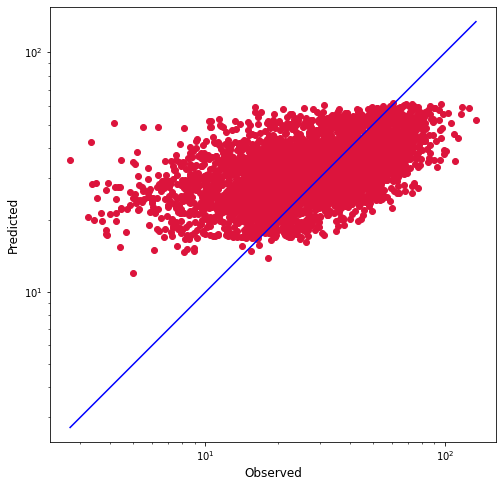

In [ ]:
# generat a plot of observed vs predicted values on a log scale
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

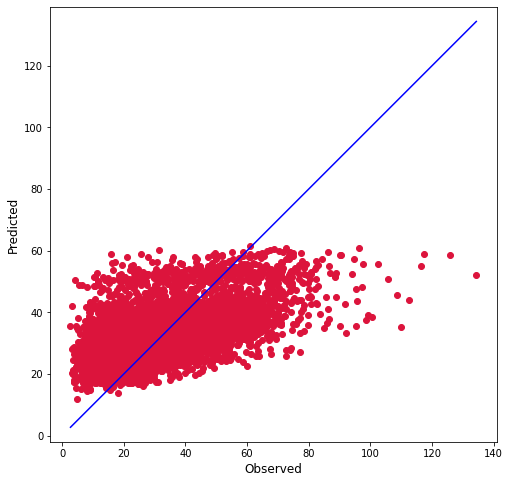

In [ ]:
# generat a plot of observed vs predicted values
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

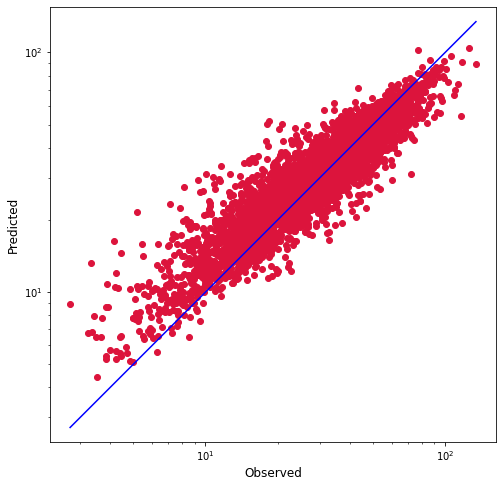

In [ ]:
#vcomb2
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

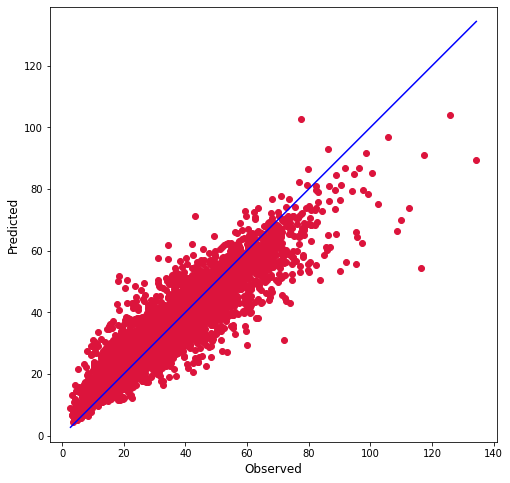

In [ ]:
#vcomb2
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')


p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

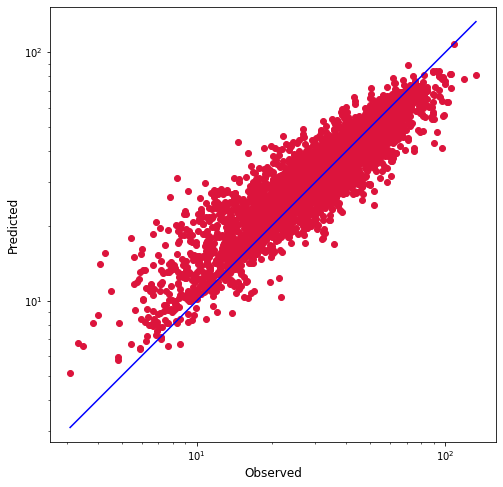

In [ ]:
#vcomb3
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

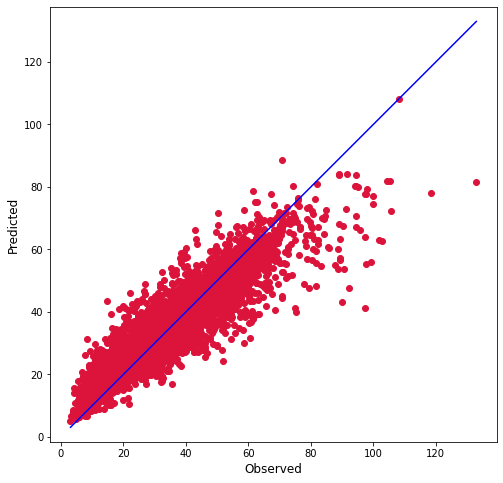

In [ ]:
#vcomb3
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

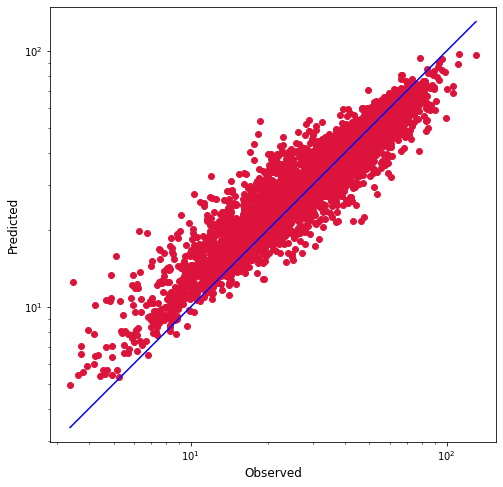

In [ ]:
#vcomb4
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
#vcomb4
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

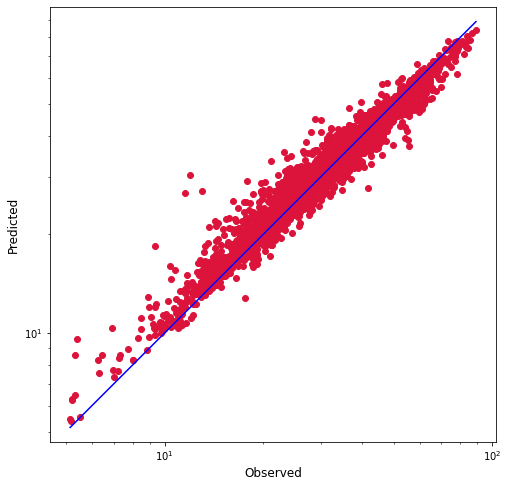

In [ ]:
#vcomb5
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
#vcomb5
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

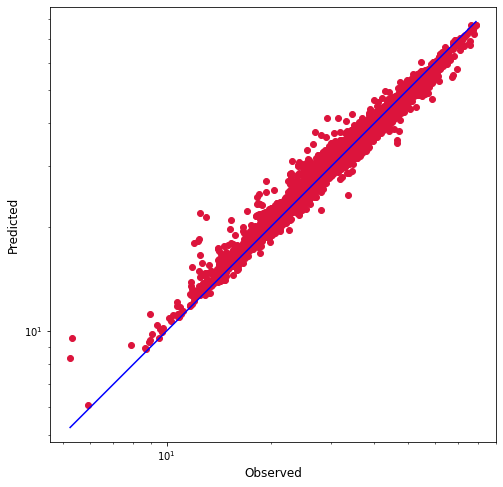

In [ ]:
#vcomb6
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

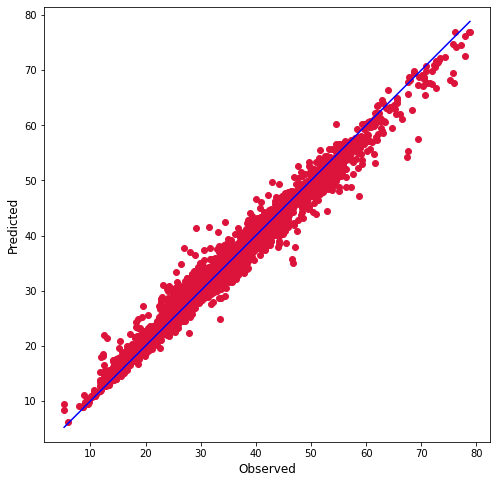

In [ ]:
#vcomb6
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
#vcomb7
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
#vcomb7
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

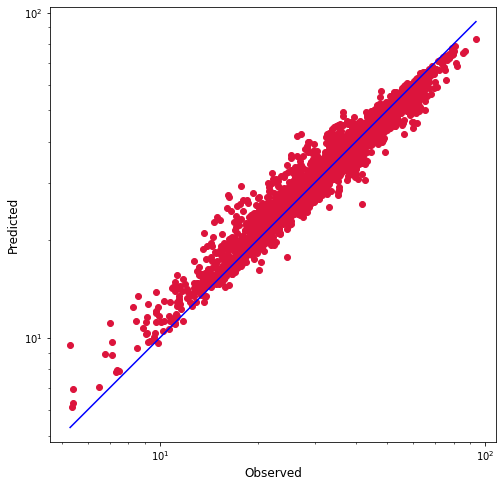

In [ ]:
#vcomb8
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

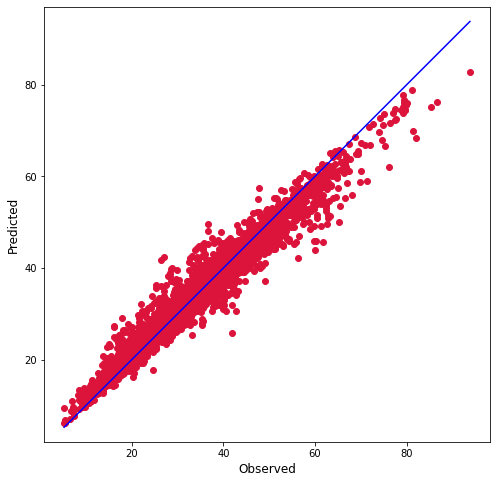

In [ ]:
#vcomb8
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

## **XGBoost**

In [ ]:
# Set range for Number estimators
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 10000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Learning rate investigated values
learning_rate = [0.01,0.03,0.09,0.1,0.3]
# colsample_by tree investigated values
colsample_bytree = [0.3,0.7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'colsample_bytree': colsample_bytree}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgbr = xgb.XGBRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgbr_random = RandomizedSearchCV(estimator = xgbr, param_distributions = random_grid, 
                               n_iter = 10, cv = 10, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
xgbr_random.fit(X_train, y_train)

In [ ]:
#Find best parameters from random search
xgbr_random.best_params_

In [ ]:
#Run and fit the model
xgbr = xgb.XGBRegressor(n_estimators=4000, max_depth=10,
                       learning_rate=0.03,
                       colsample_bytree = 0.3,
                       random_state=42)
xgbr.fit(X_train,y_train)

[14:51:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.3, learning_rate=0.03, max_depth=10,
             n_estimators=4000, random_state=42)

In [ ]:
#Run and fit the model
xgbr = xgb.XGBRegressor(n_estimators=10000, max_depth=9,
                       learning_rate=0.03,
                       colsample_bytree = 0.7,
                       random_state=42)
xgbr.fit(X_train,y_train)

[16:06:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=9,
             n_estimators=10000, random_state=42)

In [ ]:
# generate Predictions
predictx=xgbr.predict(X_test)
predictx

array([17.260605, 26.220947, 46.765236, ..., 45.190258, 46.12404 ,
       45.50879 ], dtype=float32)

In [ ]:

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictx))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictx))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, predictx)))
print("R2: %.4f" % r2_score(y_test, predictx))
print(xgbr.score(X_train, y_train))

Mean Absolute Error: 0.9884313247611792
Mean Squared Error: 2.0861186548751
Root Mean Squared Error: 1.444340214379943
R2: 0.9857


In [ ]:
#K-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbr, X_train, y_train, 
                         scoring='r2', cv=10,n_jobs=-1)
print(scores)
print(scores.mean())

In [ ]:
#Feature importance
Xdf = pd.DataFrame(X)
Xf = list(Xdf.columns)
Xdf = pd.DataFrame(X)
Xf = list(Xdf.columns)
# Get numerical feature importances
importances = list(xgbr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(Xf, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

### XGB Plots

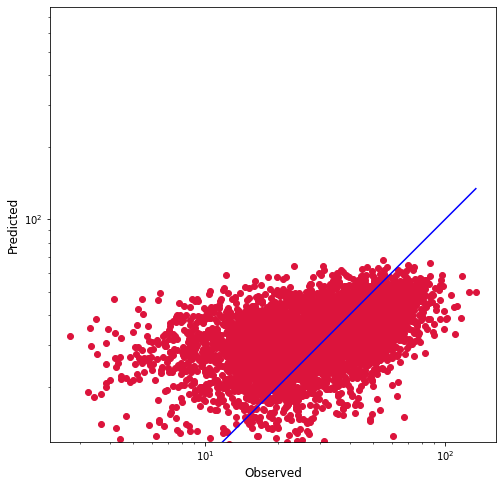

In [ ]:
# generat a plot of observed vs predicted values on a log scale
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
# generat a plot of observed vs predicted values
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

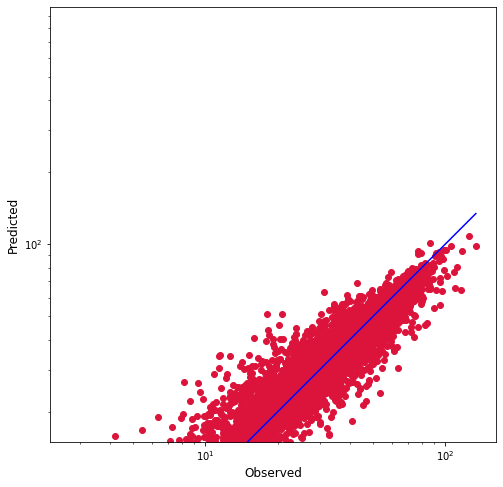

In [ ]:
#vcomb2
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
#vcomb2
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()


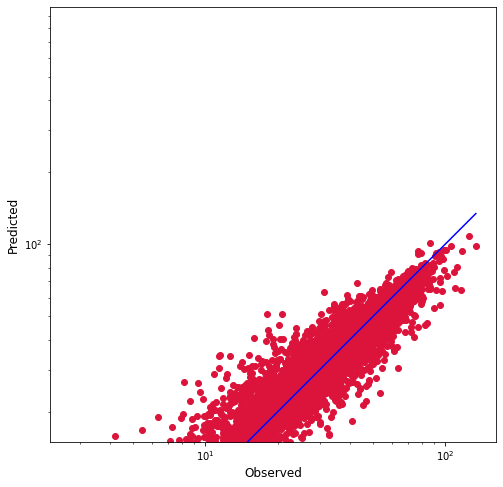

In [ ]:
#vcomb2ohe
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
#vcomb2ohe
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')


p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

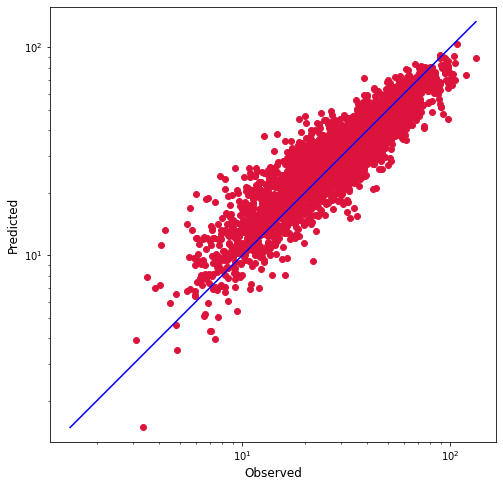

In [ ]:
#vcomb3
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

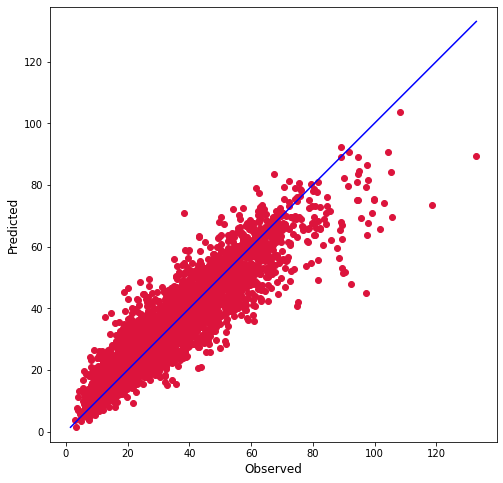

In [ ]:
#vcomb3
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

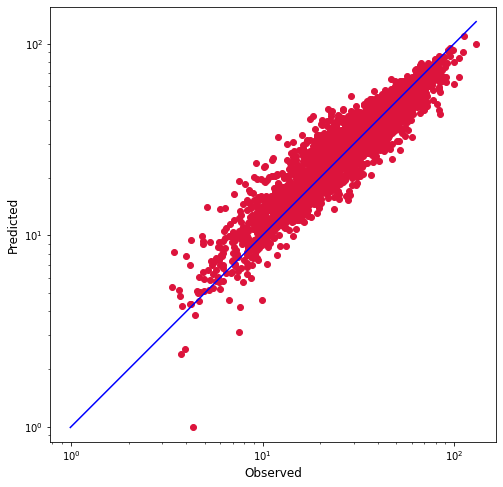

In [ ]:
#vcomb4
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

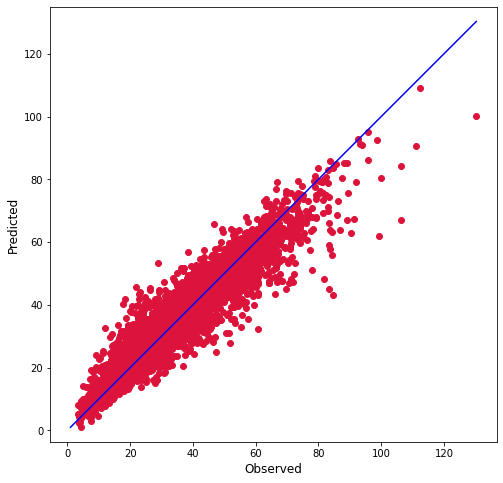

In [ ]:
#vcomb4
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

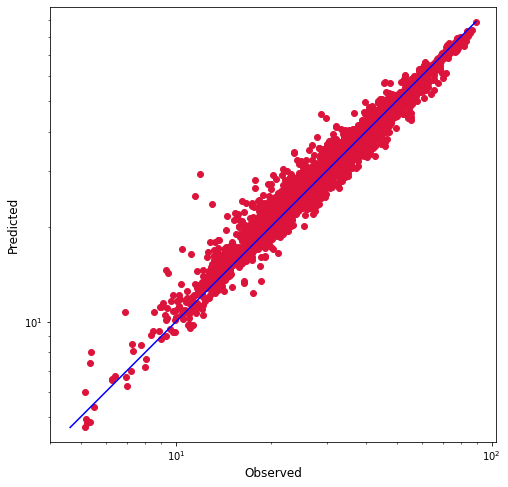

In [ ]:
#vcomb5
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

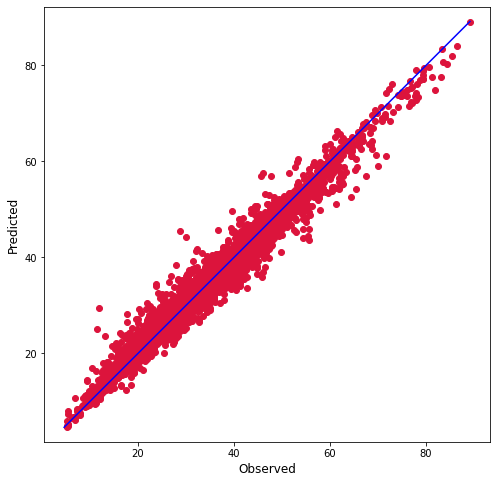

In [ ]:
#vcomb5
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

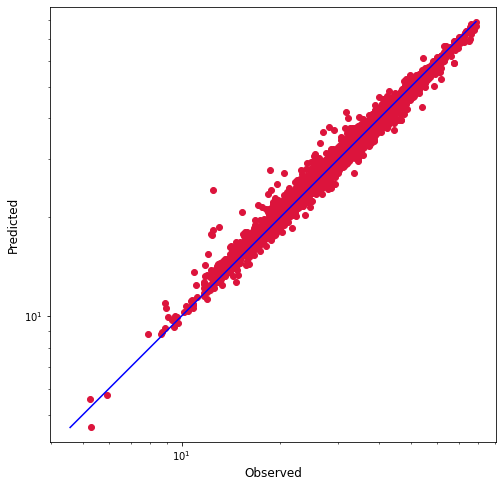

In [ ]:
#vcomb6
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

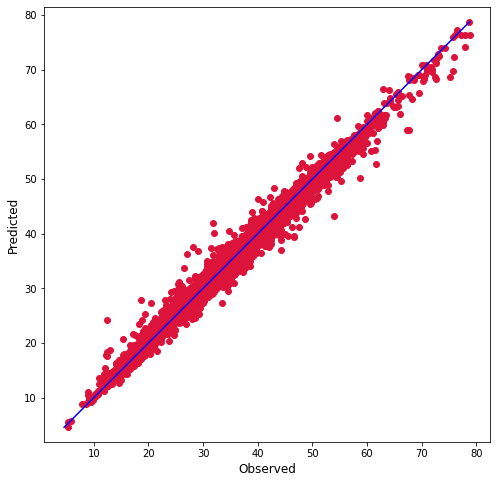

In [ ]:
#vcomb6
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
#vcomb7
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

In [ ]:
#vcomb7
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

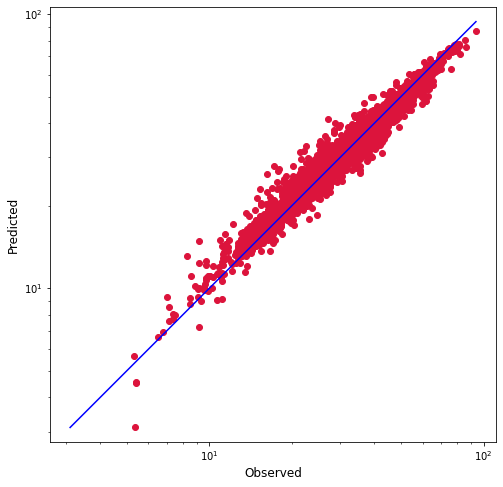

In [ ]:
#vcomb8
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

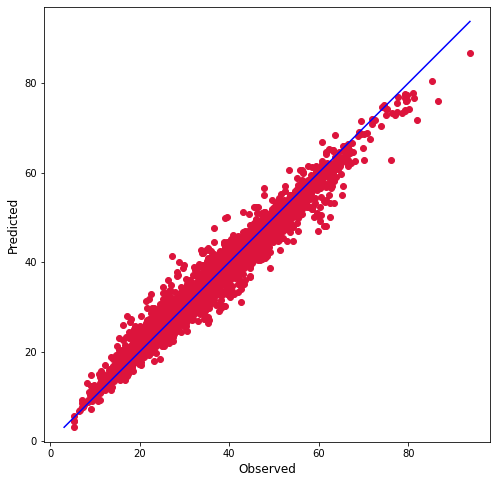

In [ ]:
#vcomb8
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

# **Sharston--------------------------------**

## Feature Engineering

In [ ]:
traffic3 = traffic3[traffic3.LaneDescription != 'Channel 2']

In [ ]:
date_sr = pd.to_datetime(pd.Series(traffic3.date))
traffic3.date = change_format = date_sr.dt.strftime('%d/%m/%Y %H:%M')
 
# Print the formatted date
print(change_format)

0         01/06/2015 00:00
2         01/06/2015 01:00
4         01/06/2015 02:00
6         01/06/2015 03:00
8         01/06/2015 04:00
                ...       
125474    28/07/2022 19:00
125476    28/07/2022 20:00
125478    28/07/2022 21:00
125480    28/07/2022 22:00
125482    28/07/2022 23:00
Name: date, Length: 62742, dtype: object


In [ ]:
df2 = pd.merge(traffic3,PollutantsShar[['date','NO2','wd','ws','temp','longitude', 'latitude']],
               on='date', how='left')

In [ ]:
df2 = df2.drop(['AvgSpeed', 'PmlHGV', 'Flag Text'], axis = 1)

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.isnull().mean()

date                    0.000000
Cosit                   0.000000
LaneNumber              0.000000
LaneDescription         0.000000
LaneDirection           0.000000
DirectionDescription    0.000000
Volume                  0.000000
Flags                   0.000000
NO2                     0.581477
wd                      0.581477
ws                      0.581477
temp                    0.581477
longitude               0.581477
latitude                0.581477
Year                    0.000000
Month                   0.000000
Hour                    0.000000
DayofWeek               0.000000
dayofyear               0.000000
weekofyear              0.000000
quarter                 0.000000
Day                     0.000000
dtype: float64

In [ ]:
df2.shape

(26259, 14)

In [ ]:
df2[['NO2','Volume','ws','wd','temp']].describe()

NO2        Volume           ws            wd          temp
count  26259.000000  62742.000000  26259.00000  26259.000000  26259.000000
mean      21.803994    324.690765      4.67260    207.975776     10.141658
std       15.774068    235.518868      2.46535     82.231640      5.563488
min        0.394010      0.000000      0.00000      0.100000     -5.200000
25%       10.569045     96.000000      2.80000    156.650000      5.900000
50%       16.766660    302.000000      4.30000    214.600000      9.900000
75%       28.416615    527.000000      6.10000    270.550000     14.300000
max      131.411910   1027.000000     18.90000    359.900000     29.500000

In [ ]:
PollutantsShar[['NO2','ws','wd','temp']].describe()

NO2            ws            wd          temp
count  45024.000000  45024.000000  45024.000000  45024.000000
mean      20.306280      4.518694    199.340534      9.155979
std       14.957546      2.460415     79.781688      5.433571
min        0.146140      0.000000      0.100000     -6.100000
25%        9.601845      2.700000    148.300000      5.200000
50%       15.955245      4.100000    204.200000      9.000000
75%       26.784598      5.900000    256.025000     13.100000
max      131.411910     18.900000    359.900000     29.500000

In [ ]:
df2['date'] =  pd.to_datetime(df2['date'])
df2['Year'] = df2['date'].dt.year
df2['Month'] = df2['date'].dt.month
df2['Hour'] = df2['date'].dt.hour
df2['DayofWeek'] = df2['date'].dt.dayofweek
df2['dayofyear'] = df2['date'].dt.dayofyear
df2['weekofyear'] = df2['date'].dt.weekofyear
df2['quarter'] = df2['date'].dt.quarter
df2['Day'] = df2['date'].dt.day

In [ ]:
df2['NO2_moving_avg'] = df2['NO2'].rolling(window=3).mean()
df2['NO2_moving_avg2'] = df2['NO2'].rolling(window=25).mean()
df2['NO2_moving_avg3'] = df2['NO2'].rolling(window=50).mean()
df2['NO2_moving_avg4'] = df2['NO2'].rolling(window=100).mean()

In [ ]:
df2['wd'] = df2['wd'].mask(df2['wd'] == 0.1, 0)
df2['wd'] = df2['wd'].mask((df2['wd'] > 0.1) & (df2['wd'] < 90), 0.5)
df2['wd'] = df2['wd'].mask(df2['wd'] == 90, 1)
df2['wd'] = df2['wd'].mask((df2['wd'] > 90) & (df2['wd'] < 180), 1.5)
df2['wd'] = df2['wd'].mask(df2['wd'] == 180, 2)
df2['wd'] = df2['wd'].mask((df2['wd'] > 180) & (df2['wd'] < 270), 2.5)
df2['wd'] = df2['wd'].mask(df2['wd'] == 270, 3)
df2['wd'] = df2['wd'].mask((df2['wd'] > 270) & (df2['wd'] < 359.9), 3.5)
df2['wd'] = df2['wd'].mask(df2['wd'] == 359.9, 'North')

df2['wd'] = df2['wd'].mask(df2['wd'] == 0, 'North')
df2['wd'] = df2['wd'].mask(df2['wd'] == 0.5, 'North East')
df2['wd'] = df2['wd'].mask(df2['wd'] == 1, 'East')
df2['wd'] = df2['wd'].mask(df2['wd'] == 1.5, 'South East')
df2['wd'] = df2['wd'].mask(df2['wd'] == 2, 'South')
df2['wd'] = df2['wd'].mask(df2['wd'] == 2.5, 'South West')
df2['wd'] = df2['wd'].mask(df2['wd'] == 3, 'West')
df2['wd'] = df2['wd'].mask(df2['wd'] == 3.5, 'North West')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df2[['wd']]).toarray())

#merge one-hot encoded columns back with original DataFrame
df2 = df2.join(encoder_df)

In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
df2[['ohe1','ohe2','ohe3','oh4','o5','o6','o7']] = encoder.fit_transform(df2[['DayofWeek']]).toarray()

#merge one-hot encoded columns back with original DataFrame
#PollutantsPicc = PollutantsPicc.join(encoder_df)

pollutants

In [ ]:
PollutantsShar['date'] =  pd.to_datetime(PollutantsShar['date'])
PollutantsShar['Year'] = PollutantsShar['date'].dt.year
PollutantsShar['Month'] = PollutantsShar['date'].dt.month
PollutantsShar['Hour'] = PollutantsShar['date'].dt.hour
PollutantsShar['DayofWeek'] = PollutantsShar['date'].dt.dayofweek
PollutantsShar['dayofyear'] = PollutantsShar['date'].dt.dayofyear
PollutantsShar['weekofyear'] = PollutantsShar['date'].dt.weekofyear
PollutantsShar['quarter'] = PollutantsShar['date'].dt.quarter
PollutantsShar['Day'] = PollutantsShar['date'].dt.day

In [ ]:
PollutantsShar['NO2_moving_avg'] = PollutantsShar['NO2'].rolling(window=3).mean()
PollutantsShar['NO2_moving_avg2'] = PollutantsShar['NO2'].rolling(window=25).mean()
PollutantsShar['NO2_moving_avg3'] = PollutantsShar['NO2'].rolling(window=50).mean()
PollutantsShar['NO2_moving_avg4'] = PollutantsShar['NO2'].rolling(window=100).mean()

In [ ]:
PollutantsShar.isnull().mean(
    
)

date         0.000000
O3           0.000000
NO           0.000000
NO2          0.000000
NOXasNO2     0.000044
wd           0.000000
ws           0.000000
temp         0.000000
site         0.000000
code         0.000000
latitude     0.000000
longitude    0.000000
Ox           0.000000
NOx          0.000000
dtype: float64

In [ ]:
PollutantsShar


date        O3        NO       NO2  NOXasNO2     wd   ws  \
0       21/07/2016 0:00  23.54926   1.05605  23.83039  25.44964  219.3  2.5   
1       21/07/2016 1:00  21.88618   0.97123  16.47491  17.96411  220.0  2.4   
2       21/07/2016 2:00  18.31055   1.04555  17.09345  18.69660  225.5  2.9   
3       21/07/2016 3:00  19.35829   1.39386  17.29187  19.42909  223.2  2.7   
4       21/07/2016 4:00  12.32345   3.16814  18.67174  23.52949  209.1  2.3   
...                 ...       ...       ...       ...       ...    ...  ...   
45019  29/11/2021 19:00  20.95485   4.73974  22.56750  29.83500  235.7  4.2   
45020  29/11/2021 20:00  14.76818  15.84071  34.42500  58.71375  260.7  5.0   
45021  29/11/2021 21:00  22.35184   4.36555  28.30500  34.99875  272.2  7.0   
45022  29/11/2021 22:00  41.71013   2.86879  18.74250  23.14125  279.7  6.9   
45023  29/11/2021 23:00  53.68433   0.74838   7.26750   8.41500  289.4  6.7   

       temp                 site  code   latitude  longitude        Ox  \
0      12.2  Manchester Sharston  MAHG  53.371306  -2.239218  47.37965   
1      12.3  Manchester Sharston  MAHG  53.371306  -2.239218  38.36109   
2      12.1  Manchester Sharston  MAHG  53.371306  -2.239218  35.40400   
3      11.5  Manchester Sharston  MAHG  53.371306  -2.239218  36.65016   
4      11.2  Manchester Sharston  MAHG  53.371306  -2.239218  30.99519   
...     ...                  ...   ...        ...        ...       ...   
45019   4.7  Manchester Sharston  MAHG  53.371306  -2.239218  43.52235   
45020   6.0  Manchester Sharston  MAHG  53.371306  -2.239218  49.19318   
45021   7.4  Manchester Sharston  MAHG  53.371306  -2.239218  50.65684   
45022   8.0  Manchester Sharston  MAHG  53.371306  -2.239218  60.45263   
45023   8.5  Manchester Sharston  MAHG  53.371306  -2.239218  60.95183   

            NOx  
0      24.88644  
1      17.44614  
2      18.13900  
3      18.68573  
4      21.83988  
...         ...  
45019  27.30724  
45020  50.26571  
45021  32.67055  
45022  21.61129  
45023   8.01588  

[45024 rows x 14 columns]

In [ ]:
PollutantsPicc

date        O3        NO       NO2   PM2.5     wd   ws  \
0      2016-01-01 00:00:00  20.37676  10.05948  41.22075  24.000  206.2  2.4   
1      2016-01-01 01:00:00  17.88280   9.50068  47.93235  13.300  201.0  2.2   
2      2016-01-01 02:00:00  16.03096  10.17391  46.82087   7.600  175.3  2.0   
3      2016-01-01 03:00:00  12.34390  12.80322  48.36665   6.300  149.3  2.3   
4      2016-01-01 04:00:00   7.85458  24.80630  56.36711   4.500  138.9  2.3   
...                    ...       ...       ...       ...     ...    ...  ...   
44589  2021-10-05 19:00:00  35.72303   1.12257  16.83000   3.113  315.6  5.2   
44590  2021-10-05 20:00:00  41.31099   1.62149  14.91750   3.774  314.5  5.0   
44591  2021-10-05 21:00:00  46.30024   1.12257  10.51875   3.679  316.6  5.0   
44592  2021-10-05 22:00:00  48.29594   1.37203   8.60625   4.057  318.2  4.9   
44593  2021-10-05 23:00:00  48.29594   1.12257   7.26750   3.491  318.1  4.7   

       temp                   site  code  latitude  longitude        Ox  \
0       1.2  Manchester Piccadilly  MAN3  53.48152  -2.237881  61.59751   
1       0.4  Manchester Piccadilly  MAN3  53.48152  -2.237881  65.81515   
2      -0.3  Manchester Piccadilly  MAN3  53.48152  -2.237881  62.85183   
3      -0.4  Manchester Piccadilly  MAN3  53.48152  -2.237881  60.71055   
4      -0.6  Manchester Piccadilly  MAN3  53.48152  -2.237881  64.22169   
...     ...                    ...   ...       ...        ...       ...   
44589   9.9  Manchester Piccadilly  MAN3  53.48152  -2.237881  52.55303   
44590   9.5  Manchester Piccadilly  MAN3  53.48152  -2.237881  56.22849   
44591   9.2  Manchester Piccadilly  MAN3  53.48152  -2.237881  56.81899   
44592   9.1  Manchester Piccadilly  MAN3  53.48152  -2.237881  56.90219   
44593   8.9  Manchester Piccadilly  MAN3  53.48152  -2.237881  55.56344   

            NOx  
0      51.28023  
1      57.43303  
2      56.99478  
3      61.16987  
4      81.17341  
...         ...  
44589  17.95257  
44590  16.53899  
44591  11.64132  
44592   9.97828  
44593   8.39007  

[44594 rows x 14 columns]

In [ ]:
traffic22

date         Cosit  LaneNumber LaneDescription  \
0      2016-03-04 00:00:00  MAC030001146           1       Channel 1   
2      2016-03-04 01:00:00  MAC030001146           1       Channel 1   
4      2016-03-04 02:00:00  MAC030001146           1       Channel 1   
6      2016-03-04 03:00:00  MAC030001146           1       Channel 1   
8      2016-03-04 04:00:00  MAC030001146           1       Channel 1   
...                    ...           ...         ...             ...   
84686  2021-01-01 19:00:00  MAC030001146           1       Channel 1   
84688  2021-01-01 20:00:00  MAC030001146           1       Channel 1   
84690  2021-01-01 21:00:00  MAC030001146           1       Channel 1   
84692  2021-01-01 22:00:00  MAC030001146           1       Channel 1   
84694  2021-01-01 23:00:00  MAC030001146           1       Channel 1   

       LaneDirection DirectionDescription  Volume  Flags Flag Text  AvgSpeed  \
0                  2            SouthEast      61      0       NaN       NaN   
2                  2            SouthEast      65      0       NaN       NaN   
4                  2            SouthEast      52      0       NaN       NaN   
6                  2            SouthEast      46      0       NaN       NaN   
8                  2            SouthEast      45      0       NaN       NaN   
...              ...                  ...     ...    ...       ...       ...   
84686              2            SouthEast     130     16   Holiday       NaN   
84688              2            SouthEast      98     16   Holiday       NaN   
84690              2            SouthEast      78     16   Holiday       NaN   
84692              2            SouthEast      85     16   Holiday       NaN   
84694              2            SouthEast      96     16   Holiday       NaN   

       PmlHGV  
0         NaN  
2         NaN  
4         NaN  
6         NaN  
8         NaN  
...       ...  
84686     NaN  
84688     NaN  
84690     NaN  
84692     NaN  
84694     NaN  

[42348 rows x 11 columns]

In [ ]:
PollutantsShar = PollutantsShar.dropna()

In [ ]:
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 0, 0)
PollutantsShar['wd'] = PollutantsShar['wd'].mask((PollutantsShar['wd'] > 0) & (PollutantsShar['wd'] < 90), 0.5)
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 90, 1)
PollutantsShar['wd'] = PollutantsShar['wd'].mask((PollutantsShar['wd'] > 90) & (PollutantsShar['wd'] < 180), 1.5)
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 180, 2)
PollutantsShar['wd'] = PollutantsShar['wd'].mask((PollutantsShar['wd'] > 180) & (PollutantsShar['wd'] < 270), 2.5)
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 270, 3)
PollutantsShar['wd'] = PollutantsShar['wd'].mask((PollutantsShar['wd'] > 270) & (PollutantsShar['wd'] < 360), 3.5)
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 360, 'North')

PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 0, 'North')
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 0.5, 'North East')
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 1, 'East')
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 1.5, 'South East')
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 2, 'South')
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 2.5, 'South West')
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 3, 'West')
PollutantsShar['wd'] = PollutantsShar['wd'].mask(PollutantsShar['wd'] == 3.5, 'North West')

In [ ]:
PollutantsShar.shape

(44822, 40)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(PollutantsShar[['wd']]).toarray())

#merge one-hot encoded columns back with original DataFrame
PollutantsShar = PollutantsShar.join(encoder_df)

In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
PollutantsShar[['ohe1','ohe2','ohe3','oh4','o5','o6','o7']] = encoder.fit_transform(PollutantsShar[['DayofWeek']]).toarray()

#merge one-hot encoded columns back with original DataFrame
#PollutantsPicc = PollutantsPicc.join(encoder_df)

In [ ]:
PollutantsShar20 = PollutantsShar.loc[(PollutantsShar['Year'] == 2020)]
PollutantsShar21 = PollutantsShar.loc[(PollutantsShar['Year'] == 2021)]
PollutantsShar19 = PollutantsShar.loc[(PollutantsShar['Year'] == 2019)]
PollutantsShar18 = PollutantsShar.loc[(PollutantsShar['Year'] == 2018)]
PollutantsShar17 = PollutantsShar.loc[(PollutantsShar['Year'] == 2017)]
PollutantsShar16 = PollutantsShar.loc[(PollutantsShar['Year'] == 2016)]

In [ ]:
PollutantsShar20mn6 = PollutantsShar.loc[(PollutantsShar['Year'] == 2020) & (PollutantsShar['Month'] == 6)]

In [ ]:
PollutantsShar20mn6dy4 = PollutantsShar.loc[(PollutantsShar['Year'] == 2020) & (PollutantsShar['Month'] == 6) & (PollutantsShar['Day'] == 4)]

In [ ]:
PollutantsShar20mn6w23 = PollutantsShar.loc[(PollutantsShar['Year'] == 2020) & (PollutantsShar['Month'] == 6) & 
                                                 (PollutantsShar['weekofyear'] == 23 )]

In [ ]:
PollutantsShar20.set_index('date')
PollutantsShar21.set_index('date')
PollutantsShar19.set_index('date')
PollutantsShar18.set_index('date')
PollutantsShar17.set_index('date')
PollutantsShar16.set_index('date')
PollutantsShar20mn6.set_index('date')
PollutantsShar20mn6dy4.set_index('date')
PollutantsShar20mn6w23.set_index('date')

O3       NO       NO2  NOXasNO2          wd   ws  \
date                                                                          
2020-06-01 00:00:00  73.57481  0.38827   4.74195   5.33729  South West  6.6   
2020-06-01 01:00:00  72.57696  0.38827   5.87612   6.47146  South West  6.2   
2020-06-01 02:00:00  71.64563  0.42062   7.96143   8.60637  South West  7.1   
2020-06-01 03:00:00  72.74327  0.32356   3.15659   3.65271  South West  7.6   
2020-06-01 04:00:00  70.54800  0.42062   3.35802   4.00296  South West  8.4   
...                       ...      ...       ...       ...         ...  ...   
2020-06-07 19:00:00  55.23100  1.23691   9.11116  11.00773  North West  3.1   
2020-06-07 20:00:00  51.04003  1.04161  11.41203  13.00914  North West  2.1   
2020-06-07 21:00:00  45.05293  0.87886  13.66298  15.01054  North West  2.6   
2020-06-07 22:00:00  42.40863  0.48825  12.61074  13.35938  North West  1.6   
2020-06-07 23:00:00  39.96389  0.52081  12.41072  13.20928  South West  1.8   

                     temp                 site  code   latitude  longitude  \
date                                                                         
2020-06-01 00:00:00   4.6  Manchester Sharston  MAHG  53.371306  -2.239218   
2020-06-01 01:00:00   4.3  Manchester Sharston  MAHG  53.371306  -2.239218   
2020-06-01 02:00:00   4.4  Manchester Sharston  MAHG  53.371306  -2.239218   
2020-06-01 03:00:00   4.6  Manchester Sharston  MAHG  53.371306  -2.239218   
2020-06-01 04:00:00   4.6  Manchester Sharston  MAHG  53.371306  -2.239218   
...                   ...                  ...   ...        ...        ...   
2020-06-07 19:00:00  12.3  Manchester Sharston  MAHG  53.371306  -2.239218   
2020-06-07 20:00:00  11.1  Manchester Sharston  MAHG  53.371306  -2.239218   
2020-06-07 21:00:00  11.2  Manchester Sharston  MAHG  53.371306  -2.239218   
2020-06-07 22:00:00  10.3  Manchester Sharston  MAHG  53.371306  -2.239218   
2020-06-07 23:00:00   9.4  Manchester Sharston  MAHG  53.371306  -2.239218   

                           Ox       NOx  Year  Month  Hour  DayofWeek  \
date                                                                    
2020-06-01 00:00:00  78.31676   5.13022  2020      6     0          0   
2020-06-01 01:00:00  78.45308   6.26439  2020      6     1          0   
2020-06-01 02:00:00  79.60706   8.38205  2020      6     2          0   
2020-06-01 03:00:00  75.89986   3.48015  2020      6     3          0   
2020-06-01 04:00:00  73.90602   3.77864  2020      6     4          0   
...                       ...       ...   ...    ...   ...        ...   
2020-06-07 19:00:00  64.34216  10.34807  2020      6    19          6   
2020-06-07 20:00:00  62.45206  12.45364  2020      6    20          6   
2020-06-07 21:00:00  58.71591  14.54184  2020      6    21          6   
2020-06-07 22:00:00  55.01937  13.09899  2020      6    22          6   
2020-06-07 23:00:00  52.37461  12.93153  2020      6    23          6   

                     dayofyear  weekofyear  quarter  Day  NO2_moving_avg  \
date                                                                       
2020-06-01 00:00:00        153          23        2    1       10.202007   
2020-06-01 01:00:00        153          23        2    1        7.700717   
2020-06-01 02:00:00        153          23        2    1        6.193167   
2020-06-01 03:00:00        153          23        2    1        5.664713   
2020-06-01 04:00:00        153          23        2    1        4.825347   
...                        ...         ...      ...  ...             ...   
2020-06-07 19:00:00        159          23        2    7        6.392500   
2020-06-07 20:00:00        159          23        2    7        8.710503   
2020-06-07 21:00:00        159          23        2    7       11.395390   
2020-06-07 22:00:00        159          23        2    7       12.561917   
2020-06-07 23:00:00        159          23        2    7       12.894813   

                     NO2_moving_avg2  NO2_mov

In [ ]:
df220 = df2.loc[(df2['Year'] == 2020)]
df221 = df2.loc[(df2['Year'] == 2021)]
df219 = df2.loc[(df2['Year'] == 2019)]
df218 = df2.loc[(df2['Year'] == 2018)]
df217 = df2.loc[(df2['Year'] == 2017)]
df216 = df2.loc[(df2['Year'] == 2016)]
df220mn6 = df2.loc[(df2['Year'] == 2020) & (df2['Month'] == 6)]
df220mn6dy4 = df2.loc[(df2['Year'] == 2020) & (df2['Month'] == 6) & (df2['Day'] == 4)]
df220mn6w23 = df2.loc[(df2['Year'] == 2020) & (df2['Month'] == 6) & 
                                                 (df2['weekofyear'] == 23 )]


In [ ]:
df220.set_index('date')
df221.set_index('date')
df219.set_index('date')
df218.set_index('date')
df217.set_index('date')
df216.set_index('date')
df220mn6.set_index('date')
df220mn6dy4.set_index('date')
df220mn6w23.set_index('date')

Cosit  LaneNumber LaneDescription  \
date                                                               
2020-06-01 00:00:00  ="MAC030004369"           1       Channel 1   
2020-06-01 01:00:00  ="MAC030004369"           1       Channel 1   
2020-06-01 02:00:00  ="MAC030004369"           1       Channel 1   
2020-06-01 03:00:00  ="MAC030004369"           1       Channel 1   
2020-06-01 04:00:00  ="MAC030004369"           1       Channel 1   
...                              ...         ...             ...   
2020-06-07 19:00:00  ="MAC030004369"           1       Channel 1   
2020-06-07 20:00:00  ="MAC030004369"           1       Channel 1   
2020-06-07 21:00:00  ="MAC030004369"           1       Channel 1   
2020-06-07 22:00:00  ="MAC030004369"           1       Channel 1   
2020-06-07 23:00:00  ="MAC030004369"           1       Channel 1   

                     LaneDirection DirectionDescription  Volume  Flags  \
date                                                                     
2020-06-01 00:00:00              2            SouthEast      57      0   
2020-06-01 01:00:00              2            SouthEast      28      0   
2020-06-01 02:00:00              2            SouthEast      38      0   
2020-06-01 03:00:00              2            SouthEast      48      0   
2020-06-01 04:00:00              2            SouthEast      78      0   
...                            ...                  ...     ...    ...   
2020-06-07 19:00:00              2            SouthEast     340      0   
2020-06-07 20:00:00              2            SouthEast     256      0   
2020-06-07 21:00:00              2            SouthEast     160      0   
2020-06-07 22:00:00              2            SouthEast      90      0   
2020-06-07 23:00:00              2            SouthEast      43      0   

                          NO2          wd   ws  temp  longitude   latitude  \
date                                                                         
2020-06-01 00:00:00       NaN         NaN  NaN   NaN        NaN        NaN   
2020-06-01 01:00:00       NaN         NaN  NaN   NaN        NaN        NaN   
2020-06-01 02:00:00       NaN         NaN  NaN   NaN        NaN        NaN   
2020-06-01 03:00:00       NaN         NaN  NaN   NaN        NaN        NaN   
2020-06-01 04:00:00       NaN         NaN  NaN   NaN        NaN        NaN   
...                       ...         ...  ...   ...        ...        ...   
2020-06-07 19:00:00   9.11116  North West  3.1  12.3  -2.239218  53.371306   
2020-06-07 20:00:00  11.41203  North West  2.1  11.1  -2.239218  53.371306   
2020-06-07 21:00:00  13.66298  North West  2.6  11.2  -2.239218  53.371306   
2020-06-07 22:00:00  12.61074  North West  1.6  10.3  -2.239218  53.371306   
2020-06-07 23:00:00  12.41072  South West  1.8   9.4  -2.239218  53.371306   

                     Year  Month  Hour  DayofWeek  dayofyear  weekofyear  \
date                                                                       
2020-06-01 00:00:00  2020      6     0          0        153          23   
2020-06-01 01:00:00  2020      6     1          0        153          23   
2020-06-01 02:00:00  2020      6     2          0        153          23   
2020-06-01 03:00:00  2020      6     3          0        153          23   
2020-06-01 04:00:00  2020      6     4          0        153          23   
...                   ...    ...   ...        ...        ...         ...   
2020-06-07 19:00:00  2020      6    19          6        159          23   
2020-06-07 20:00:00  2020      6    20          6        159          23   
2020-06-07 21:00:00  2020      6    21          6        159          23   
2020-06-07 22:00:00  2020      6    22          6        159          23   
2020-06-07 23:00:00  2020      6    23          6        159          23   

                     quarter  Day  
date                               
2020-06-01 00:00:00        2    1  
2020-06-01 01:00:00        2    1  
2020-06-01 02:00:00        2    1  

In [ ]:
PollutantsShar.set_index('date')

O3        NO       NO2   NOXasNO2          wd   ws  \
date                                                                            
2016-07-25 03:00:00  37.41938   0.25351   9.28662    9.67534  South West  3.8   
2016-07-25 04:00:00  24.14797   1.48865  21.56296   23.84553  South West  3.1   
2016-07-25 05:00:00  19.80732   4.81583  25.55052   32.93468  South West  3.3   
2016-07-25 06:00:00  23.05034   8.90260  22.75397   36.40444  South West  3.4   
2016-07-25 07:00:00  30.38453   8.20536  14.83144   27.41282  South West  3.5   
...                       ...       ...       ...        ...         ...  ...   
2021-11-25 14:00:00  41.11142   5.86231  25.05375   34.04250  North West  3.5   
2021-11-25 15:00:00  32.52991   8.73110  34.99875   48.38625  North West  1.9   
2021-11-25 16:00:00  24.14797  13.47084  46.47375   67.12875  South West  2.1   
2021-11-25 17:00:00   4.19097  64.85960  76.30875  175.75875  South West  2.6   
2021-11-25 18:00:00   2.59441  58.62310  73.44000  163.32750  South West  2.6   

                     temp                 site  code   latitude  longitude  \
date                                                                         
2016-07-25 03:00:00  11.9  Manchester Sharston  MAHG  53.371306  -2.239218   
2016-07-25 04:00:00  11.9  Manchester Sharston  MAHG  53.371306  -2.239218   
2016-07-25 05:00:00  11.9  Manchester Sharston  MAHG  53.371306  -2.239218   
2016-07-25 06:00:00  11.9  Manchester Sharston  MAHG  53.371306  -2.239218   
2016-07-25 07:00:00  13.2  Manchester Sharston  MAHG  53.371306  -2.239218   
...                   ...                  ...   ...        ...        ...   
2021-11-25 14:00:00   3.5  Manchester Sharston  MAHG  53.371306  -2.239218   
2021-11-25 15:00:00   2.1  Manchester Sharston  MAHG  53.371306  -2.239218   
2021-11-25 16:00:00   1.3  Manchester Sharston  MAHG  53.371306  -2.239218   
2021-11-25 17:00:00   1.0  Manchester Sharston  MAHG  53.371306  -2.239218   
2021-11-25 18:00:00   0.7  Manchester Sharston  MAHG  53.371306  -2.239218   

                           Ox        NOx  Year  Month  Hour  DayofWeek  \
date                                                                     
2016-07-25 03:00:00  46.70600    9.54013  2016      7     3          0   
2016-07-25 04:00:00  45.71093   23.05161  2016      7     4          0   
2016-07-25 05:00:00  45.35784   30.36635  2016      7     5          0   
2016-07-25 06:00:00  45.80431   31.65657  2016      7     6          0   
2016-07-25 07:00:00  45.21597   23.03680  2016      7     7          0   
...                       ...        ...   ...    ...   ...        ...   
2021-11-25 14:00:00  66.16517   30.91606  2021     11    14          3   
2021-11-25 15:00:00  67.52866   43.72985  2021     11    15          3   
2021-11-25 16:00:00  70.62172   59.94459  2021     11    16          3   
2021-11-25 17:00:00  80.49972  141.16835  2021     11    17          3   
2021-11-25 18:00:00  76.03441  132.06310  2021     11    18          3   

                     dayofyear  weekofyear  quarter  Day  NO2_moving_avg  \
date                                                                       
2016-07-25 03:00:00        207          30        3   25       13.182067   
2016-07-25 04:00:00        207          30        3   25       15.481370   
2016-07-25 05:00:00        207          30        3   25       18.800033   
2016-07-25 06:00:00        207          30        3   25       23.289150   
2016-07-25 07:00:00        207          30        3   25       21.045310   
...                        ...         ...      ...  ...             ...   
2021-11-25 14:00:00        329          47        4   25       22.567500   
2021-11-25 15:00:00        329          47        4   25       27.603750   
2021-11-25 16:00:00        329          47        4   25       35.508750   
2021-11-25 17:00:00        329          47        4   25       52.593750   
2021-11-25 18:00:00        329          47        4   25       65.407500   

      

In [ ]:
df2.set_index('date')

Cosit  LaneNumber LaneDescription  \
date                                                               
2016-07-29 17:00:00  ="MAC030004369"           1       Channel 1   
2016-07-29 18:00:00  ="MAC030004369"           1       Channel 1   
2016-07-29 19:00:00  ="MAC030004369"           1       Channel 1   
2016-07-29 20:00:00  ="MAC030004369"           1       Channel 1   
2016-07-29 21:00:00  ="MAC030004369"           1       Channel 1   
...                              ...         ...             ...   
2021-11-29 19:00:00  ="MAC030004369"           1       Channel 1   
2021-11-29 20:00:00  ="MAC030004369"           1       Channel 1   
2021-11-29 21:00:00  ="MAC030004369"           1       Channel 1   
2021-11-29 22:00:00  ="MAC030004369"           1       Channel 1   
2021-11-29 23:00:00  ="MAC030004369"           1       Channel 1   

                     LaneDirection DirectionDescription  Volume  Flags  \
date                                                                     
2016-07-29 17:00:00              2            SouthEast     638      0   
2016-07-29 18:00:00              2            SouthEast     448      0   
2016-07-29 19:00:00              2            SouthEast     330      0   
2016-07-29 20:00:00              2            SouthEast     330      0   
2016-07-29 21:00:00              2            SouthEast     204      0   
...                            ...                  ...     ...    ...   
2021-11-29 19:00:00              2            SouthEast     308      0   
2021-11-29 20:00:00              2            SouthEast     264      0   
2021-11-29 21:00:00              2            SouthEast     182      0   
2021-11-29 22:00:00              2            SouthEast     125      0   
2021-11-29 23:00:00              2            SouthEast     104      0   

                          NO2          wd   ws  temp  longitude   latitude  \
date                                                                         
2016-07-29 17:00:00  13.17808  North West  5.3  17.5  -2.239218  53.371306   
2016-07-29 18:00:00  11.98898  North West  3.9  16.2  -2.239218  53.371306   
2016-07-29 19:00:00  15.31865  North West  2.6  14.2  -2.239218  53.371306   
2016-07-29 20:00:00  18.93471  South West  2.0  12.8  -2.239218  53.371306   
2016-07-29 21:00:00  32.82663  South West  1.9  11.8  -2.239218  53.371306   
...                       ...         ...  ...   ...        ...        ...   
2021-11-29 19:00:00  22.56750  South West  4.2   4.7  -2.239218  53.371306   
2021-11-29 20:00:00  34.42500  South West  5.0   6.0  -2.239218  53.371306   
2021-11-29 21:00:00  28.30500  North West  7.0   7.4  -2.239218  53.371306   
2021-11-29 22:00:00  18.74250  North West  6.9   8.0  -2.239218  53.371306   
2021-11-29 23:00:00   7.26750  North West  6.7   8.5  -2.239218  53.371306   

                     Year  Month  Hour  DayofWeek  dayofyear  weekofyear  \
date                                                                       
2016-07-29 17:00:00  2016      7    17          4        211          30   
2016-07-29 18:00:00  2016      7    18          4        211          30   
2016-07-29 19:00:00  2016      7    19          4        211          30   
2016-07-29 20:00:00  2016      7    20          4        211          30   
2016-07-29 21:00:00  2016      7    21          4        211          30   
...                   ...    ...   ...        ...        ...         ...   
2021-11-29 19:00:00  2021     11    19          0        333          48   
2021-11-29 20:00:00  2021     11    20          0        333          48   
2021-11-29 21:00:00  2021     11    21          0        333          48   
2021-11-29 22:00:00  2021     11    22          0        333          48   
2021-11-29 23:00:00  2021     11    23          0        333          48   

                     quarter  Day  NO2_moving_avg  NO2_moving_avg2  \
date                                                                 
2016-07-29 17:00:00        3   29      

## EDA

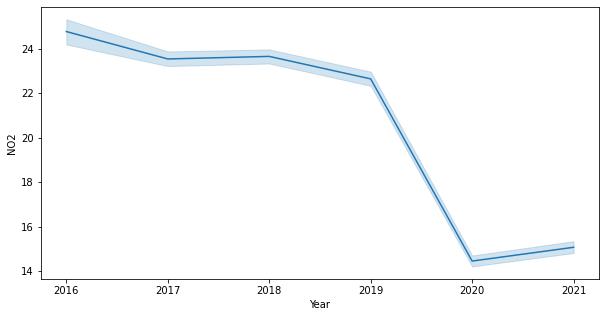

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.lineplot(PollutantsShar.Year, PollutantsShar.NO2)
plt.show()

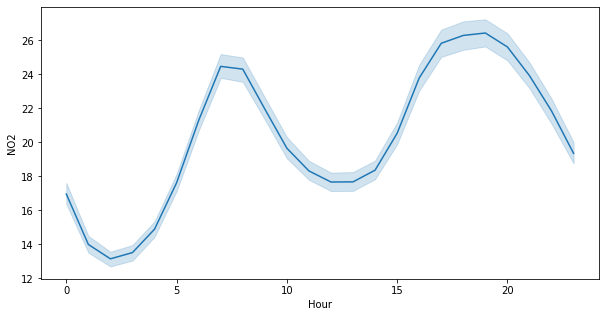

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.lineplot(PollutantsShar.Hour, PollutantsShar.NO2)
plt.show()

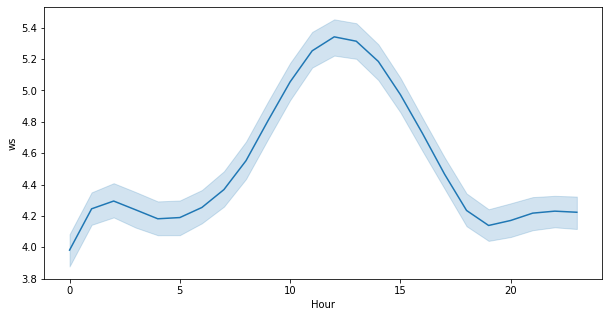

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.lineplot(PollutantsShar.Hour, PollutantsShar.ws)
plt.show()

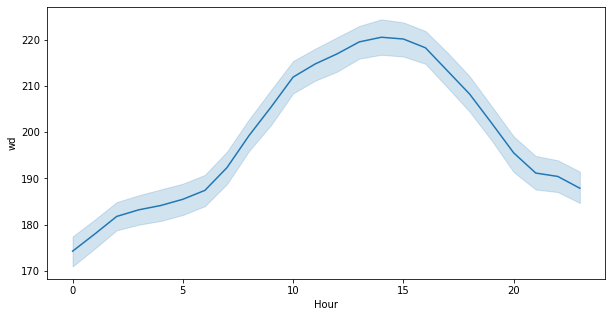

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.lineplot(PollutantsShar.Hour, PollutantsShar.wd)
plt.show()

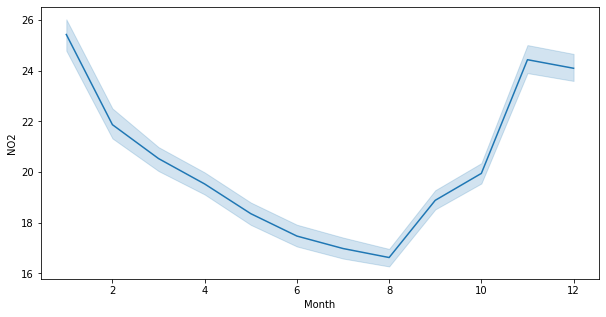

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.lineplot(PollutantsShar.Month, PollutantsShar.NO2)
plt.show()

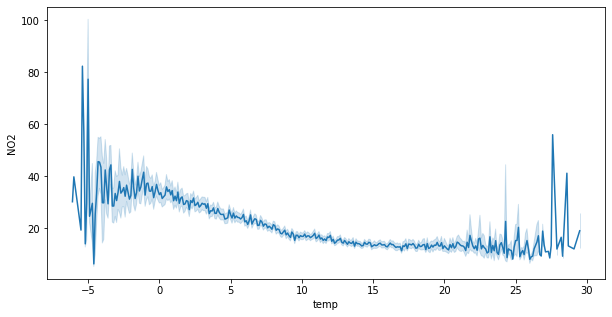

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.lineplot(PollutantsShar.temp, PollutantsShar.NO2)
plt.show()

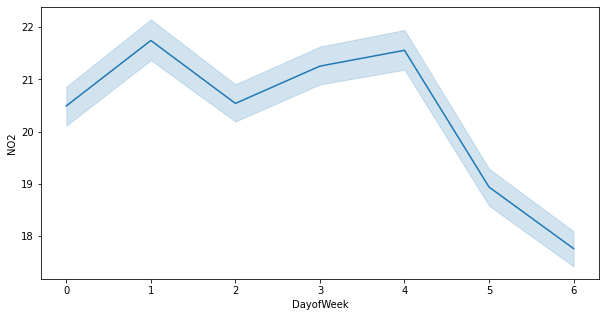

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.lineplot(PollutantsShar.DayofWeek, PollutantsShar.NO2)
plt.show()

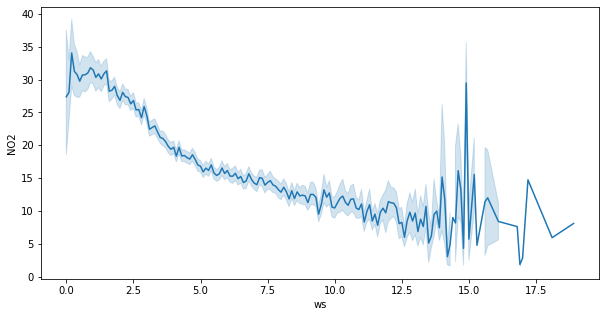

In [ ]:
fig= plt.figure(figsize=(10,5))
sns.lineplot(PollutantsShar.ws, PollutantsShar.NO2)
plt.show()

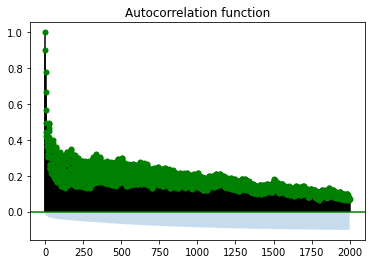

In [ ]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(PollutantsShar.NO2, lags=2000, color='g', title='Autocorrelation function')
plt.show()

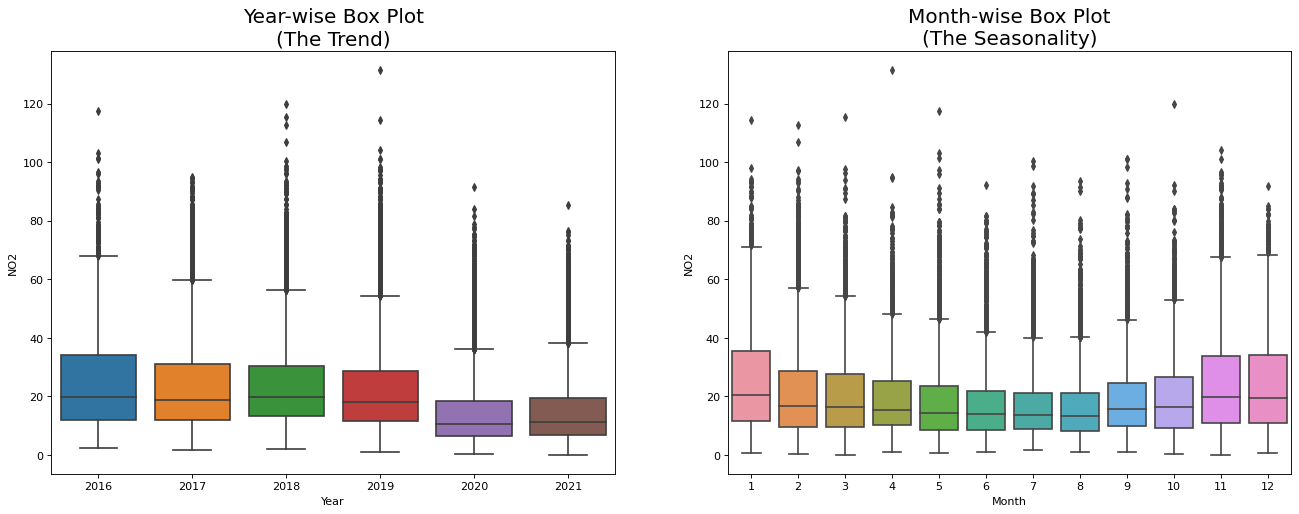

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='NO2', data=PollutantsShar, ax=axes[0])
sns.boxplot(x='Month', y='NO2', data=PollutantsShar)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [ ]:
PollutantsShar.head()

date        O3       NO       NO2  NOXasNO2     wd   ws  \
0 2016-07-21 00:00:00  23.54926  1.05605  23.83039  25.44964  219.3  2.5   
1 2016-07-21 01:00:00  21.88618  0.97123  16.47491  17.96411  220.0  2.4   
2 2016-07-21 02:00:00  18.31055  1.04555  17.09345  18.69660  225.5  2.9   
3 2016-07-21 03:00:00  19.35829  1.39386  17.29187  19.42909  223.2  2.7   
4 2016-07-21 04:00:00  12.32345  3.16814  18.67174  23.52949  209.1  2.3   

   temp                 site  code   latitude  longitude        Ox       NOx  \
0  12.2  Manchester Sharston  MAHG  53.371306  -2.239218  47.37965  24.88644   
1  12.3  Manchester Sharston  MAHG  53.371306  -2.239218  38.36109  17.44614   
2  12.1  Manchester Sharston  MAHG  53.371306  -2.239218  35.40400  18.13900   
3  11.5  Manchester Sharston  MAHG  53.371306  -2.239218  36.65016  18.68573   
4  11.2  Manchester Sharston  MAHG  53.371306  -2.239218  30.99519  21.83988   

   Year  Month  DayofWeek  dayofyear  weekofyear  weekday  quarter  \
0  2016      7          3        203          29        3        3   
1  2016      7          3        203          29        3        3   
2  2016      7          3        203          29        3        3   
3  2016      7          3        203          29        3        3   
4  2016      7          3        203          29        3        3   

   is_month_start  is_month_end  Hour  
0           False         False     0  
1           False         False     1  
2           False         False     2  
3           False         False     3  
4           False         False     4

## **Regression**

### Prepare data

prepare **data**

In [ ]:
PollutantsShar.head(1)

date        O3       NO      NO2  NOXasNO2          wd   ws  \
99 2016-07-25 03:00:00  37.41938  0.25351  9.28662   9.67534  South West  3.8   

    temp                 site  code   latitude  longitude      Ox      NOx  \
99  11.9  Manchester Sharston  MAHG  53.371306  -2.239218  46.706  9.54013   

    Year  Month  Hour  DayofWeek  dayofyear  weekofyear  quarter  Day  \
99  2016      7     3          0        207          30        3   25   

    NO2_moving_avg  NO2_moving_avg2  NO2_moving_avg3  NO2_moving_avg4    0  \
99       13.182067        10.406327        14.325043        16.108666  0.0   

      1    2    3    4    5    6  ohe1  ohe2  ohe3  oh4   o5   o6   o7  
99  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0

In [ ]:
df2.head(1)

date            Cosit  LaneNumber LaneDescription  \
10189 2016-07-29 17:00:00  ="MAC030004369"           1       Channel 1   

       LaneDirection DirectionDescription  Volume  Flags       NO2  \
10189              2            SouthEast     638      0  13.17808   

               wd   ws  temp  longitude   latitude  Year  Month  Hour  \
10189  North West  5.3  17.5  -2.239218  53.371306  2016      7    17   

       DayofWeek  dayofyear  weekofyear  quarter  Day  NO2_moving_avg  \
10189          4        211          30        3   29       15.097113   

       NO2_moving_avg2  NO2_moving_avg3  NO2_moving_avg4    0    1    2    3  \
10189        19.571493        18.569467        17.262717  0.0  0.0  0.0  0.0   

         4    5    6    7  ohe1  ohe2  ohe3  oh4   o5   o6   o7  
10189  0.0  0.0  1.0  0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0

### 1

In [ ]:
X = PollutantsShar.iloc[:, [5,6,7]].values
y = PollutantsShar.iloc[:,3].values
#rfr

[0.36391465 0.33955067 0.34310033 0.33980755 0.36113057 0.35336914
 0.33466007 0.33319469 0.35870243 0.31862216]
0.34460522624556034

Variable:                    2 Importance: 0.46
Variable:                    1 Importance: 0.38
Variable:                    0 Importance: 0.16

#xbg 
0.37769798143493905

[0.28094234 0.26231006 0.27289728 0.25838507 0.27790036 0.26131997
 0.25651    0.26000886 0.27736036 0.2230673 ]
0.26307016069669

Variable:                    2 Importance: 0.41999998688697815
Variable:                    1 Importance: 0.3400000035762787
Variable:                    0 Importance: 0.23999999463558197

In [ ]:
#ohe
X = PollutantsShar.iloc[:, [6,7,26,27,28,29,30,31,32]].values
y = PollutantsShar.iloc[:,3].values

### 2

In [ ]:
X = PollutantsShar.iloc[:, [5,6,7,14,15,16,17,18,19,20,21]].values
y = PollutantsShar.iloc[:,3].values
#rfr

[0.7787863  0.77412976 0.76349648 0.77130759 0.77028037 0.76978018
 0.75607157 0.76421447 0.78460573 0.75049735]
0.7683169793450182

Variable:                    2 Importance: 0.24
Variable:                    1 Importance: 0.2
Variable:                    5 Importance: 0.15
Variable:                    3 Importance: 0.11
Variable:                    0 Importance: 0.09
Variable:                    7 Importance: 0.09
Variable:                    8 Importance: 0.05
Variable:                    6 Importance: 0.04
Variable:                    4 Importance: 0.02
Variable:                    9 Importance: 0.01

#xbg 

[0.80938242 0.80214625 0.78934045 0.79785827 0.80080737 0.7968759
 0.7915885  0.79872945 0.81683854 0.79591268]
0.7999479827529059

Variable:                    3 Importance: 0.1599999964237213
Variable:                    8 Importance: 0.15000000596046448
Variable:                    5 Importance: 0.11999999731779099
Variable:                    7 Importance: 0.11999999731779099
Variable:                    2 Importance: 0.10999999940395355
Variable:                    1 Importance: 0.10000000149011612
Variable:                    9 Importance: 0.09000000357627869
Variable:                    6 Importance: 0.05999999865889549
Variable:                    0 Importance: 0.05000000074505806
Variable:                    4 Importance: 0.05000000074505806



In [ ]:
X = PollutantsShar.iloc[:, [6,7,14,15,16,17,18,19,20,21,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values
y = PollutantsShar.iloc[:,3].values

### 3

In [ ]:
X = df2.iloc[:, [6,9,10,11,14,15,16,17,18,19,20]].values
y = df2.iloc[:,8].values
#rfr

[0.77847763 0.77006625 0.75811052 0.77227014 0.78356594 0.7688552
 0.75682012 0.77124327 0.77942862 0.77960405]
0.771844173698229

Variable:                    3 Importance: 0.29
Variable:                    2 Importance: 0.2
Variable:                    4 Importance: 0.11
Variable:                    8 Importance: 0.09
Variable:                    1 Importance: 0.07
Variable:                    0 Importance: 0.06
Variable:                    9 Importance: 0.06
Variable:                    6 Importance: 0.05
Variable:                    7 Importance: 0.04
Variable:                    5 Importance: 0.02
Variable:                   10 Importance: 0.01




#xbg 

Variable:                    3 Importance: 0.18000000715255737
Variable:                    4 Importance: 0.17000000178813934
Variable:                    9 Importance: 0.14000000059604645
Variable:                    8 Importance: 0.11999999731779099
Variable:                    2 Importance: 0.10000000149011612
Variable:                    6 Importance: 0.05999999865889549
Variable:                    7 Importance: 0.05999999865889549
Variable:                    1 Importance: 0.05000000074505806
Variable:                    5 Importance: 0.03999999910593033
Variable:                   10 Importance: 0.03999999910593033
Variable:                    0 Importance: 0.029999999329447746

In [ ]:
#ohe
X = df2.iloc[:, [6,10,11,14,15,16,17,18,19,20,21,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]].values
y = df2.iloc[:,8].values

### 4

In [ ]:
X = PollutantsShar.iloc[:, [5,6,7,14,15,16,17,18,19,20,21]].values
y = PollutantsShar.iloc[:,22].values
#rfregressor score = 0.8335274241077593
#XGBoost score = 0.8733839604371901
#reg mse = 34.2384
#reg rmse = 5.8514
#reg r2 = 0.8335
#reg mae = 3.9801

MSE: 36.0196
RMSE: 6.0016
MAE: 4.0841
R2: 0.8281
0.9619420327105797

[0.82973868 0.80826943 0.80840186 0.81660493 0.81987498 0.82491322
 0.80677981 0.81479164 0.82938143 0.79691064]
0.815566661442325

Variable:                    2 Importance: 0.24
Variable:                    1 Importance: 0.19
Variable:                    5 Importance: 0.14
Variable:                    3 Importance: 0.12
Variable:                    7 Importance: 0.09
Variable:                    0 Importance: 0.08
Variable:                    8 Importance: 0.05
Variable:                    6 Importance: 0.04
Variable:                    4 Importance: 0.02
Variable:                    9 Importance: 0.01

#xbg mse = 26.0411
#xgb rmse = 5.1031
#xgb r2 = 0.8734
#xgb mae = 3.4326
#dependant variable is now the rolling mean(3)

MSE: 27.0540
RMSE: 5.2013
MAE: 3.5124
R2: 0.8709
0.9998179968340968

Variable:                    3 Importance: 0.17000000178813934
Variable:                    8 Importance: 0.15000000596046448
Variable:                    7 Importance: 0.12999999523162842
Variable:                    2 Importance: 0.10999999940395355
Variable:                    5 Importance: 0.10999999940395355
Variable:                    1 Importance: 0.09000000357627869
Variable:                    9 Importance: 0.07999999821186066
Variable:                    6 Importance: 0.05999999865889549
Variable:                    0 Importance: 0.05000000074505806
Variable:                    4 Importance: 0.05000000074505806

In [ ]:
X = PollutantsShar.iloc[:, [6,7,14,15,16,17,18,19,20,21,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values
y = PollutantsShar.iloc[:,22].values

### 5

In [ ]:
X = PollutantsShar.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsShar.iloc[:,23].values
#dependant variable is now the rolling mean(25)


Variable:                    2 Importance: 0.25
Variable:                    3 Importance: 0.2
Variable:                    7 Importance: 0.16
Variable:                    1 Importance: 0.09
Variable:                    8 Importance: 0.08
Variable:                    0 Importance: 0.07
Variable:                    6 Importance: 0.07
Variable:                    4 Importance: 0.04
Variable:                    5 Importance: 0.03
Variable:                    9 Importance: 0.01

[0.93193684 0.93077776 0.92678659 0.93161557 0.93289028 0.93070828
 0.93515671 0.9336442  0.93421681 0.927741  ]
0.9315474025201714

#xgb


Variable:                    9 Importance: 0.41999998688697815
Variable:                    3 Importance: 0.15000000596046448
Variable:                    8 Importance: 0.10999999940395355
Variable:                    7 Importance: 0.10000000149011612
Variable:                    2 Importance: 0.05999999865889549
Variable:                    4 Importance: 0.05000000074505806
Variable:                    6 Importance: 0.05000000074505806
Variable:                    0 Importance: 0.019999999552965164
Variable:                    1 Importance: 0.019999999552965164
Variable:                    5 Importance: 0.009999999776482582


0.9890059805115405

In [ ]:
X = PollutantsShar.iloc[:, [6,7,14,15,16,17,18,19,20,21,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values
y = PollutantsShar.iloc[:,23].values

### 6

In [ ]:
X = PollutantsShar.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsShar.iloc[:,24].values
#rfr

Variable:                    3 Importance: 0.24
Variable:                    2 Importance: 0.23
Variable:                    7 Importance: 0.18
Variable:                    8 Importance: 0.09
Variable:                    6 Importance: 0.07
Variable:                    0 Importance: 0.06
Variable:                    1 Importance: 0.06
Variable:                    4 Importance: 0.04
Variable:                    5 Importance: 0.02
Variable:                    9 Importance: 0.01

[0.95911567 0.95746886 0.95838747 0.95990266 0.95783099 0.95779027
 0.96177857 0.95728158 0.9565886  0.95403067]
0.9580175361184395

#xbg 

Variable:                    9 Importance: 0.36000001430511475
Variable:                    3 Importance: 0.1899999976158142
Variable:                    8 Importance: 0.12999999523162842
Variable:                    7 Importance: 0.10000000149011612
Variable:                    2 Importance: 0.07000000029802322
Variable:                    4 Importance: 0.05999999865889549
Variable:                    6 Importance: 0.05000000074505806
Variable:                    1 Importance: 0.019999999552965164
Variable:                    0 Importance: 0.009999999776482582
Variable:                    5 Importance: 0.009999999776482582

In [ ]:
X = PollutantsShar.iloc[:, [6,7,14,15,16,17,18,19,20,21,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values
y = PollutantsShar.iloc[:,24].values

### 7

In [ ]:
X = PollutantsShar.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsShar.iloc[:,25].values
#rfregressor score = 0.9810301755528936
#XGBoost score = 0.9892746495744192
#reg mse = 1.5318
#reg rmse = 1.2377
#reg r2 = 0.9810
#reg mae = 0.7526

MSE: 1.7093
RMSE: 1.3074
MAE: 0.7976
R2: 0.9783
0.9965003812598574

[0.9729165  0.97511034 0.97383334 0.97361309 0.97480971 0.97349862
 0.97619892 0.97470121 0.97272132 0.97195601]
0.973935905876084

Variable:                    3 Importance: 0.28
Variable:                    2 Importance: 0.23
Variable:                    7 Importance: 0.18
Variable:                    8 Importance: 0.09
Variable:                    0 Importance: 0.05
Variable:                    1 Importance: 0.05
Variable:                    6 Importance: 0.05
Variable:                    4 Importance: 0.04
Variable:                    5 Importance: 0.02
Variable:                    9 Importance: 0.01

#xbg mse = 0.8661
#xgb rmse = 0.9306
#xgb r2 = 0.9893
#xgb mae = 0.6131
#dependant variable is now the rolling mean(100)

MSE: 0.9795
RMSE: 0.9897
MAE: 0.6419
R2: 0.9875
0.9999950996360937

Variable:                    9 Importance: 0.4000000059604645
Variable:                    3 Importance: 0.20999999344348907
Variable:                    8 Importance: 0.11999999731779099
Variable:                    7 Importance: 0.10000000149011612
Variable:                    2 Importance: 0.05999999865889549
Variable:                    4 Importance: 0.05000000074505806
Variable:                    6 Importance: 0.03999999910593033
Variable:                    0 Importance: 0.009999999776482582
Variable:                    1 Importance: 0.009999999776482582
Variable:                    5 Importance: 0.009999999776482582

In [ ]:
X = PollutantsShar.iloc[:, [6,7,14,15,16,17,18,19,20,21,26,27,28,29,30,31,32,33,34,35,36,37,38,39]].values
y = PollutantsShar.iloc[:,25].values

In [ ]:
X = PollutantsShar.iloc[:, [5,6,7,14,15,16,17,18,19,20]].values
y = PollutantsShar.iloc[:,25].values

### 8

In [ ]:
#MA25
X = df2.iloc[:, [6,9,10,11,14,15,16,17,18,19,20]].values
y = df2.iloc[:,23].values

MSE: 8.5884
RMSE: 2.9306
MAE: 1.9853
R2: 0.9348
0.9889101046478479

[0.93611436 0.93281556 0.92563689 0.92981992 0.92393533 0.92307025
 0.92466425 0.92911367 0.92312637 0.92765921]
0.9275955802348156

Variable:                    3 Importance: 0.28
Variable:                    4 Importance: 0.19
Variable:                    8 Importance: 0.16
Variable:                    9 Importance: 0.09
Variable:                    2 Importance: 0.07
Variable:                    1 Importance: 0.06
Variable:                    7 Importance: 0.06
Variable:                    5 Importance: 0.04
Variable:                    0 Importance: 0.03
Variable:                    6 Importance: 0.02
Variable:                   10 Importance: 0.01

#xgb

MSE: 6.0413
RMSE: 2.4579
MAE: 1.7091
R2: 0.9541
0.9999990432200357

Variable:                    4 Importance: 0.23999999463558197
Variable:                    3 Importance: 0.15000000596046448
Variable:                    8 Importance: 0.15000000596046448
Variable:                    9 Importance: 0.15000000596046448
Variable:                   10 Importance: 0.10000000149011612
Variable:                    5 Importance: 0.07000000029802322
Variable:                    7 Importance: 0.05999999865889549
Variable:                    1 Importance: 0.029999999329447746
Variable:                    2 Importance: 0.029999999329447746
Variable:                    0 Importance: 0.009999999776482582
Variable:                    6 Importance: 0.009999999776482582

In [ ]:
X = df2.iloc[:, [6,9,10,11,14,15,16,17,18,19,20]].values
y = df2.iloc[:,23].values

### split

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(X))

StandardScaler()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=42)

### Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
#vcomb1
rfregressor = RandomForestRegressor(n_estimators = 200,max_depth = 10, 
                                  max_features= 'sqrt', min_samples_split = 5, min_samples_leaf= 2,
                                  bootstrap = True, random_state = 42)
rfregressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
rfregressor = RandomForestRegressor(n_estimators = 400,max_depth = 60, 
                                  max_features= 'sqrt', min_samples_split = 10, min_samples_leaf= 1,
                                  bootstrap = False, random_state = 42)
rfregressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      min_samples_split=10, n_estimators=400, random_state=42)

In [ ]:
# Prediction
predictr=rfregressor.predict(X_test)
predictr

array([12.83964872, 10.39937315, 15.64428215, ..., 29.71290363,
       40.61100517, 17.89299283])

In [ ]:
print("MSE: %.4f" % mean_squared_error(y_test, predictr))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test, predictr)))
print("MAE: %.4f" % mean_absolute_error(y_test, predictr))
print("R2: %.4f" % r2_score(y_test, predictr))
print(rfregressor.score(X_train, y_train))

MSE: 1.2489
RMSE: 1.1176
MAE: 0.6816
R2: 0.9844
0.9966903583039964


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfregressor, X_train, y_train, 
                         scoring='r2', cv=10,n_jobs=-1)
print(scores)
print(scores.mean())

[0.98443154 0.98396356 0.9825966  0.98326605 0.98323811 0.98393736
 0.98368591 0.9840223  0.98505762 0.98281774]
0.9837016788802041


In [ ]:
Xdf = pd.DataFrame(X)
Xf = list(Xdf.columns)
# Get numerical feature importances
importances = list(rfregressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(Xf, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                    1 Importance: 0.23
Variable:                    0 Importance: 0.21
Variable:                    4 Importance: 0.14
Variable:                    2 Importance: 0.12
Variable:                    6 Importance: 0.1
Variable:                    7 Importance: 0.07
Variable:                    3 Importance: 0.03
Variable:                    5 Importance: 0.02
Variable:                    8 Importance: 0.01
Variable:                   10 Importance: 0.01
Variable:                   11 Importance: 0.01
Variable:                   13 Importance: 0.01
Variable:                   14 Importance: 0.01
Variable:                   16 Importance: 0.01
Variable:                   17 Importance: 0.01
Variable:                   18 Importance: 0.01
Variable:                   19 Importance: 0.01
Variable:                   20 Importance: 0.01
Variable:                   21 Importance: 0.01
Variable:                   22 Importance: 0.01
Variable:                    9 Importance

### RF plots

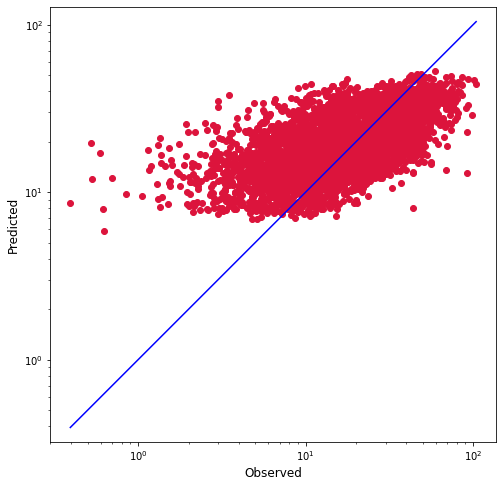

In [ ]:
#vcomb1
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

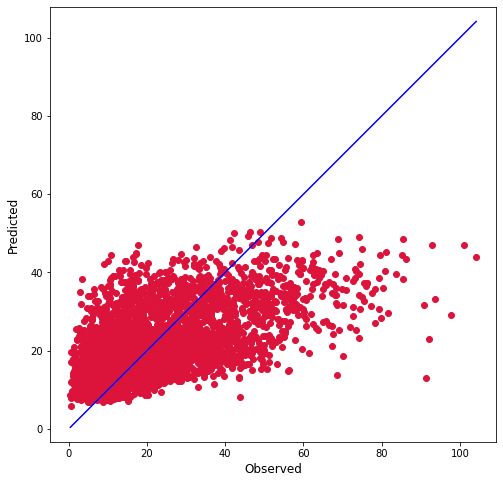

In [ ]:
#vcomb1
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')


p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

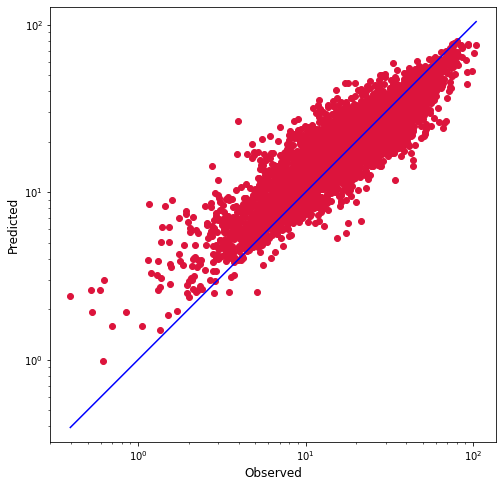

In [ ]:
#vcomb2
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

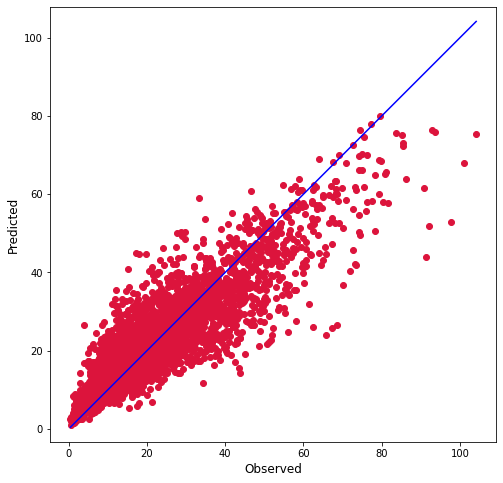

In [ ]:
#vcomb2
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

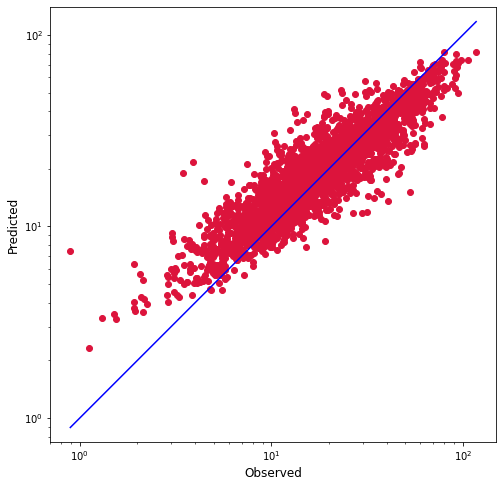

In [ ]:
#vcomb3
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

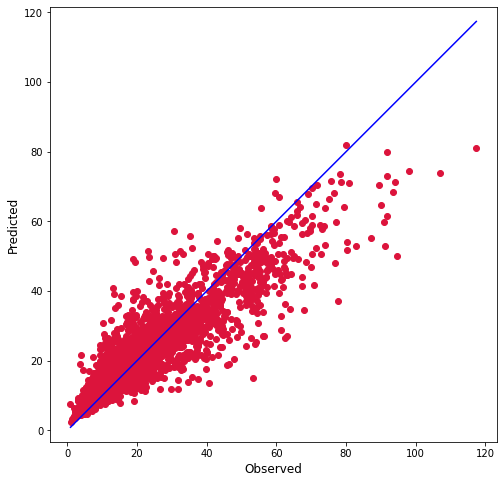

In [ ]:
#vcomb3
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

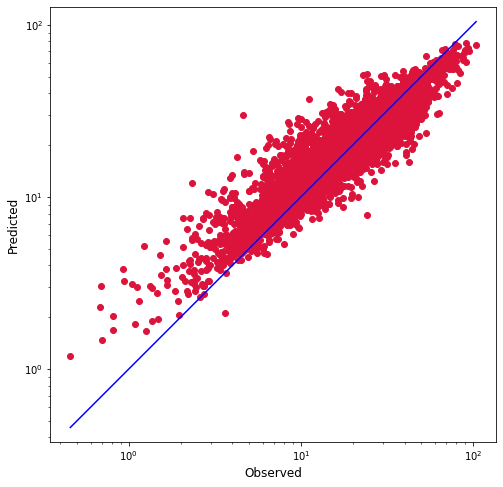

In [ ]:
#vcomb4
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

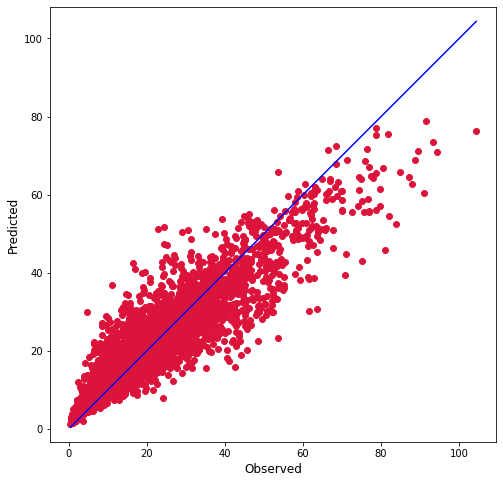

In [ ]:
#vcomb4
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

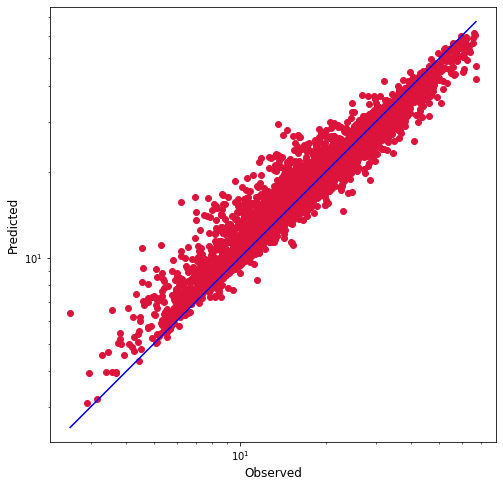

In [ ]:
#vcomb5
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

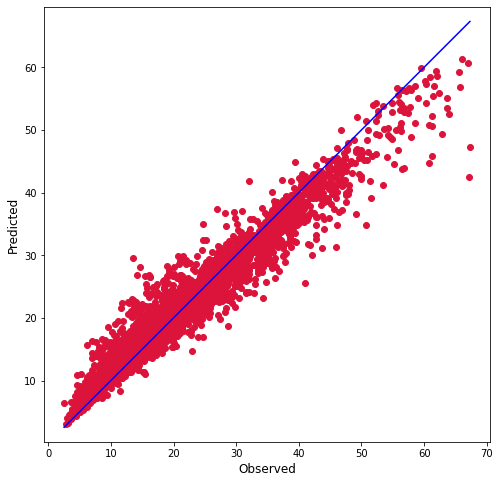

In [ ]:
#vcomb5
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

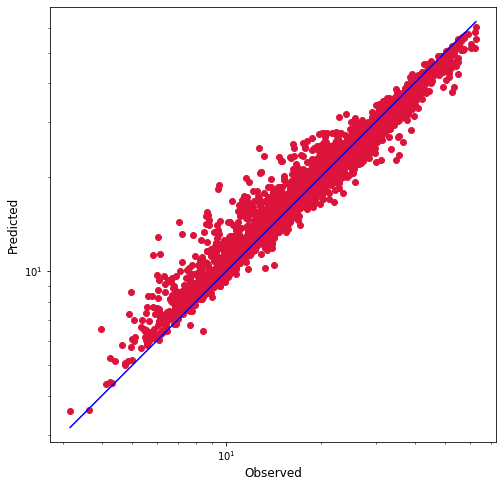

In [ ]:
#vcomb6
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

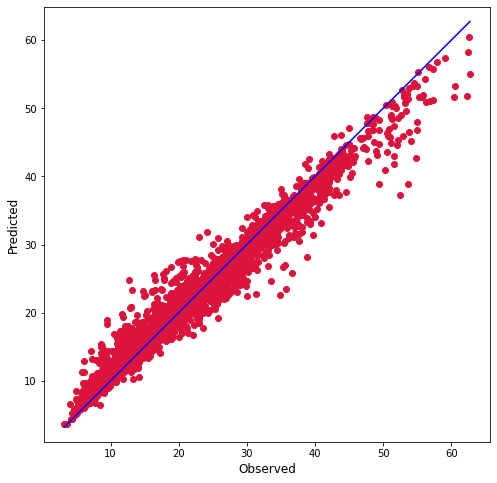

In [ ]:
#vcomb6
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

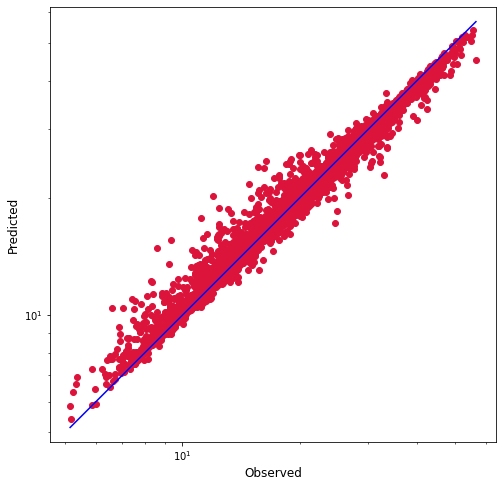

In [ ]:
#vcomb7
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

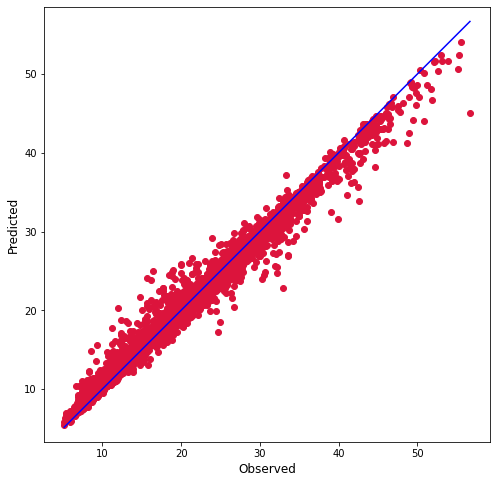

In [ ]:
#vcomb7
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')


p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

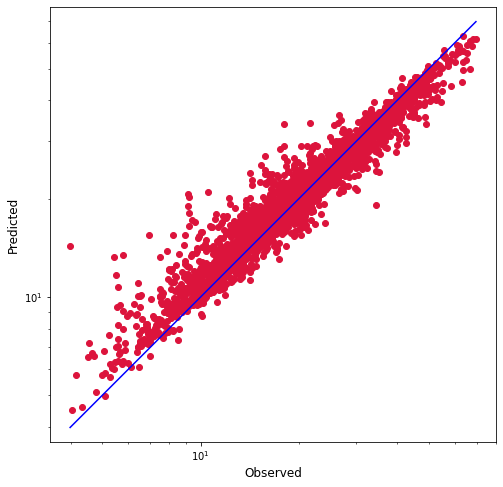

In [ ]:
#vcomb8
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

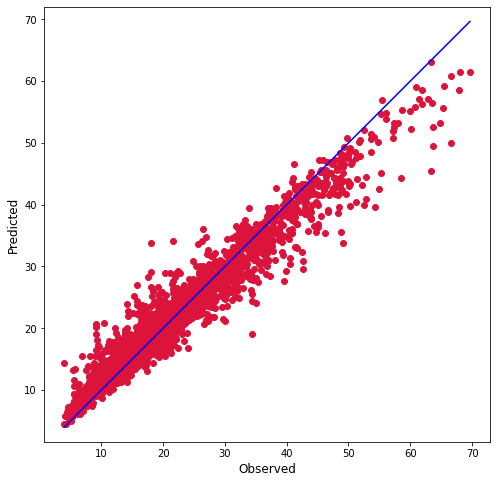

In [ ]:
#vcomb8
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictr, c='crimson')

p1 = max(max(predictr), max(y_test))
p2 = min(min(predictr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

### XGBoost

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2000, stop = 20000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# 
learning_rate = [0.01,0.03,0.09,0.1,0.3]
# 
colsample_bytree = [0.3,0.7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'colsample_bytree': colsample_bytree}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb = xgb.XGBRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, 
                               n_iter = 10, cv = 5, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
xgb_random.fit(X_train, y_train)

In [ ]:
xgb_random.best_params_

In [ ]:
#vcomb1
xgbr = xgb.XGBRegressor(n_estimators=4000, max_depth=10,
                       learning_rate=0.03,
                       colsample_bytree = 0.3,
                       random_state=42)
xgbr.fit(X_train,y_train)

[15:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.3, learning_rate=0.03, max_depth=10,
             n_estimators=4000, random_state=42)

In [ ]:
xgbr = xgb.XGBRegressor(n_estimators=10000, max_depth=9,
                       learning_rate=0.03,
                       colsample_bytree = 0.7,
                       random_state=42)
xgbr.fit(X_train,y_train)

[18:27:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, learning_rate=0.03, max_depth=9,
             n_estimators=10000, random_state=42)

In [ ]:
# Prediction
predictx=xgbr.predict(X_test)
predictx

array([12.308987, 10.041762, 15.814687, ..., 29.943684, 41.716858,
       17.864346], dtype=float32)

In [ ]:
print("MSE: %.4f" % mean_squared_error(y_test, predictx))
print("RMSE: %.4f" % math.sqrt(mean_squared_error(y_test, predictx)))
print("MAE: %.4f" % mean_absolute_error(y_test, predictx))
print("R2: %.4f" % r2_score(y_test, predictx))
#print(xgbr.score(X_train, y_train))

MSE: 0.3265
RMSE: 0.5714
MAE: 0.3535
R2: 0.9959


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbr, X_train, y_train, 
                         scoring='r2', cv=10,n_jobs=-1)
print(scores)
print(scores.mean())

[0.80938242 0.80214625 0.78934045 0.79785827 0.80080737 0.7968759
 0.7915885  0.79872945 0.81683854 0.79591268]
0.7999479827529059


In [ ]:
Xdf = pd.DataFrame(X)
Xf = list(Xdf.columns)
Xdf = pd.DataFrame(X)
Xf = list(Xdf.columns)
# Get numerical feature importances
importances = list(xgbr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(Xf, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                    4 Importance: 0.23999999463558197
Variable:                    3 Importance: 0.15000000596046448
Variable:                    8 Importance: 0.15000000596046448
Variable:                    9 Importance: 0.15000000596046448
Variable:                   10 Importance: 0.10000000149011612
Variable:                    5 Importance: 0.07000000029802322
Variable:                    7 Importance: 0.05999999865889549
Variable:                    1 Importance: 0.029999999329447746
Variable:                    2 Importance: 0.029999999329447746
Variable:                    0 Importance: 0.009999999776482582
Variable:                    6 Importance: 0.009999999776482582


### xgb plots

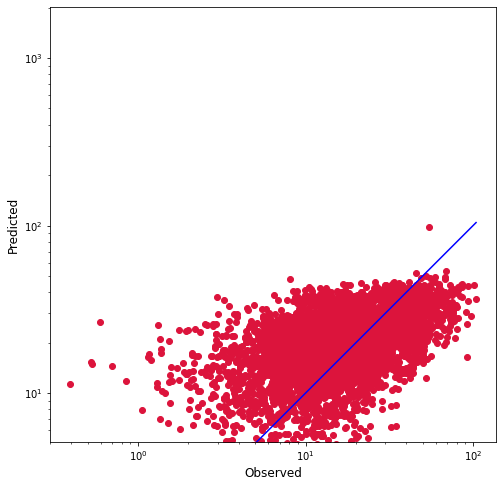

In [ ]:
#vcomb1
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

plt.xscale('log')
plt.yscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

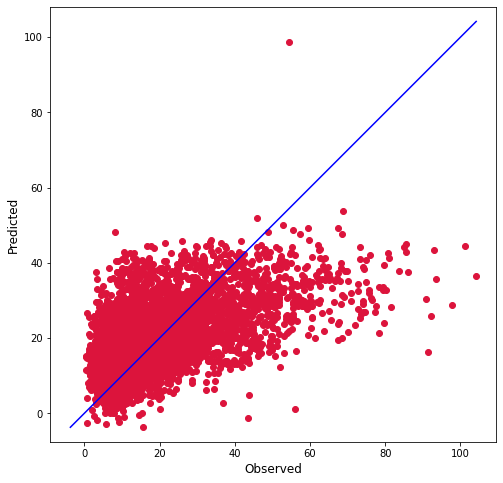

In [ ]:
#vcomb1
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')


p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

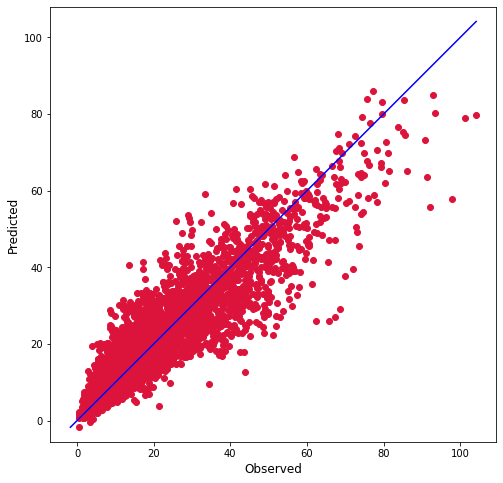

In [ ]:
#vcomb2
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')


p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

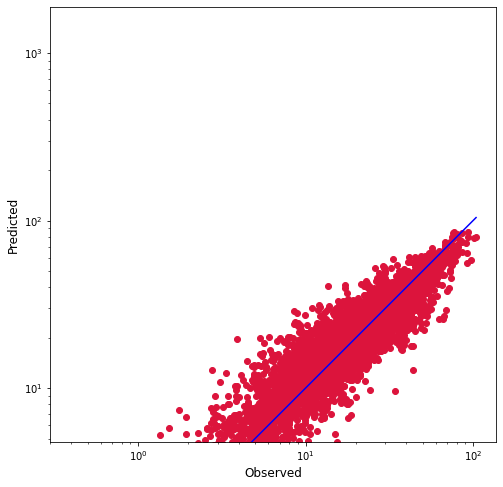

In [ ]:
#vcomb2
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

plt.xscale('log')
plt.yscale('log')
p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

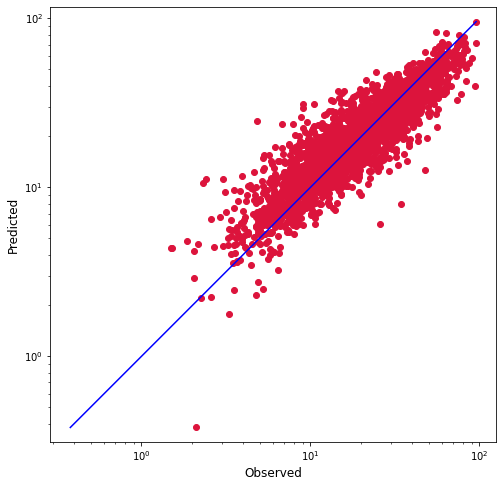

In [ ]:
#vcomb3
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.xscale('log')
plt.yscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

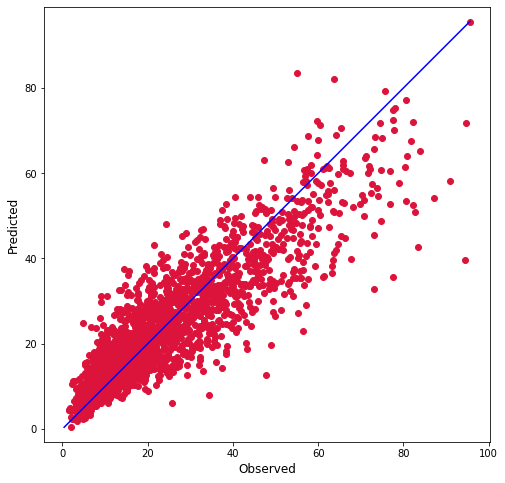

In [ ]:
#vcomb3
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

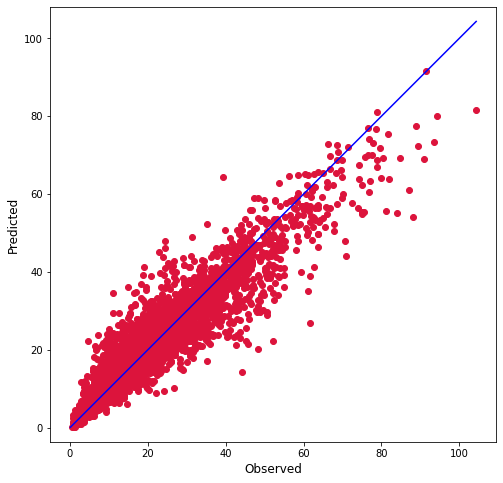

In [ ]:
#vcomb4
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')


p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

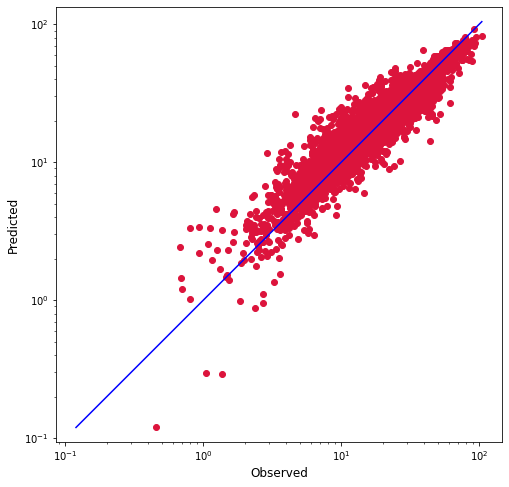

In [ ]:
#vcomb4
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.xscale('log')
plt.yscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

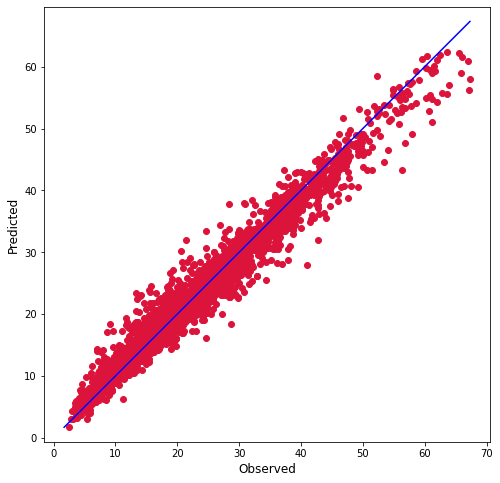

In [ ]:
#vcomb5
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

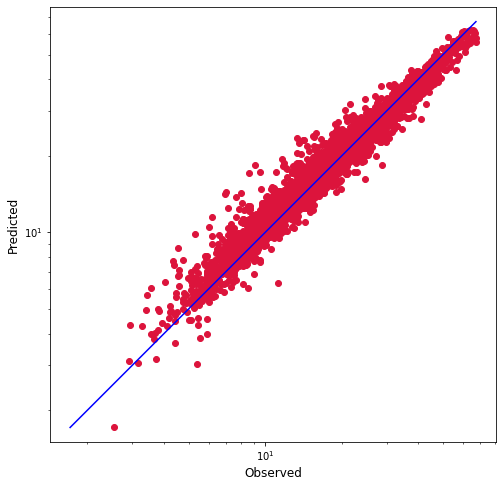

In [ ]:
#vcomb5
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.xscale('log')
plt.yscale('log')
p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

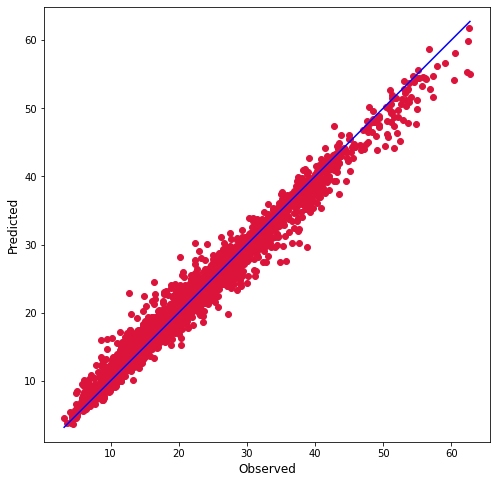

In [ ]:
#vcomb6
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')


p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

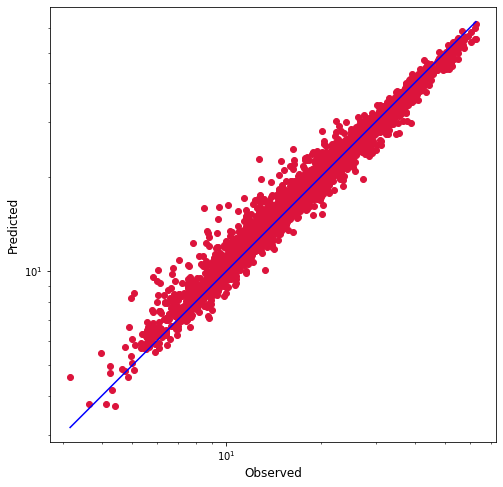

In [ ]:
#vcomb6
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.xscale('log')
plt.yscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

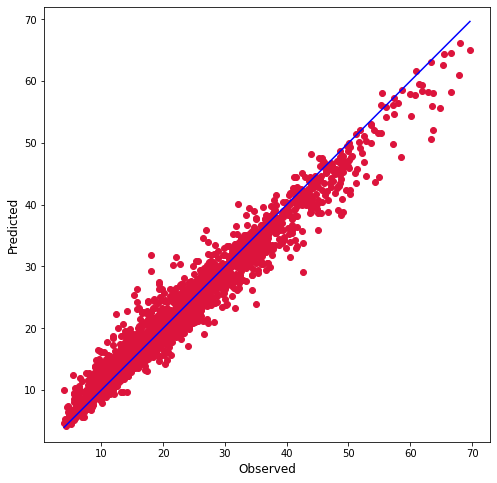

In [ ]:
#vcomb7
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')


p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

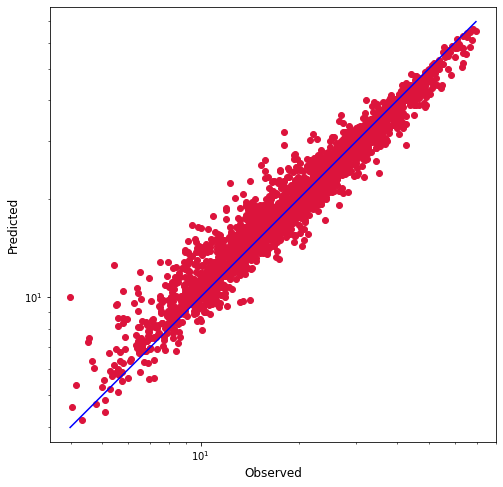

In [ ]:
#vcomb7
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.xscale('log')
plt.yscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

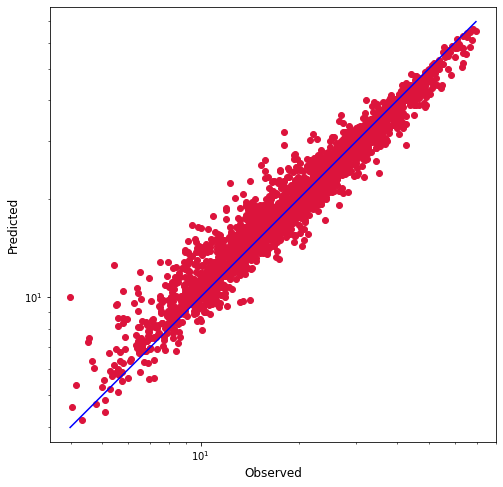

In [ ]:
#vcomb8
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')
plt.xscale('log')
plt.yscale('log')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

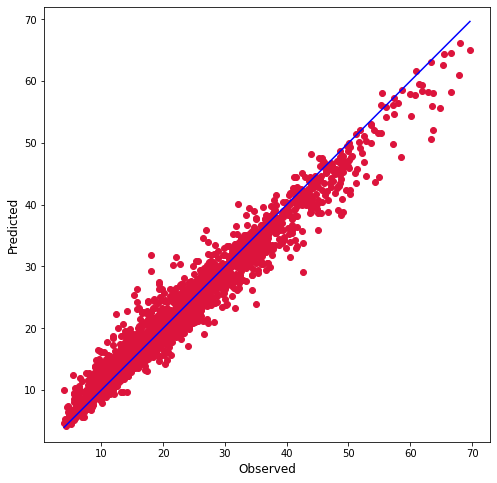

In [ ]:
#vcomb8
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictx, c='crimson')

p1 = max(max(predictx), max(y_test))
p2 = min(min(predictx), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.axis('equal')
plt.show()

# Picc&Shar **EDA**

Text(0, 0.5, 'NO2')

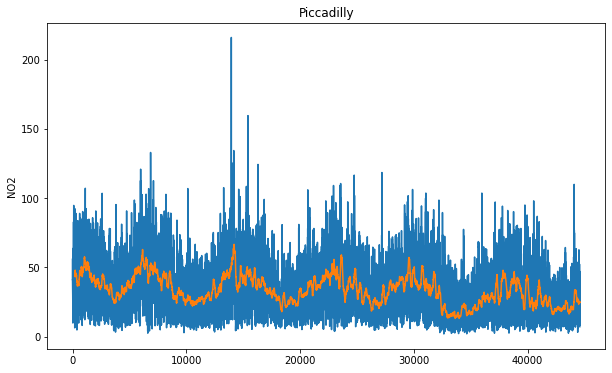

In [ ]:
fig= plt.figure(figsize=(10,5))
PollutantsPicc['NO2'].plot(figsize=(10,6))
PollutantsPicc['NO2'].rolling(window=200).mean().plot()
plt.title('Piccadilly')
plt.ylabel('NO2')

Text(0.5, 1.0, 'Sharston')

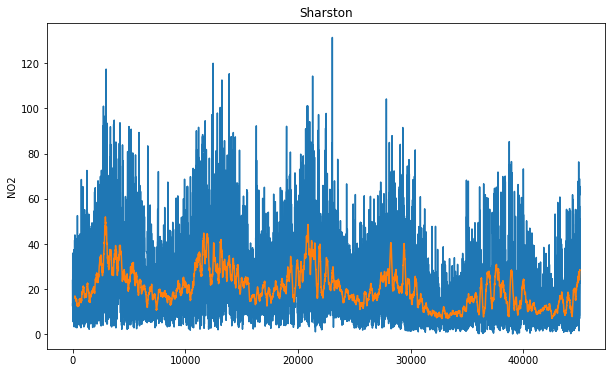

In [ ]:
fig= plt.figure(figsize=(10,5))
PollutantsShar['NO2'].plot(figsize=(10,6))
PollutantsShar['NO2'].rolling(window=200).mean().plot()
plt.ylabel('NO2')
plt.title('Sharston')

Text(1.0, 1.0, 'Piccadilly')

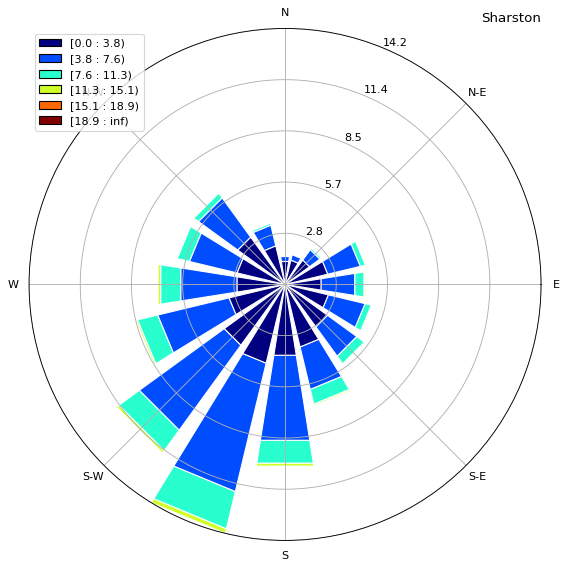

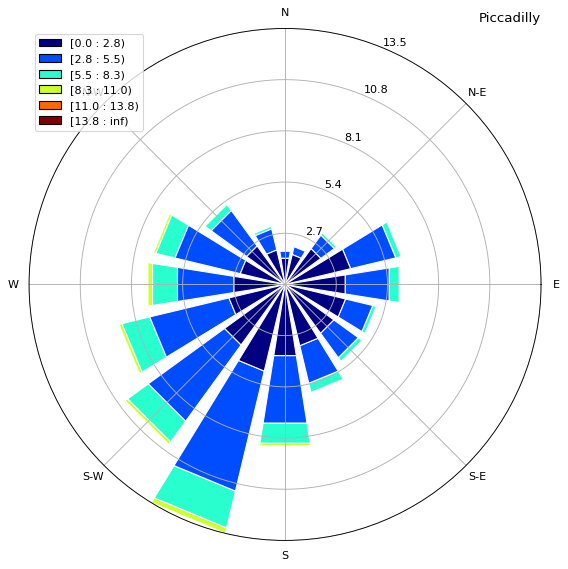

In [ ]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
ax = WindroseAxes.from_ax()
ax.bar(PollutantsShar.wd, PollutantsShar.ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(loc='upper left')
ax.set_title('Sharston', loc='right')
ax = WindroseAxes.from_ax()
ax.bar(PollutantsPicc.wd, PollutantsPicc.ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(loc='upper left')
ax.set_title('Piccadilly', loc='right')

Text(1.0, 1.0, 'Piccadilly')

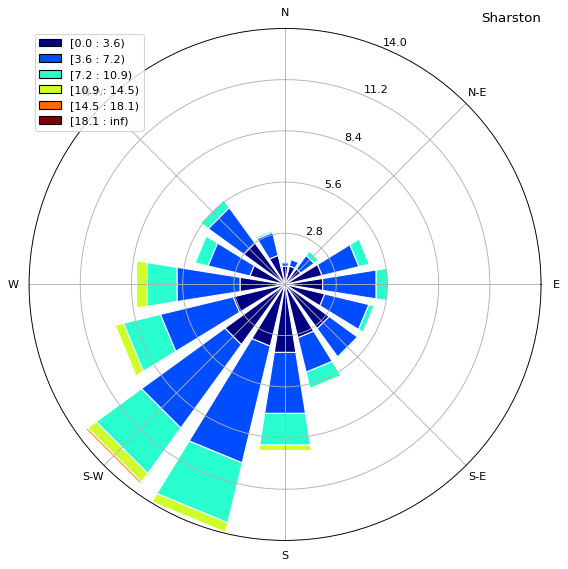

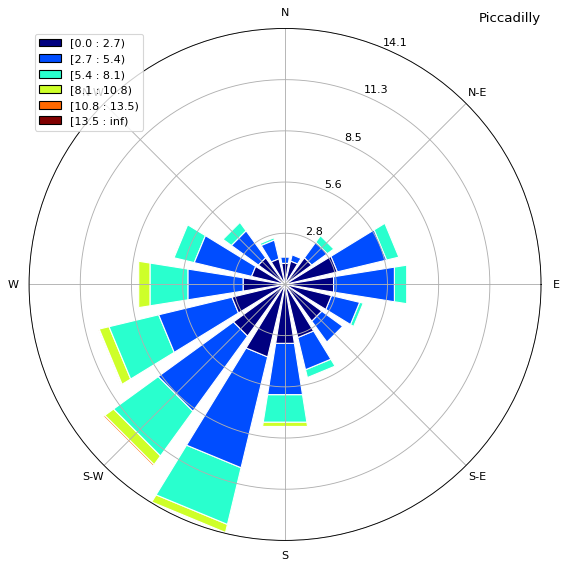

In [ ]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
ax = WindroseAxes.from_ax()
ax.bar(PollutantsShar20.wd, PollutantsShar20.ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(loc='upper left')
ax.set_title('Sharston', loc='right')
ax = WindroseAxes.from_ax()
ax.bar(PollutantsPicc20.wd, PollutantsPicc20.ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(loc='upper left')
ax.set_title('Piccadilly', loc='right')

Text(1.0, 1.0, 'Sharston')

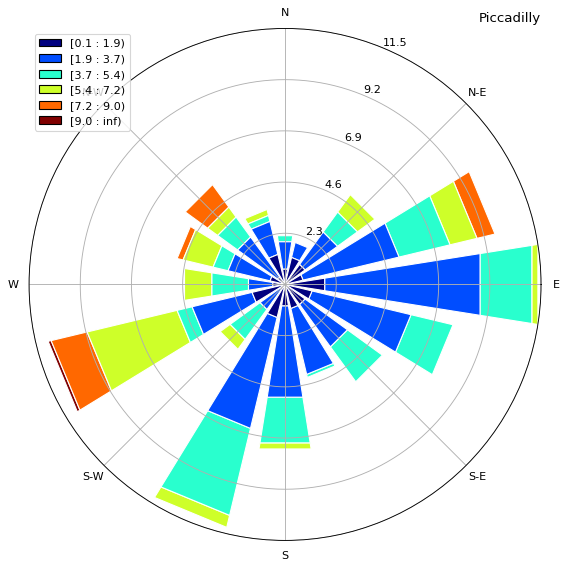

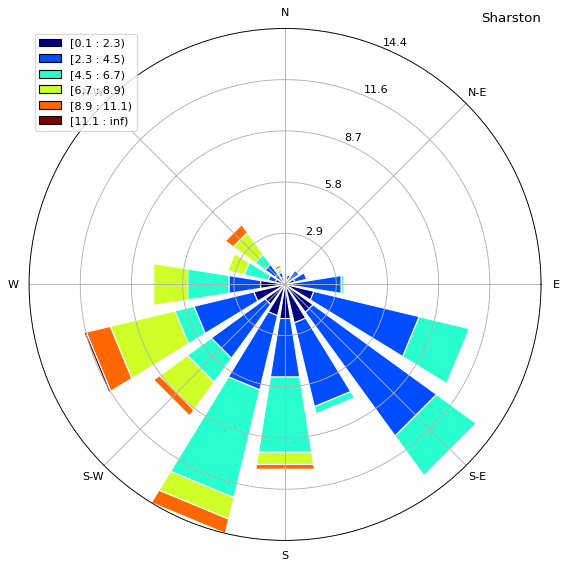

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(PollutantsPicc20mn6.wd, PollutantsPicc20mn6.ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(loc='upper left')
ax.set_title('Piccadilly', loc='right')
ax = WindroseAxes.from_ax()
ax.bar(PollutantsShar20mn6.wd, PollutantsShar20mn6.ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(loc='upper left')
ax.set_title('Sharston', loc='right')

Text(1.0, 1.0, 'Sharston')

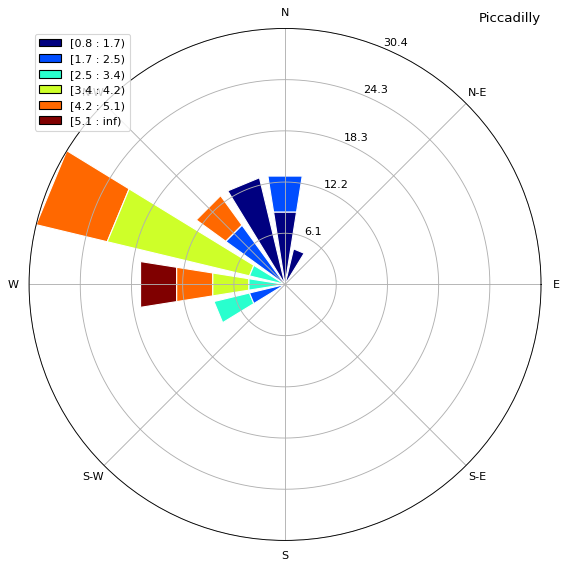

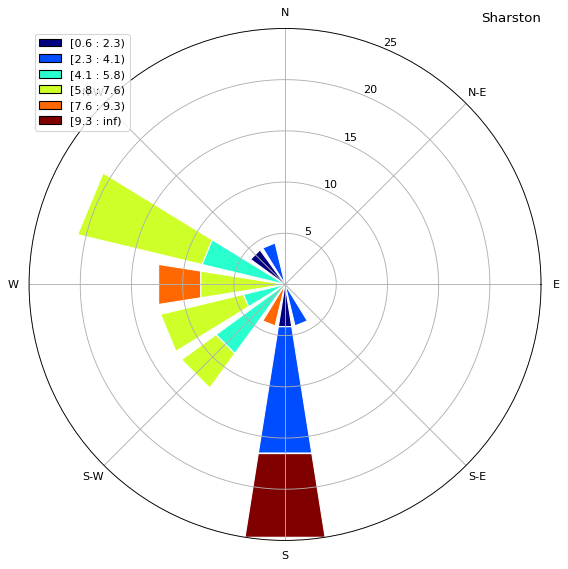

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(PollutantsPicc20mn6dy4.wd, PollutantsPicc20mn6dy4.ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(loc='upper left')
ax.set_title('Piccadilly', loc='right')
ax = WindroseAxes.from_ax()
ax.bar(PollutantsShar20mn6dy4.wd, PollutantsShar20mn6dy4.ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(loc='upper left')
ax.set_title('Sharston', loc='right')

Text(1.0, 1.0, 'Sharston')

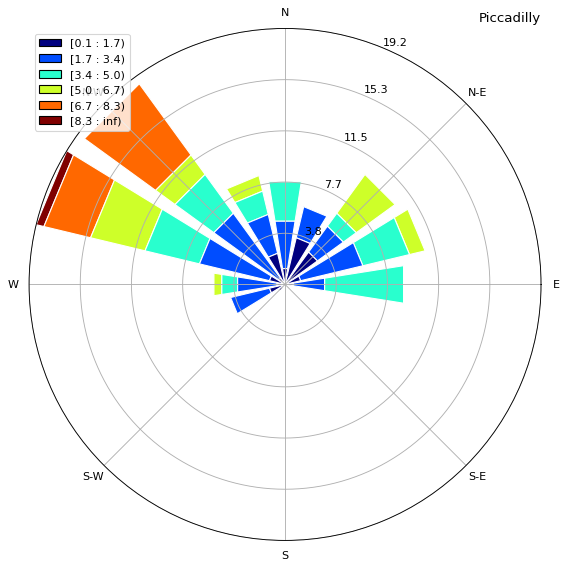

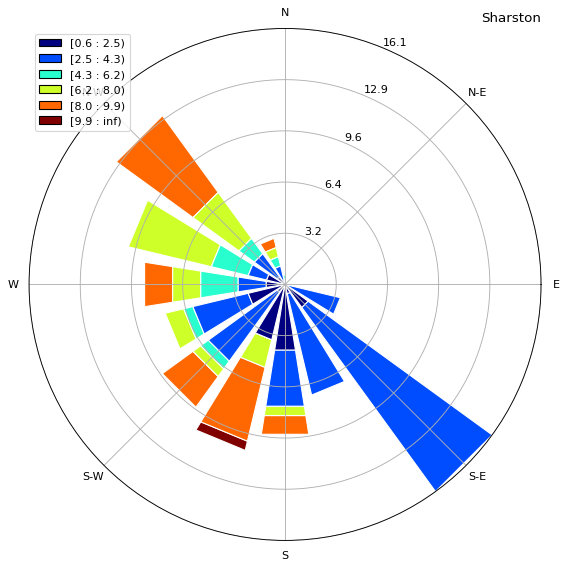

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(PollutantsPicc20mn6w23.wd, PollutantsPicc20mn6w23.ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(loc='upper left')
ax.set_title('Piccadilly', loc='right')
ax = WindroseAxes.from_ax()
ax.bar(PollutantsShar20mn6w23.wd, PollutantsShar20mn6w23.ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(loc='upper left')
ax.set_title('Sharston', loc='right')

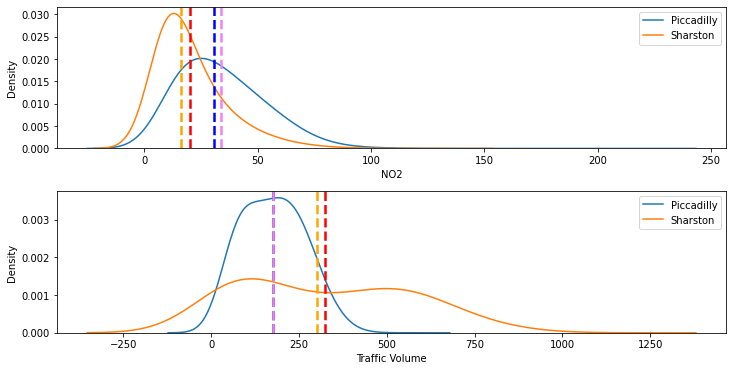

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12,6))
sb.kdeplot(PollutantsPicc.NO2 , bw = 0.5, ax=axes[0], label='Piccadilly')
sb.kdeplot(df.Volume , bw = 0.5, ax=axes[1], label='Piccadilly')
sb.kdeplot(PollutantsShar.NO2 , bw = 0.5, ax=axes[0], label='Sharston')
sb.kdeplot(df2.Volume , bw = 0.5, ax=axes[1], label='Sharston')
# labels
axes[0].set_xlabel('NO2')
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[1].set_xlabel('Traffic Volume')
axes[0].axvline(x=PollutantsPicc.NO2.median(),
            color='blue',
            ls='--', 
            lw=2.5)
axes[0].axvline(x=PollutantsShar.NO2.median(),
            color='orange',
            ls='--', 
            lw=2.5)

axes[0].axvline(x=PollutantsPicc.NO2.mean(),
            color='violet',
            ls='--', 
            lw=2.5)
axes[0].axvline(x=PollutantsShar.NO2.mean(),
            color='red',
            ls='--', 
            lw=2.5)


axes[1].axvline(x=df.Volume.median(),
            color='blue',
            ls='--', 
            lw=2.5)
axes[1].axvline(x=df2.Volume.median(),
            color='orange',
            ls='--', 
            lw=2.5)

axes[1].axvline(x=df.Volume.mean(),
            color='violet',
            ls='--', 
            lw=2.5)
axes[1].axvline(x=df2.Volume.mean(),
            color='red',
            ls='--', 
            lw=2.5)
plt.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:
print(PollutantsPicc.NO2.median())
print(PollutantsPicc.NO2.mean())
print(df.Volume.mean())
print(df.Volume.median())

30.824215000000002
33.774706101044984
175.92726929252856
175.0


In [ ]:
print(PollutantsShar.NO2.median())
print(PollutantsShar.NO2.mean())
print(df2.Volume.mean())
print(df2.Volume.median())

15.955245
20.306279747468018
324.6907653565395
302.0


In [ ]:
PollutantsShar.NO2.describe()

count    45024.000000
mean        20.306280
std         14.957546
min          0.146140
25%          9.601845
50%         15.955245
75%         26.784598
max        131.411910
Name: NO2, dtype: float64

In [ ]:
print(PollutantsPicc.NO2.mode())
print(df.Volume.mode())

0    17.2125
dtype: float64
0    80
dtype: int64


In [ ]:
print(PollutantsShar.NO2.mode())
print(df2.Volume.mode())

0    17.78625
dtype: float64
0    26
dtype: int64


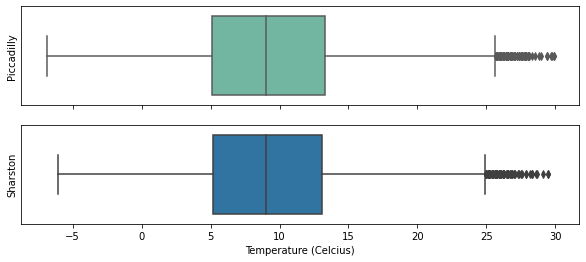

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,4), sharex=True)
sns.boxplot(y=PollutantsPicc.site, x=PollutantsPicc.temp, ax=axes[0],palette="Set2")
sns.boxplot(y=PollutantsShar.site, x=PollutantsShar.temp, ax=axes[1])
axes[0].set_xlabel('')
axes[0].set_ylabel('Piccadilly')
axes[1].set_ylabel('Sharston')
# Hide X and Y axes label marks
axes[0].yaxis.set_tick_params(labelleft=False)
axes[1].yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
axes[0].set_yticks([])
axes[1].set_yticks([])
axes[1].set_xlabel('Temperature (Celcius)')
axes[0].label_outer()
axes[1].label_outer()
plt.show()

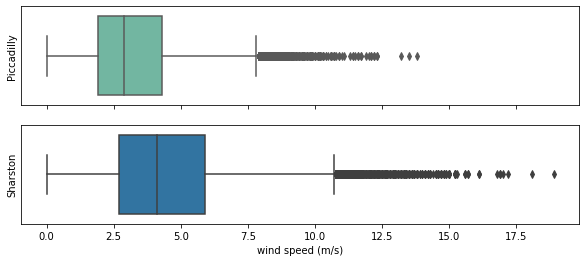

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,4), sharex=True)
sns.boxplot(y=PollutantsPicc.site, x=PollutantsPicc.ws, ax=axes[0],palette="Set2")
sns.boxplot(y=PollutantsShar.site, x=PollutantsShar.ws, ax=axes[1])
axes[0].set_xlabel('')
axes[1].set_xlabel('wind speed (m/s)')
axes[0].set_ylabel('Piccadilly')
axes[1].set_ylabel('Sharston')
# Hide X and Y axes label marks
axes[0].yaxis.set_tick_params(labelleft=False)
axes[1].yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
axes[0].set_yticks([])
axes[1].set_yticks([])
plt.show()

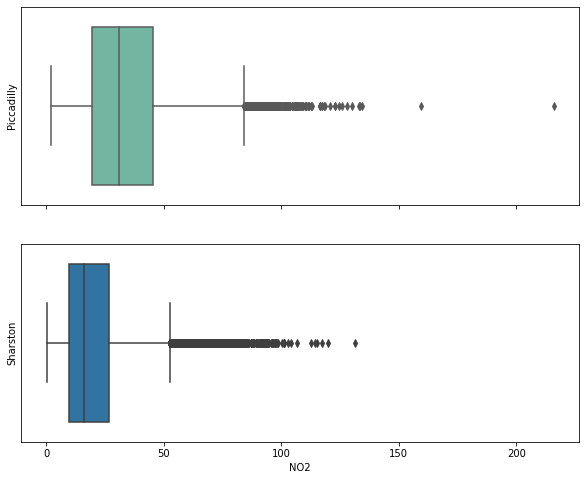

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,8), sharex=True)
sns.boxplot(y=PollutantsPicc.site, x=PollutantsPicc.NO2, ax=axes[0],palette="Set2")
sns.boxplot(y=PollutantsShar.site, x=PollutantsShar.NO2, ax=axes[1])
axes[0].set_xlabel('')
axes[0].set_ylabel('Piccadilly')
axes[1].set_ylabel('Sharston')
# Hide X and Y axes label marks
axes[0].yaxis.set_tick_params(labelleft=False)
axes[1].yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
axes[0].set_yticks([])
axes[1].set_yticks([])
plt.show()

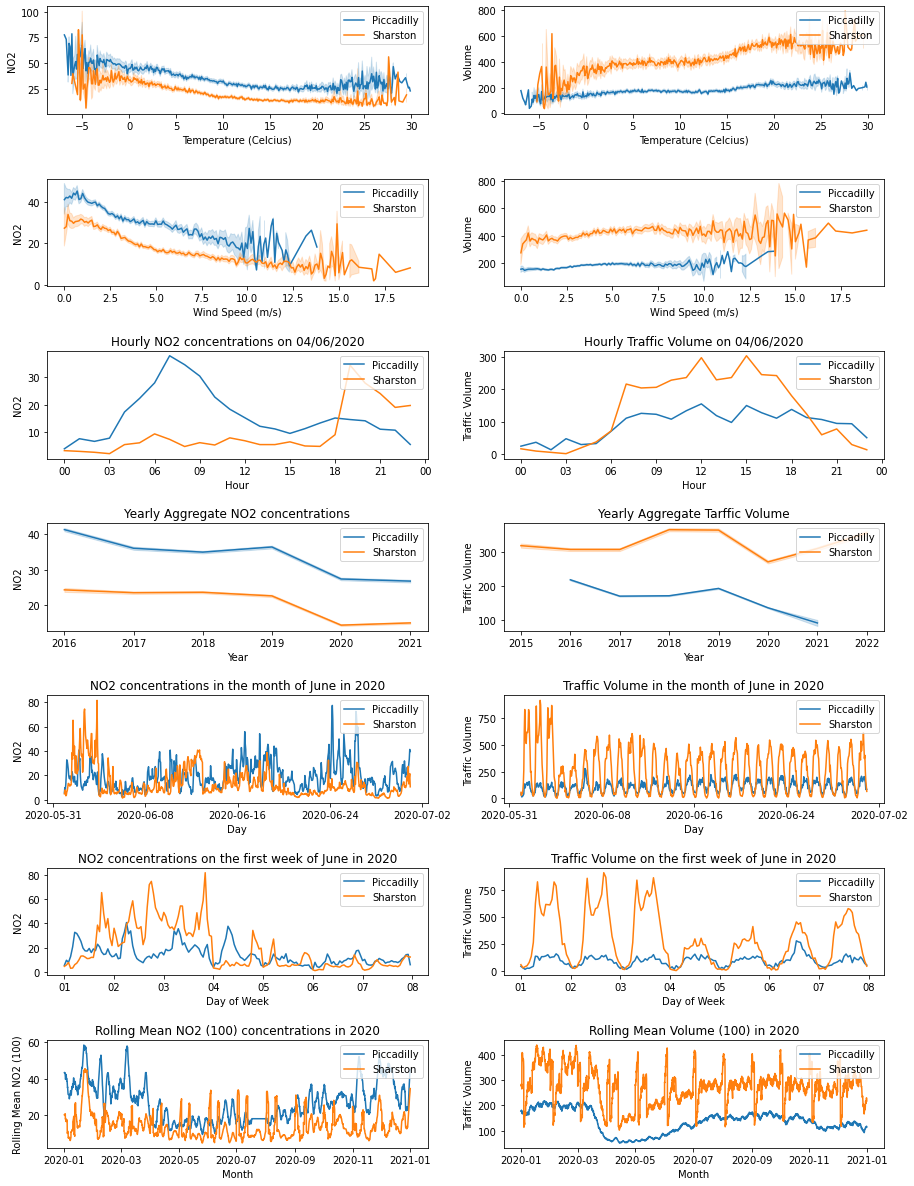

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(15,21))
#fig.suptitle('NO2                             Volume')

#First Column: NO2 ----

sns.lineplot(x='temp', y='NO2', data=PollutantsPicc, ax=axes[0,0], label='Piccadilly')
sns.lineplot(x='temp', y='NO2', data=PollutantsShar, ax=axes[0,0], label='Sharston')

sns.lineplot(x='ws', y='NO2', data=PollutantsPicc, ax=axes[1,0], label='Piccadilly')
sns.lineplot(x='ws', y='NO2', data=PollutantsShar, ax=axes[1,0], label='Sharston')

sns.lineplot(x='date', y='NO2', data=PollutantsPicc20mn6dy4, ax=axes[2,0], label='Piccadilly')
sns.lineplot(x='date', y='NO2', data=PollutantsShar20mn6dy4, ax=axes[2,0], label='Sharston')

sns.lineplot(x='Year', y='NO2', data=PollutantsPicc, ax=axes[3,0], label='Piccadilly')
sns.lineplot(x='Year', y='NO2', data=PollutantsShar, ax=axes[3,0], label='Sharston')

sns.lineplot(x='date', y='NO2', data=PollutantsPicc20mn6, ax=axes[4,0], label='Piccadilly')
sns.lineplot(x='date', y='NO2', data=PollutantsShar20mn6, ax=axes[4,0], label='Sharston')

sns.lineplot(x='date', y='NO2', data=PollutantsPicc20mn6w23, ax=axes[5,0], label='Piccadilly')
sns.lineplot(x='date', y='NO2', data=PollutantsShar20mn6w23, ax=axes[5,0], label='Sharston')

sns.lineplot(x='date', y='NO2_moving_avg4', data=PollutantsPicc20, ax=axes[6,0], label='Piccadilly')
sns.lineplot(x='date', y='NO2_moving_avg4', data=PollutantsShar20, ax=axes[6,0], label='Sharston')


#Second Column: Volume ----

sns.lineplot(x='temp', y='Volume', data=df, ax=axes[0,1], label='Piccadilly')
sns.lineplot(x='temp', y='Volume', data=df2, ax=axes[0,1], label='Sharston')

sns.lineplot(x='ws', y='Volume', data=df, ax=axes[1,1], label='Piccadilly')
sns.lineplot(x='ws', y='Volume', data=df2, ax=axes[1,1], label='Sharston')

sns.lineplot(x='date', y='Volume', data=df20mn6dy4, ax=axes[2,1], label='Piccadilly')
sns.lineplot(x='date', y='Volume', data=df220mn6dy4, ax=axes[2,1], label='Sharston')

sns.lineplot(x='Year', y='Volume', data=df, ax=axes[3,1], label='Piccadilly')
sns.lineplot(x='Year', y='Volume', data=df2, ax=axes[3,1], label='Sharston')

sns.lineplot(x='date', y='Volume', data=df20mn6, ax=axes[4,1], label='Piccadilly')
sns.lineplot(x='date', y='Volume', data=df220mn6, ax=axes[4,1], label='Sharston')

sns.lineplot(x='date', y='Volume', data=df20mn6w23, ax=axes[5,1], label='Piccadilly')
sns.lineplot(x='date', y='Volume', data=df220mn6w23, ax=axes[5,1], label='Sharston')

sns.lineplot(x='date', y=df.Volume.rolling(window=100).mean(), data=df20, ax=axes[6,1], label='Piccadilly')
sns.lineplot(x='date', y=df2.Volume.rolling(window=100).mean(), data=df220, ax=axes[6,1], label='Sharston')

#Axes configuration ----

#date_form = DateFormatter("%m-%Y")
#axes[0,0].xaxis.set_major_locator(MonthLocator(bymonth=(1,7)))
#axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(6))
#axes[0,0].xaxis.set_major_formatter(date_form)
#axes[0,1].xaxis.set_major_locator(MonthLocator(bymonth=(1,7)))
#axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(6))
#axes[0,1].xaxis.set_major_formatter(date_form)
axes[4,0].xaxis.set_major_locator(plt.MaxNLocator(5))
axes[4,1].xaxis.set_major_locator(plt.MaxNLocator(5))

date_form = DateFormatter("%H")
axes[2,0].xaxis.set_major_formatter(date_form)
axes[2,1].xaxis.set_major_formatter(date_form)
date_form = DateFormatter("%d")
axes[5,0].xaxis.set_major_formatter(date_form)
axes[5,1].xaxis.set_major_formatter(date_form)
# labels
#axes[0,0].set_xlim(['07-2016','07-2017'])

axes[0,0].legend(loc='upper right')
axes[1,0].legend(loc='upper right')
axes[2,0].legend(loc='upper right')
axes[3,0].legend(loc='upper right')
axes[4,0].legend(loc='upper right')
axes[5,0].legend(loc='upper right')
axes[6,0].legend(loc='upper right')

axes[0,1].legend(loc='upper right')
axes[1,1].legend(loc='upper right')
axes[2,1].legend(loc='upper right')
axes[3,1].legend(loc='upper right')
axes[4,1].legend(loc='upper right')
axes[5,1].legend(loc='upper right')
axes[6,1].legend(loc='upper right')

axes[0,0].set_xlabel('Temperature (Celcius)')
axes[0,1].set_xlabel('Temperature (Celcius)')

axes[1,0].set_xlabel('Wind Speed (m/s)')
axes[1,1].set_xlabel('Wind Speed (m/s)')

axes[2,0].set_xlabel('Hour')
axes[2,0].set_title('Hourly NO2 concentrations on 04/06/2020',loc = 'center')
axes[2,1].set_xlabel('Hour')
axes[2,1].set_title('Hourly Traffic Volume on 04/06/2020',loc = 'center')
axes[2,1].set_ylabel('Traffic Volume')

axes[3,0].set_title('Yearly Aggregate NO2 concentrations',loc = 'center')
axes[3,1].set_title('Yearly Aggregate Tarffic Volume',loc = 'center')
axes[3,1].set_ylabel('Traffic Volume')

axes[4,0].set_xlabel('Day')
axes[4,0].set_title('NO2 concentrations in the month of June in 2020',loc = 'center')
axes[4,1].set_xlabel('Day')
axes[4,1].set_title('Traffic Volume in the month of June in 2020',loc = 'center')
axes[4,1].set_ylabel('Traffic Volume')

axes[5,0].set_xlabel('Day of Week')
axes[5,0].set_title('NO2 concentrations on the first week of June in 2020',loc = 'center')
axes[5,1].set_xlabel('Day of Week')
axes[5,1].set_title('Traffic Volume on the first week of June in 2020',loc = 'center')
axes[5,1].set_ylabel('Traffic Volume')

axes[6,0].set_xlabel('Month')
axes[6,0].set_ylabel('Rolling Mean NO2 (100)')
axes[6,0].set_title('Rolling Mean NO2 (100) concentrations in 2020',loc = 'center')
axes[6,1].set_xlabel('Month')
axes[6,1].set_ylabel('Rolling Mean Volume (100)')
axes[6,1].set_title('Rolling Mean Volume (100) in 2020',loc = 'center')
axes[6,1].set_ylabel('Traffic Volume')


#axes[0,0].set_yscale('log')
#axes[0,1].set_yscale('log')

plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()
#rolling means for better look?

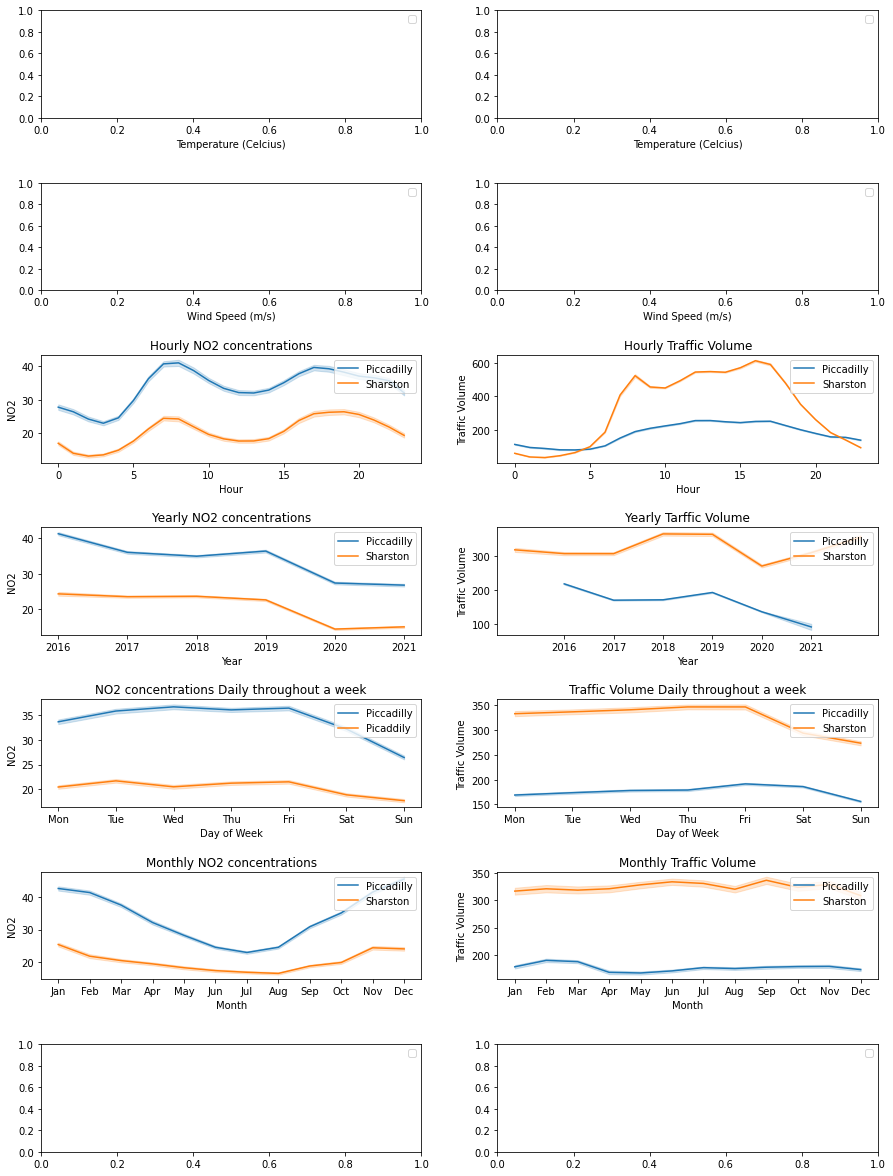

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(15,21))
#fig.suptitle('NO2                             Volume')

#First Column: NO2 ----

#sns.lineplot(x='temp', y='NO2', data=PollutantsPicc, ax=axes[0,0], label='Piccadilly')
#sns.lineplot(x='temp', y='NO2', data=PollutantsShar, ax=axes[0,0], label='Sharston')

#sns.lineplot(x='ws', y='NO2', data=PollutantsPicc, ax=axes[1,0], label='Piccadilly')
#sns.lineplot(x='ws', y='NO2', data=PollutantsShar, ax=axes[1,0], label='Sharston')

sns.lineplot(x='Hour', y='NO2', data=PollutantsPicc, ax=axes[2,0], label='Piccadilly')
sns.lineplot(x='Hour', y='NO2', data=PollutantsShar, ax=axes[2,0], label='Sharston')

sns.lineplot(x='Year', y='NO2', data=PollutantsPicc, ax=axes[3,0], label='Piccadilly')
sns.lineplot(x='Year', y='NO2', data=PollutantsShar, ax=axes[3,0], label='Sharston')

#sns.lineplot(x='Day', y='NO2', data=PollutantsPicc, ax=axes[4,0], label='Piccadilly')
#sns.lineplot(x='Day', y='NO2', data=PollutantsShar, ax=axes[4,0], label='Sharston')

sns.lineplot(x='DayofWeek', y='NO2', data=PollutantsPicc, ax=axes[4,0], label='Piccadilly')
sns.lineplot(x='DayofWeek', y='NO2', data=PollutantsShar, ax=axes[4,0], label='Picaddily')

sns.lineplot(x='Month', y='NO2', data=PollutantsPicc, ax=axes[5,0], label='Piccadilly')
sns.lineplot(x='Month', y='NO2', data=PollutantsShar, ax=axes[5,0], label='Sharston')


#Second Column: Volume ----

#sns.lineplot(x='temp', y='Volume', data=df, ax=axes[0,1], label='Piccadilly')
#sns.lineplot(x='temp', y='Volume', data=df2, ax=axes[0,1], label='Sharston')

#sns.lineplot(x='ws', y='Volume', data=df, ax=axes[1,1], label='Piccadilly')
#sns.lineplot(x='ws', y='Volume', data=df2, ax=axes[1,1], label='Sharston')

sns.lineplot(x='Hour', y='Volume', data=df, ax=axes[2,1], label='Piccadilly')
sns.lineplot(x='Hour', y='Volume', data=df2, ax=axes[2,1], label='Sharston')

sns.lineplot(x='Year', y='Volume', data=df, ax=axes[3,1], label='Piccadilly')
sns.lineplot(x='Year', y='Volume', data=df2, ax=axes[3,1], label='Sharston')

#sns.lineplot(x='Day', y='Volume', data=df, ax=axes[4,1], label='Piccadilly')
#sns.lineplot(x='Day', y='Volume', data=df2, ax=axes[4,1], label='Sharston')

sns.lineplot(x='DayofWeek', y='Volume', data=df, ax=axes[4,1], label='Piccadilly')
sns.lineplot(x='DayofWeek', y='Volume', data=df2, ax=axes[4,1], label='Sharston')

sns.lineplot(x='Month', y='Volume', data=df, ax=axes[5,1], label='Piccadilly')
sns.lineplot(x='Month', y='Volume', data=df2, ax=axes[5,1], label='Sharston')

#Axes configuration ----

#date_form = DateFormatter("%m-%Y")
#axes[0,0].xaxis.set_major_locator(MonthLocator(bymonth=(1,7)))
#axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(6))
#axes[0,0].xaxis.set_major_formatter(date_form)
#axes[0,1].xaxis.set_major_locator(MonthLocator(bymonth=(1,7)))
#axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(6))
#axes[0,1].xaxis.set_major_formatter(date_form)
#axes[4,0].xaxis.set_major_locator(plt.MaxNLocator(5))
#axes[4,1].xaxis.set_major_locator(plt.MaxNLocator(5))

#date_form = DateFormatter("%H")
#axes[2,0].xaxis.set_major_formatter(date_form)
#axes[2,1].xaxis.set_major_formatter(date_form)
#ate_form = DateFormatter("%d")
#axes[5,0].xaxis.set_major_formatter(date_form)
#axes[5,1].xaxis.set_major_formatter(date_form)
# labels
#axes[0,0].set_xlim(['07-2016','07-2017'])

axes[0,0].legend(loc='upper right')
axes[1,0].legend(loc='upper right')
axes[2,0].legend(loc='upper right')
axes[3,0].legend(loc='upper right')
axes[4,0].legend(loc='upper right')
axes[5,0].legend(loc='upper right')
axes[6,0].legend(loc='upper right')

axes[0,1].legend(loc='upper right')
axes[1,1].legend(loc='upper right')
axes[2,1].legend(loc='upper right')
axes[3,1].legend(loc='upper right')
axes[4,1].legend(loc='upper right')
axes[5,1].legend(loc='upper right')
axes[6,1].legend(loc='upper right')

axes[0,0].set_xlabel('Temperature (Celcius)')
axes[0,1].set_xlabel('Temperature (Celcius)')

axes[1,0].set_xlabel('Wind Speed (m/s)')
axes[1,1].set_xlabel('Wind Speed (m/s)')

axes[2,0].set_xlabel('Hour')
axes[2,0].set_title('Hourly NO2 concentrations',loc = 'center')
axes[2,1].set_xlabel('Hour')
axes[2,1].set_title('Hourly Traffic Volume',loc = 'center')
axes[2,1].set_ylabel('Traffic Volume')

axes[3,0].set_title('Yearly NO2 concentrations',loc = 'center')
axes[3,1].set_title('Yearly Tarffic Volume',loc = 'center')
axes[3,1].set_ylabel('Traffic Volume')
axes[3,1].set_xticks([2016,2017,2018,2019,2020,2021])

#axes[4,0].set_xlabel('Day')
#axes[4,0].set_title('NO2 concentrations Daily throughout a month',loc = 'center')
#axes[4,1].set_xlabel('Day')
#axes[4,1].set_title('Traffic Volume Daily throughout a month',loc = 'center')
#axes[4,1].set_ylabel('Traffic Volume')

axes[4,0].set_xlabel('Day of Week')
axes[4,0].set_title('NO2 concentrations Daily throughout a week',loc = 'center')
axes[4,0].set_xticks([0,1,2,3,4,5,6])
axes[4,0].set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
axes[4,1].set_xlabel('Day of Week')
axes[4,1].set_title('Traffic Volume Daily throughout a week',loc = 'center')
axes[4,1].set_ylabel('Traffic Volume')
axes[4,1].set_xticks([0,1,2,3,4,5,6])
axes[4,1].set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

axes[5,0].set_xlabel('Month')
axes[5,0].set_title('Monthly NO2 concentrations',loc = 'center')
axes[5,0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axes[5,0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axes[5,1].set_xlabel('Month')
axes[5,1].set_title('Monthly Traffic Volume',loc = 'center')
axes[5,1].set_ylabel('Traffic Volume')
axes[5,1].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axes[5,1].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


#axes[0,0].set_yscale('log')
#axes[0,1].set_yscale('log')

plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()
#rolling means for better look?

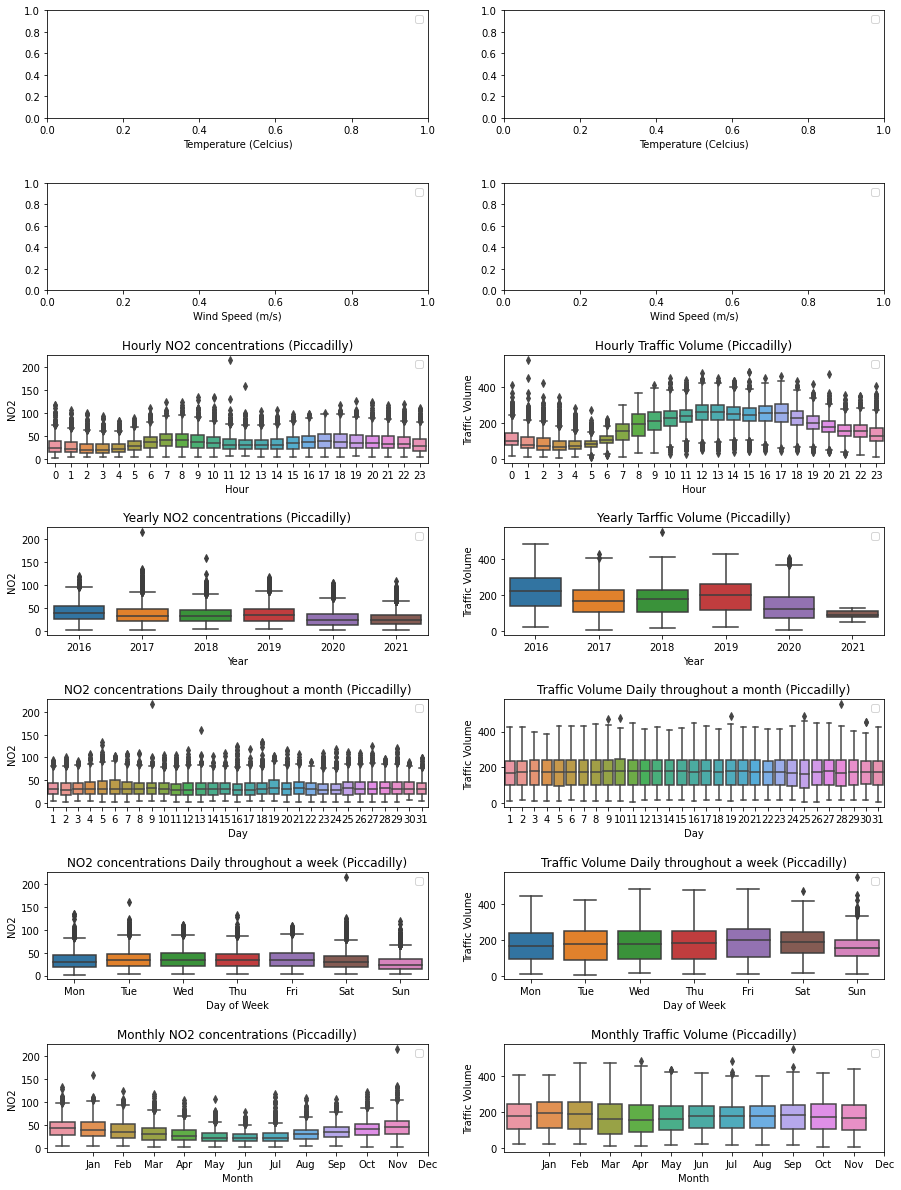

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(15,21))
#fig.suptitle('NO2                             Volume')

#First Column: NO2 ----

#sns.lineplot(x='temp', y='NO2', data=PollutantsPicc, ax=axes[0,0], label='Picaddily')
#sns.lineplot(x='temp', y='NO2', data=PollutantsShar, ax=axes[0,0], label='Sharston')

#sns.lineplot(x='ws', y='NO2', data=PollutantsPicc, ax=axes[1,0], label='Picaddily')
#sns.lineplot(x='ws', y='NO2', data=PollutantsShar, ax=axes[1,0], label='Sharston')

sns.boxplot(x='Hour', y='NO2', data=PollutantsPicc, ax=axes[2,0])

sns.boxplot(x='Year', y='NO2', data=PollutantsPicc, ax=axes[3,0])

sns.boxplot(x='Day', y='NO2', data=PollutantsPicc, ax=axes[4,0])

sns.boxplot(x='DayofWeek', y='NO2', data=PollutantsPicc, ax=axes[5,0])

sns.boxplot(x='Month', y='NO2', data=PollutantsPicc, ax=axes[6,0])


#Second Column: Volume ----

#sns.lineplot(x='temp', y='Volume', data=df, ax=axes[0,1], label='Picaddily')
#sns.lineplot(x='temp', y='Volume', data=df2, ax=axes[0,1], label='Sharston')

#sns.lineplot(x='ws', y='Volume', data=df, ax=axes[1,1], label='Picaddily')
#sns.lineplot(x='ws', y='Volume', data=df2, ax=axes[1,1], label='Sharston')

sns.boxplot(x='Hour', y='Volume', data=df, ax=axes[2,1])

sns.boxplot(x='Year', y='Volume', data=df, ax=axes[3,1])

sns.boxplot(x='Day', y='Volume', data=df, ax=axes[4,1])

sns.boxplot(x='DayofWeek', y='Volume', data=df, ax=axes[5,1])

sns.boxplot(x='Month', y='Volume', data=df, ax=axes[6,1])

#Axes configuration ----

#date_form = DateFormatter("%m-%Y")
#axes[0,0].xaxis.set_major_locator(MonthLocator(bymonth=(1,7)))
#axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(6))
#axes[0,0].xaxis.set_major_formatter(date_form)
#axes[0,1].xaxis.set_major_locator(MonthLocator(bymonth=(1,7)))
#axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(6))
#axes[0,1].xaxis.set_major_formatter(date_form)
#axes[4,0].xaxis.set_major_locator(plt.MaxNLocator(5))
#axes[4,1].xaxis.set_major_locator(plt.MaxNLocator(5))

#date_form = DateFormatter("%H")
#axes[2,0].xaxis.set_major_formatter(date_form)
#axes[2,1].xaxis.set_major_formatter(date_form)
#ate_form = DateFormatter("%d")
#axes[5,0].xaxis.set_major_formatter(date_form)
#axes[5,1].xaxis.set_major_formatter(date_form)
# labels
#axes[0,0].set_xlim(['07-2016','07-2017'])

axes[0,0].legend(loc='upper right')
axes[1,0].legend(loc='upper right')
axes[2,0].legend(loc='upper right')
axes[3,0].legend(loc='upper right')
axes[4,0].legend(loc='upper right')
axes[5,0].legend(loc='upper right')
axes[6,0].legend(loc='upper right')

axes[0,1].legend(loc='upper right')
axes[1,1].legend(loc='upper right')
axes[2,1].legend(loc='upper right')
axes[3,1].legend(loc='upper right')
axes[4,1].legend(loc='upper right')
axes[5,1].legend(loc='upper right')
axes[6,1].legend(loc='upper right')

axes[0,0].set_xlabel('Temperature (Celcius)')
axes[0,1].set_xlabel('Temperature (Celcius)')

axes[1,0].set_xlabel('Wind Speed (m/s)')
axes[1,1].set_xlabel('Wind Speed (m/s)')

axes[2,0].set_xlabel('Hour')
axes[2,0].set_title('Hourly NO2 concentrations (Piccadilly)',loc = 'center')
axes[2,1].set_xlabel('Hour')
axes[2,1].set_title('Hourly Traffic Volume (Piccadilly)',loc = 'center')
axes[2,1].set_ylabel('Traffic Volume')

axes[3,0].set_title('Yearly NO2 concentrations (Piccadilly)',loc = 'center')
axes[3,1].set_title('Yearly Tarffic Volume (Piccadilly)',loc = 'center')
axes[3,1].set_ylabel('Traffic Volume')

axes[4,0].set_xlabel('Day')
axes[4,0].set_title('NO2 concentrations Daily throughout a month (Piccadilly)',loc = 'center')
axes[4,1].set_xlabel('Day')
axes[4,1].set_title('Traffic Volume Daily throughout a month (Piccadilly)',loc = 'center')
axes[4,1].set_ylabel('Traffic Volume')

axes[5,0].set_xlabel('Day of Week')
axes[5,0].set_title('NO2 concentrations Daily throughout a week (Piccadilly)',loc = 'center')
axes[5,0].set_xticks([0,1,2,3,4,5,6])
axes[5,0].set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
axes[5,1].set_xlabel('Day of Week')
axes[5,1].set_title('Traffic Volume Daily throughout a week (Piccadilly)',loc = 'center')
axes[5,1].set_ylabel('Traffic Volume')
axes[5,1].set_xticks([0,1,2,3,4,5,6])
axes[5,1].set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

axes[6,0].set_xlabel('Month')
axes[6,0].set_title('Monthly NO2 concentrations (Piccadilly)',loc = 'center')
axes[6,0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axes[6,0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axes[6,1].set_xlabel('Month')
axes[6,1].set_title('Monthly Traffic Volume (Piccadilly)',loc = 'center')
axes[6,1].set_ylabel('Traffic Volume')
axes[6,1].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axes[6,1].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


#axes[0,0].set_yscale('log')
#axes[0,1].set_yscale('log')

plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()
#rolling means for better look?

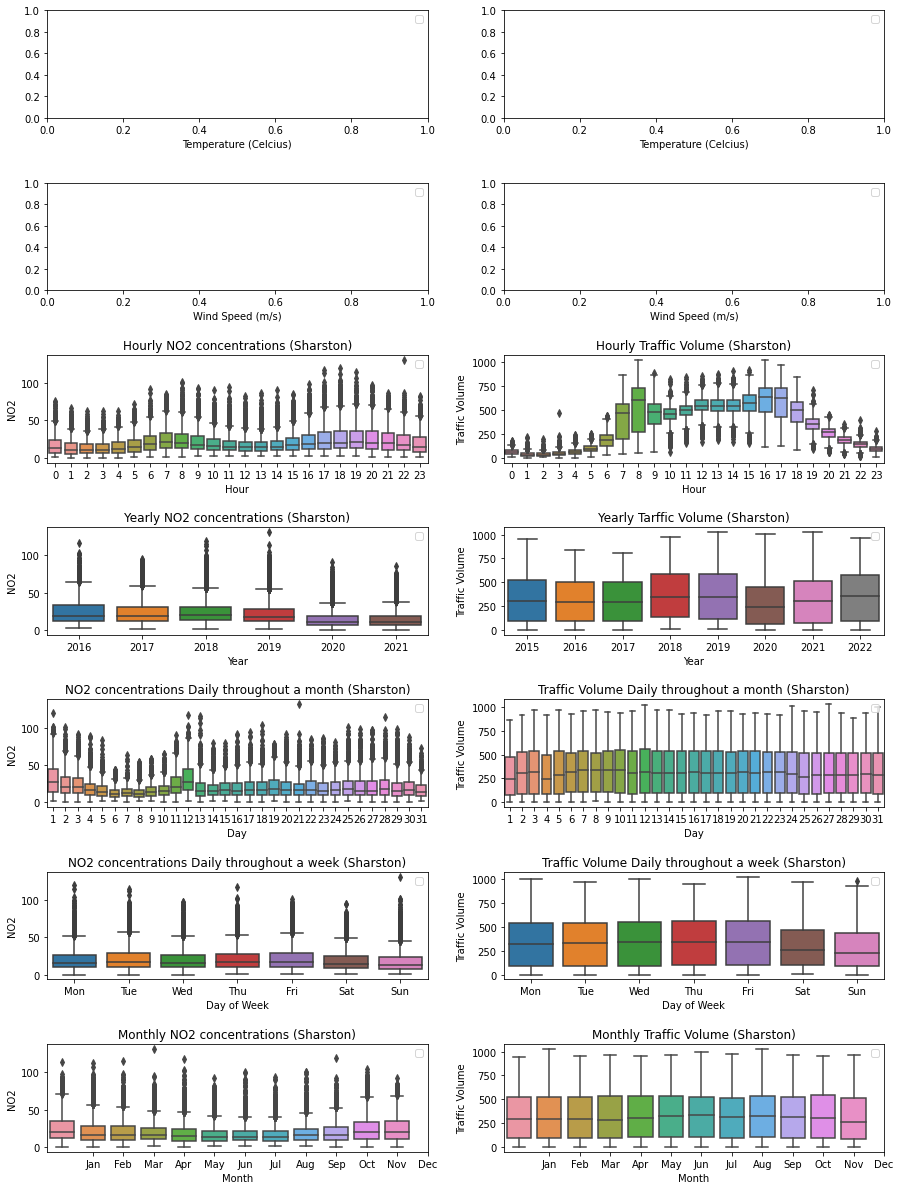

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(15,21))
#fig.suptitle('NO2                             Volume')

#First Column: NO2 ----

#sns.lineplot(x='temp', y='NO2', data=PollutantsPicc, ax=axes[0,0], label='Picaddily')
#sns.lineplot(x='temp', y='NO2', data=PollutantsShar, ax=axes[0,0], label='Sharston')

#sns.lineplot(x='ws', y='NO2', data=PollutantsPicc, ax=axes[1,0], label='Picaddily')
#sns.lineplot(x='ws', y='NO2', data=PollutantsShar, ax=axes[1,0], label='Sharston')

sns.boxplot(x='Hour', y='NO2', data=PollutantsShar, ax=axes[2,0])

sns.boxplot(x='Year', y='NO2', data=PollutantsShar, ax=axes[3,0])

sns.boxplot(x='Day', y='NO2', data=PollutantsShar, ax=axes[4,0])

sns.boxplot(x='DayofWeek', y='NO2', data=PollutantsShar, ax=axes[5,0])

sns.boxplot(x='Month', y='NO2', data=PollutantsShar, ax=axes[6,0])


#Second Column: Volume ----

#sns.lineplot(x='temp', y='Volume', data=df, ax=axes[0,1], label='Picaddily')
#sns.lineplot(x='temp', y='Volume', data=df2, ax=axes[0,1], label='Sharston')

#sns.lineplot(x='ws', y='Volume', data=df, ax=axes[1,1], label='Picaddily')
#sns.lineplot(x='ws', y='Volume', data=df2, ax=axes[1,1], label='Sharston')

sns.boxplot(x='Hour', y='Volume', data=df2, ax=axes[2,1])

sns.boxplot(x='Year', y='Volume', data=df2, ax=axes[3,1])

sns.boxplot(x='Day', y='Volume', data=df2, ax=axes[4,1])

sns.boxplot(x='DayofWeek', y='Volume', data=df2, ax=axes[5,1])

sns.boxplot(x='Month', y='Volume', data=df2, ax=axes[6,1])

#Axes configuration ----

#date_form = DateFormatter("%m-%Y")
#axes[0,0].xaxis.set_major_locator(MonthLocator(bymonth=(1,7)))
#axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(6))
#axes[0,0].xaxis.set_major_formatter(date_form)
#axes[0,1].xaxis.set_major_locator(MonthLocator(bymonth=(1,7)))
#axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(6))
#axes[0,1].xaxis.set_major_formatter(date_form)
#axes[4,0].xaxis.set_major_locator(plt.MaxNLocator(5))
#axes[4,1].xaxis.set_major_locator(plt.MaxNLocator(5))

#date_form = DateFormatter("%H")
#axes[2,0].xaxis.set_major_formatter(date_form)
#axes[2,1].xaxis.set_major_formatter(date_form)
#ate_form = DateFormatter("%d")
#axes[5,0].xaxis.set_major_formatter(date_form)
#axes[5,1].xaxis.set_major_formatter(date_form)
# labels
#axes[0,0].set_xlim(['07-2016','07-2017'])

axes[0,0].legend(loc='upper right')
axes[1,0].legend(loc='upper right')
axes[2,0].legend(loc='upper right')
axes[3,0].legend(loc='upper right')
axes[4,0].legend(loc='upper right')
axes[5,0].legend(loc='upper right')
axes[6,0].legend(loc='upper right')

axes[0,1].legend(loc='upper right')
axes[1,1].legend(loc='upper right')
axes[2,1].legend(loc='upper right')
axes[3,1].legend(loc='upper right')
axes[4,1].legend(loc='upper right')
axes[5,1].legend(loc='upper right')
axes[6,1].legend(loc='upper right')

axes[0,0].set_xlabel('Temperature (Celcius)')
axes[0,1].set_xlabel('Temperature (Celcius)')

axes[1,0].set_xlabel('Wind Speed (m/s)')
axes[1,1].set_xlabel('Wind Speed (m/s)')

axes[2,0].set_xlabel('Hour')
axes[2,0].set_title('Hourly NO2 concentrations (Sharston)',loc = 'center')
axes[2,1].set_xlabel('Hour')
axes[2,1].set_title('Hourly Traffic Volume (Sharston)',loc = 'center')
axes[2,1].set_ylabel('Traffic Volume')

axes[3,0].set_title('Yearly NO2 concentrations (Sharston)',loc = 'center')
axes[3,1].set_title('Yearly Tarffic Volume (Sharston)',loc = 'center')
axes[3,1].set_ylabel('Traffic Volume')

axes[4,0].set_xlabel('Day')
axes[4,0].set_title('NO2 concentrations Daily throughout a month (Sharston)',loc = 'center')
axes[4,1].set_xlabel('Day')
axes[4,1].set_title('Traffic Volume Daily throughout a month (Sharston)',loc = 'center')
axes[4,1].set_ylabel('Traffic Volume')

axes[5,0].set_xlabel('Day of Week')
axes[5,0].set_title('NO2 concentrations Daily throughout a week (Sharston)',loc = 'center')
axes[5,0].set_xticks([0,1,2,3,4,5,6])
axes[5,0].set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
axes[5,1].set_xlabel('Day of Week')
axes[5,1].set_title('Traffic Volume Daily throughout a week (Sharston)',loc = 'center')
axes[5,1].set_ylabel('Traffic Volume')
axes[5,1].set_xticks([0,1,2,3,4,5,6])
axes[5,1].set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

axes[6,0].set_xlabel('Month')
axes[6,0].set_title('Monthly NO2 concentrations (Sharston)',loc = 'center')
axes[6,0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axes[6,0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
axes[6,1].set_xlabel('Month')
axes[6,1].set_title('Monthly Traffic Volume (Sharston)',loc = 'center')
axes[6,1].set_ylabel('Traffic Volume')
axes[6,1].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axes[6,1].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])



#axes[0,0].set_yscale('log')
#axes[0,1].set_yscale('log')

plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()
#rolling means for better look?

In [ ]:
from statsmodels.graphics import tsaplots

<Figure size 720x360 with 0 Axes>

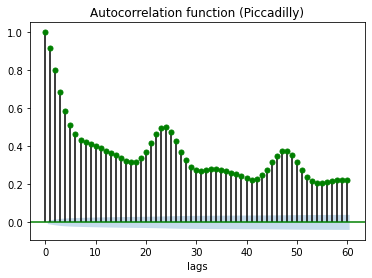

In [ ]:
#plot autocorrelation function
fig= plt.figure(figsize=(10,5))
tsaplots.plot_acf(PollutantsPicc.NO2, lags=60, color='g',  title='Autocorrelation function (Piccadilly)')
plt.xlabel('lags')
plt.show()

<Figure size 720x360 with 0 Axes>

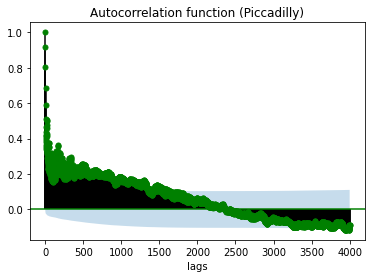

In [ ]:
#plot autocorrelation function
fig= plt.figure(figsize=(10,5))
tsaplots.plot_acf(PollutantsPicc.NO2, lags=4000, color='g',  title='Autocorrelation function (Piccadilly)')
plt.xlabel('lags')
plt.show()

<Figure size 720x360 with 0 Axes>

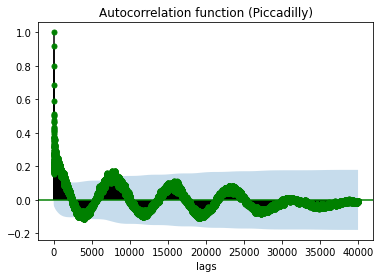

In [ ]:
#plot autocorrelation function
fig= plt.figure(figsize=(10,5))
tsaplots.plot_acf(PollutantsPicc.NO2, lags=40000, color='g', title='Autocorrelation function (Piccadilly)')
plt.xlabel('lags')
plt.show()

<Figure size 720x360 with 0 Axes>

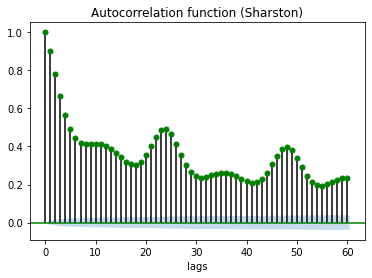

In [ ]:
#plot autocorrelation function
fig= plt.figure(figsize=(10,5))
tsaplots.plot_acf(PollutantsShar.NO2, lags=60, color='g', title='Autocorrelation function (Sharston)')
plt.xlabel('lags')
plt.show()

In [ ]:
#plot autocorrelation function
fig= plt.figure(figsize=(10,5))
tsaplots.plot_acf(PollutantsShar.NO2, lags=4000, color='g', title='Autocorrelation function (Sharston)')
plt.xlabel('lags')
plt.show()

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

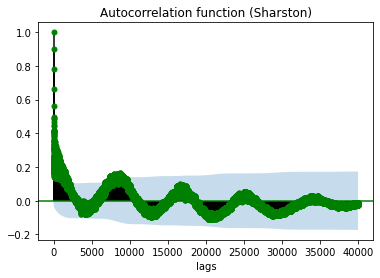

In [ ]:
#plot autocorrelation function
fig= plt.figure(figsize=(10,5))
tsaplots.plot_acf(PollutantsShar.NO2, lags=40000, color='g', title='Autocorrelation function (Sharston)')
plt.xlabel('lags')
plt.show()

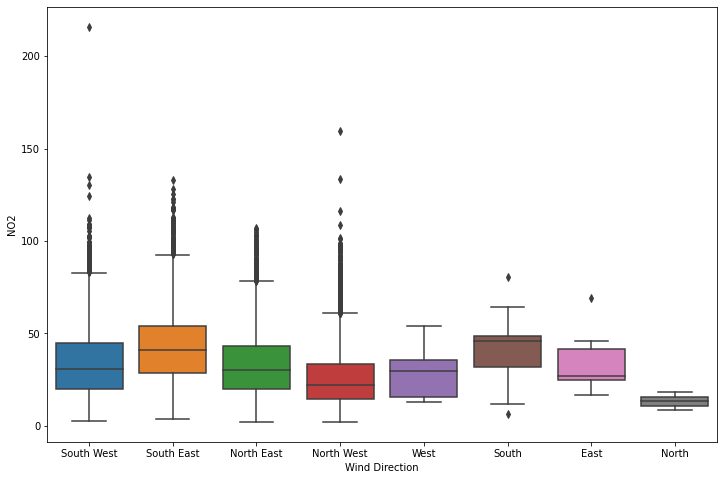

In [ ]:
fig= plt.figure(figsize=(12,8))
sns.boxplot(PollutantsPicc.wd, PollutantsPicc.NO2)
plt.xlabel('Wind Direction')
plt.show()

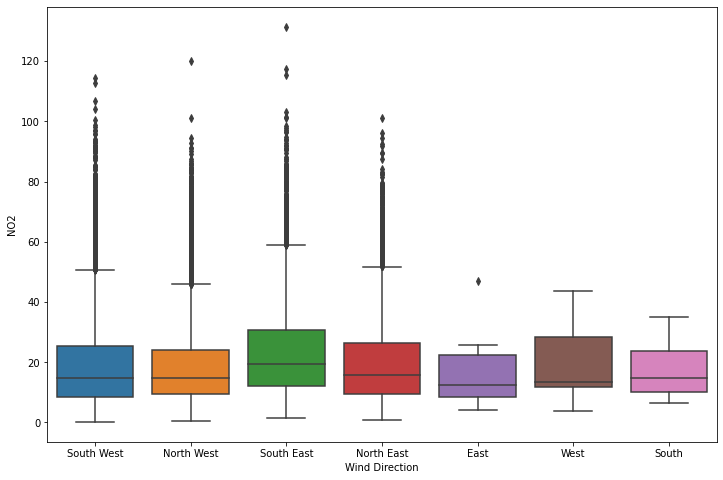

In [ ]:
fig= plt.figure(figsize=(12,8))
sns.boxplot(PollutantsShar.wd, PollutantsShar.NO2)
plt.xlabel('Wind Direction')
plt.show()